In [60]:
!pip3 install --user autograd
!pip install --user autograd

  Using cached https://files.pythonhosted.org/packages/52/e6/1715e592ef47f28f3f50065322423bb75619ed2f7c24be86380ecc93503c/numpy-1.18.1-cp35-cp35m-manylinux1_x86_64.whl


In [61]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian as grad, value_and_grad

%matplotlib inline

# Problema 1

Implementeu el mètode iteratiu de Newton 2 - Dimensional.

A l'examen parcial vau implementar el mètode de Newton per funcions d'una variable. 
En aquest cas implementareu la generalització a dues dimensions del màteix mètode.

Per codificar el mètode iteratiu haureu de fer servir la fórmula introduida acontinuació.

Considfereum una funció $f(x)$ 2-dimensional tal que per una parella de valors, $x= (x_1, x_2)$ té com a sortida un únic valor.

Definim el mètode iteriu de Newton com:

$$x^{k+1} = x^{k}-\alpha^{k} (\nabla^2 f(x^{k}))^{-1} \nabla f(x^{k})$$

Recordeu que podeu trobar el gradient ($\nabla f(x^{k})$) amb la funció `grad` d'autograd, que ja està importada. D'igual forma, també en podeu trobar "la segona derivada" ($\nabla^2 f(x^{k})$, hessià).
Observa que:
 * L'expressió $(\nabla^2 f(x^{k}))^{-1}$ indica la **inversa d'una matriu**, que podeu obtenir amb: $\text{np.linalg.inv(}\nabla^2 f(x^{k})\text{)}$
 * La multiplicicació $(\nabla^2 f(x^{k}))^{-1} \cdot \nabla f(x^{k})$ és el **producte matricial** entre $(\nabla^2 f(x^{k}))^{-1}$ i $\nabla f(x^{k})$

A més, $\alpha^k$ és el pas que utilitzarem a cada iteració de forma que:
1. El valor inicial a cada iteració serà `alpha_0`.
2. Calculem $x^{k+1}$ amb la alpha actual
3. Si $f(x^{k+1}) > f(x^{k})$ i $alpha > tol$ dividim l'$\alpha$ entre dos i tornem al pas 2
4. En cas contrari, $x^{k+1}$ és el següent punt del descens i passem a la següent iteració

Per tal d'arribar al mínim de la funció, caldrà iterar fins a arribar a un màxim d'iteracions o fins que $|f(x^{k+1}) - f(x^{k})|< tol$.

In [114]:
def newton(x, f, alpha_0, max_iter=1000, tol=1e-3):
    """
    Funció que implementa el mètode iteratiu de Newton.
    Retorna un numpy array amb els els punts (2-dimensionals) que segueix el mètode
    fins arribar al mínim.
    
    :param x: Punt inicial del mètode iteratiu.
    :param f: Funció de la qual volem trobar el mínim.
    :param max_iter: Nombre màxim d'iteracions
    :param tol: Tolerància màxima per $alpha$ i criteri d'aturada
    :return: np.array amb el conjunt de punts per on passa el mètode. shape: (n + 1, 2), 
        on n són les iteracions fetes (+ 1 pel punt inicial)
    """
    # Inclou el punt inicial
    path = [x]
    i=0
    val_grad_f = value_and_grad(f)
    while(i<max_iter):
        alpha= alpha_0
        value, grad_f1 = val_grad_f(x)
        grad_f2 = grad(grad_f1)
        inversa = np.linalg.inv(grad_f2(x))
        x = x - (alpha*(np.linalg.matrix_power(inversa, grad_f1(x))))
        new_value, new_grad = val_grad_f(x)
        while(True):
            if(new_grad(x) > grad_f1(x) and alpha_0 > tol):
                alpha = alpha/2
            else:
                break
        path.append(x)
        i+=1
    return np.array(path)

In [115]:
def generate_grid(function, axisX = [-2, 2, 0.05], axisY = [-2, 2, 0.05], contour = 50):
    """
    Funció Auxiliar que visualitza el grid
    """
    # Function to analyze
    X = np.arange(axisX[0], axisX[1], axisX[2])
    Y = np.arange(axisY[0], axisY[1], axisY[2])
    X, Y = np.meshgrid(X, Y)
    Z = function(np.array((X, Y)))

    # Contour plot en 2D
    plt.figure()
    plt.contour(X, Y, Z, contour)
    
    return X, Y, Z

# Funcions per visualitzar el resultat
def f(x):
    return 100*x[0]**2 + x[1]**2

def g(x):
    return x[0]**2 * (4. - 2.1 * x[0]**2 + 1/3 * x[0]**4) + x[0]*x[1] + x[1]**2 *(-4. + 4. * x[1]**2)

In [116]:
x_0 = np.ones(2)
p = newton(x_0, f, 1)
print(p)
print ("Backtraking Gradient Descent Algorithm with ",len(p)-1, " iterations.")
generate_grid(f)
# draw the path the gradient decent follows for each of the starting points
plt.plot (p[:, 0], p[:,1])
plt.plot (p[:, 0], p[:,1], 'rx')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [87]:
x_0 = 0.5 * np.ones(2)
p = newton(x_0, g, 1.0)
print(p)
print ("Backtraking Gradient Descent Algorithm with ",len(p)-1, " iterations.")
generate_grid(g)
# draw the path the gradient decent follows for each of the starting points
plt.plot (p[:, 0], p[:,1])
plt.plot (p[:, 0], p[:,1], 'rx')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

# Problema 2

Tenim unes dades que segueixen una distribució exponencial, $f(x) = y = 1.05^x$, però aquestes contenen soroll que les allunya lleugerament del seu valor esperat.

En la següent gràfica podeu veure en negre la distribució que segueixen, i en blau els punts obtinguts en la mesura (amb soroll)

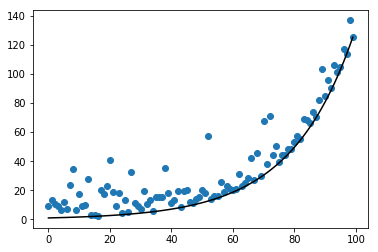

In [6]:
np.random.seed(0)

X_p2 = np.arange(100)
Y_p2 = 1.05**X_p2 + np.random.exponential(scale=10, size=100)

plt.scatter(X_p2, Y_p2)
plt.plot(X_p2, 1.05**X_p2, c='black')

Volem crear un model per aquestes dades. Per fer-ho implementa gradient descent. Recorda, cada iteració $k$ calcula

$$x^{k+1} = x^{k} - \alpha^{k} \dfrac{\nabla f(x^{k})}{||\nabla f(x^{k})||}$$

Fixa't que a cada pas normalitzem el gradient per la seva norma. Iterem fins que $||\alpha^{k} \nabla f(x^{k})|| < eps$ (i de nou, fixa't que aquí **no** està normalitzat) o bé s'arriba a un màxim d'iteracions

In [7]:
def gradient_descend(f, x0, alpha, eps=1e-6, max_iter=1000, print_iters=100):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, la funció de la que calculem el gradient i el pas, 
    intenta trobar el mínim de la funció seguint el gradient en direcció oposada.
    
    Cada print_iters cal mostrar el resultat actual en la següent forma:
        print('{}: {:.6f}'.format(itr_k, float(valor_de_f_en_x)))
        
    
    :param f: Funció a minimitzar
    :param x0: Punt inicial
    :param alpha: Pas a cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param print_iters: Numero d'iteracions cada quan printar resultats
    :return: El punt mínim
    """
    # Implementa el codi
    i = 0
    val_grad_f = value_and_grad(f)
    while i < max_iter:
        grad = val_grad_f(x0)
        if np.linalg.norm(alpha * grad[1]) > eps:
            x0 = x0 - (alpha * grad[1] /np.linalg.norm(grad[1]))
            i += 1
        else:
            break
        print('{}: {:.6f}'.format(i, float(grad[0])))
            
    return x0


Estimarem un model a partir de la funció anterior i les funcions per fer regressions lineals que vam implementar en la pràctica 2b.

In [8]:
def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def linear_regression(x, w):
    return np.sum(x * w, axis=1)

def loss(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred)

def model(w, x, y, loss=loss):
    return loss(y, linear_regression(x, w))

Podem crear un model de regressió lineal que s'adapti a les dades

In [9]:
X_p2_model = X_p2[..., np.newaxis]
X_p2_model = add_bias(X_p2_model)
w_p2_model = np.random.random(size=[1, X_p2_model.shape[1]])
w_p2_final = gradient_descend(lambda w: model(w, X_p2_model, Y_p2), w_p2_model, 0.0001, max_iter=100000, print_iters=10000)

1: 334.575871
2: 334.529041
3: 334.482214
4: 334.435390
5: 334.388570
6: 334.341753
7: 334.294939
8: 334.248128
9: 334.201321
10: 334.154517
11: 334.107716
12: 334.060918
13: 334.014124
14: 333.967333
15: 333.920545
16: 333.873761
17: 333.826980
18: 333.780202
19: 333.733427
20: 333.686656
21: 333.639888
22: 333.593123
23: 333.546362
24: 333.499604
25: 333.452849
26: 333.406097
27: 333.359349
28: 333.312604
29: 333.265862
30: 333.219124
31: 333.172389
32: 333.125657
33: 333.078929
34: 333.032204
35: 332.985482
36: 332.938763
37: 332.892048
38: 332.845336
39: 332.798627
40: 332.751922
41: 332.705220
42: 332.658521
43: 332.611826
44: 332.565134
45: 332.518445
46: 332.471760
47: 332.425078
48: 332.378399
49: 332.331724
50: 332.285052
51: 332.238383
52: 332.191718
53: 332.145055
54: 332.098397
55: 332.051741
56: 332.005089
57: 331.958440
58: 331.911795
59: 331.865153
60: 331.818514
61: 331.771879
62: 331.725247
63: 331.678618
64: 331.631993
65: 331.585371
66: 331.538752
67: 331.492137
68: 

862: 295.624757
863: 295.581322
864: 295.537892
865: 295.494467
866: 295.451047
867: 295.407631
868: 295.364220
869: 295.320813
870: 295.277412
871: 295.234015
872: 295.190623
873: 295.147235
874: 295.103853
875: 295.060475
876: 295.017102
877: 294.973734
878: 294.930370
879: 294.887011
880: 294.843657
881: 294.800308
882: 294.756963
883: 294.713624
884: 294.670289
885: 294.626958
886: 294.583633
887: 294.540312
888: 294.496996
889: 294.453685
890: 294.410379
891: 294.367077
892: 294.323781
893: 294.280489
894: 294.237202
895: 294.193919
896: 294.150642
897: 294.107369
898: 294.064101
899: 294.020838
900: 293.977579
901: 293.934326
902: 293.891077
903: 293.847833
904: 293.804594
905: 293.761360
906: 293.718130
907: 293.674906
908: 293.631686
909: 293.588471
910: 293.545261
911: 293.502055
912: 293.458855
913: 293.415659
914: 293.372468
915: 293.329282
916: 293.286101
917: 293.242925
918: 293.199753
919: 293.156586
920: 293.113425
921: 293.070268
922: 293.027116
923: 292.983968
924: 292

1719: 260.377580
1720: 260.339076
1721: 260.300579
1722: 260.262089
1723: 260.223606
1724: 260.185129
1725: 260.146660
1726: 260.108197
1727: 260.069742
1728: 260.031293
1729: 259.992851
1730: 259.954417
1731: 259.915989
1732: 259.877568
1733: 259.839154
1734: 259.800747
1735: 259.762348
1736: 259.723955
1737: 259.685569
1738: 259.647190
1739: 259.608818
1740: 259.570453
1741: 259.532095
1742: 259.493743
1743: 259.455399
1744: 259.417062
1745: 259.378732
1746: 259.340409
1747: 259.302093
1748: 259.263784
1749: 259.225482
1750: 259.187187
1751: 259.148899
1752: 259.110618
1753: 259.072344
1754: 259.034077
1755: 258.995817
1756: 258.957564
1757: 258.919318
1758: 258.881079
1759: 258.842847
1760: 258.804622
1761: 258.766404
1762: 258.728194
1763: 258.689990
1764: 258.651794
1765: 258.613604
1766: 258.575422
1767: 258.537246
1768: 258.499078
1769: 258.460916
1770: 258.422762
1771: 258.384615
1772: 258.346475
1773: 258.308342
1774: 258.270216
1775: 258.232098
1776: 258.193986
1777: 258.1558

2558: 230.832968
2559: 230.801474
2560: 230.769990
2561: 230.738516
2562: 230.707051
2563: 230.675597
2564: 230.644153
2565: 230.612718
2566: 230.581294
2567: 230.549879
2568: 230.518474
2569: 230.487080
2570: 230.455695
2571: 230.424320
2572: 230.392956
2573: 230.361601
2574: 230.330256
2575: 230.298922
2576: 230.267597
2577: 230.236282
2578: 230.204977
2579: 230.173683
2580: 230.142398
2581: 230.111123
2582: 230.079859
2583: 230.048604
2584: 230.017359
2585: 229.986125
2586: 229.954900
2587: 229.923686
2588: 229.892481
2589: 229.861287
2590: 229.830103
2591: 229.798929
2592: 229.767764
2593: 229.736610
2594: 229.705466
2595: 229.674332
2596: 229.643208
2597: 229.612094
2598: 229.580991
2599: 229.549897
2600: 229.518814
2601: 229.487740
2602: 229.456677
2603: 229.425624
2604: 229.394581
2605: 229.363548
2606: 229.332525
2607: 229.301512
2608: 229.270509
2609: 229.239517
2610: 229.208534
2611: 229.177562
2612: 229.146600
2613: 229.115648
2614: 229.084707
2615: 229.053775
2616: 229.0228

3407: 208.098287
3408: 208.076753
3409: 208.055232
3410: 208.033724
3411: 208.012230
3412: 207.990749
3413: 207.969282
3414: 207.947829
3415: 207.926389
3416: 207.904963
3417: 207.883550
3418: 207.862151
3419: 207.840766
3420: 207.819394
3421: 207.798036
3422: 207.776691
3423: 207.755360
3424: 207.734043
3425: 207.712739
3426: 207.691449
3427: 207.670173
3428: 207.648910
3429: 207.627661
3430: 207.606425
3431: 207.585203
3432: 207.563995
3433: 207.542800
3434: 207.521619
3435: 207.500452
3436: 207.479299
3437: 207.458159
3438: 207.437032
3439: 207.415920
3440: 207.394821
3441: 207.373736
3442: 207.352664
3443: 207.331606
3444: 207.310562
3445: 207.289532
3446: 207.268515
3447: 207.247512
3448: 207.226523
3449: 207.205547
3450: 207.184586
3451: 207.163638
3452: 207.142703
3453: 207.121783
3454: 207.100876
3455: 207.079983
3456: 207.059103
3457: 207.038238
3458: 207.017386
3459: 206.996548
3460: 206.975724
3461: 206.954913
3462: 206.934116
3463: 206.913333
3464: 206.892564
3465: 206.8718

4273: 194.945311
4274: 194.936913
4275: 194.928531
4276: 194.920165
4277: 194.911817
4278: 194.903484
4279: 194.895168
4280: 194.886869
4281: 194.878586
4282: 194.870320
4283: 194.862070
4284: 194.853836
4285: 194.845619
4286: 194.837419
4287: 194.829235
4288: 194.821068
4289: 194.812917
4290: 194.804783
4291: 194.796665
4292: 194.788564
4293: 194.780479
4294: 194.772411
4295: 194.764359
4296: 194.756324
4297: 194.748305
4298: 194.740303
4299: 194.732317
4300: 194.724348
4301: 194.716396
4302: 194.708460
4303: 194.700540
4304: 194.692637
4305: 194.684751
4306: 194.676881
4307: 194.669028
4308: 194.661191
4309: 194.653371
4310: 194.645567
4311: 194.637780
4312: 194.630010
4313: 194.622256
4314: 194.614518
4315: 194.606797
4316: 194.599093
4317: 194.591406
4318: 194.583734
4319: 194.576080
4320: 194.568442
4321: 194.560821
4322: 194.553216
4323: 194.545627
4324: 194.538056
4325: 194.530501
4326: 194.522962
4327: 194.515440
4328: 194.507935
4329: 194.500446
4330: 194.492974
4331: 194.4855

5113: 192.790978
5114: 192.790855
5115: 192.790733
5116: 192.790610
5117: 192.790487
5118: 192.790364
5119: 192.790241
5120: 192.790119
5121: 192.789996
5122: 192.789873
5123: 192.789750
5124: 192.789627
5125: 192.789505
5126: 192.789382
5127: 192.789259
5128: 192.789136
5129: 192.789014
5130: 192.788891
5131: 192.788768
5132: 192.788645
5133: 192.788523
5134: 192.788400
5135: 192.788277
5136: 192.788154
5137: 192.788031
5138: 192.787909
5139: 192.787786
5140: 192.787663
5141: 192.787540
5142: 192.787418
5143: 192.787295
5144: 192.787172
5145: 192.787049
5146: 192.786927
5147: 192.786804
5148: 192.786681
5149: 192.786558
5150: 192.786436
5151: 192.786313
5152: 192.786190
5153: 192.786067
5154: 192.785945
5155: 192.785822
5156: 192.785699
5157: 192.785577
5158: 192.785454
5159: 192.785331
5160: 192.785208
5161: 192.785086
5162: 192.784963
5163: 192.784840
5164: 192.784717
5165: 192.784595
5166: 192.784472
5167: 192.784349
5168: 192.784226
5169: 192.784104
5170: 192.783981
5171: 192.7838

5956: 192.687906
5957: 192.687784
5958: 192.687662
5959: 192.687541
5960: 192.687419
5961: 192.687297
5962: 192.687175
5963: 192.687054
5964: 192.686932
5965: 192.686810
5966: 192.686688
5967: 192.686567
5968: 192.686445
5969: 192.686323
5970: 192.686202
5971: 192.686080
5972: 192.685958
5973: 192.685836
5974: 192.685715
5975: 192.685593
5976: 192.685471
5977: 192.685349
5978: 192.685228
5979: 192.685106
5980: 192.684984
5981: 192.684863
5982: 192.684741
5983: 192.684619
5984: 192.684497
5985: 192.684376
5986: 192.684254
5987: 192.684132
5988: 192.684011
5989: 192.683889
5990: 192.683767
5991: 192.683646
5992: 192.683524
5993: 192.683402
5994: 192.683280
5995: 192.683159
5996: 192.683037
5997: 192.682915
5998: 192.682794
5999: 192.682672
6000: 192.682550
6001: 192.682429
6002: 192.682307
6003: 192.682185
6004: 192.682063
6005: 192.681942
6006: 192.681820
6007: 192.681698
6008: 192.681577
6009: 192.681455
6010: 192.681333
6011: 192.681212
6012: 192.681090
6013: 192.680968
6014: 192.6808

6804: 192.585111
6805: 192.584991
6806: 192.584870
6807: 192.584749
6808: 192.584628
6809: 192.584508
6810: 192.584387
6811: 192.584266
6812: 192.584146
6813: 192.584025
6814: 192.583904
6815: 192.583784
6816: 192.583663
6817: 192.583542
6818: 192.583422
6819: 192.583301
6820: 192.583180
6821: 192.583060
6822: 192.582939
6823: 192.582818
6824: 192.582698
6825: 192.582577
6826: 192.582456
6827: 192.582336
6828: 192.582215
6829: 192.582094
6830: 192.581974
6831: 192.581853
6832: 192.581732
6833: 192.581612
6834: 192.581491
6835: 192.581370
6836: 192.581250
6837: 192.581129
6838: 192.581008
6839: 192.580888
6840: 192.580767
6841: 192.580646
6842: 192.580526
6843: 192.580405
6844: 192.580284
6845: 192.580164
6846: 192.580043
6847: 192.579923
6848: 192.579802
6849: 192.579681
6850: 192.579561
6851: 192.579440
6852: 192.579319
6853: 192.579199
6854: 192.579078
6855: 192.578957
6856: 192.578837
6857: 192.578716
6858: 192.578596
6859: 192.578475
6860: 192.578354
6861: 192.578234
6862: 192.5781

7663: 192.481894
7664: 192.481774
7665: 192.481654
7666: 192.481535
7667: 192.481415
7668: 192.481295
7669: 192.481176
7670: 192.481056
7671: 192.480937
7672: 192.480817
7673: 192.480697
7674: 192.480578
7675: 192.480458
7676: 192.480338
7677: 192.480219
7678: 192.480099
7679: 192.479980
7680: 192.479860
7681: 192.479740
7682: 192.479621
7683: 192.479501
7684: 192.479382
7685: 192.479262
7686: 192.479142
7687: 192.479023
7688: 192.478903
7689: 192.478784
7690: 192.478664
7691: 192.478544
7692: 192.478425
7693: 192.478305
7694: 192.478186
7695: 192.478066
7696: 192.477947
7697: 192.477827
7698: 192.477707
7699: 192.477588
7700: 192.477468
7701: 192.477349
7702: 192.477229
7703: 192.477109
7704: 192.476990
7705: 192.476870
7706: 192.476751
7707: 192.476631
7708: 192.476512
7709: 192.476392
7710: 192.476272
7711: 192.476153
7712: 192.476033
7713: 192.475914
7714: 192.475794
7715: 192.475675
7716: 192.475555
7717: 192.475436
7718: 192.475316
7719: 192.475196
7720: 192.475077
7721: 192.4749

8530: 192.378645
8531: 192.378527
8532: 192.378408
8533: 192.378290
8534: 192.378171
8535: 192.378052
8536: 192.377934
8537: 192.377815
8538: 192.377697
8539: 192.377578
8540: 192.377460
8541: 192.377341
8542: 192.377223
8543: 192.377104
8544: 192.376986
8545: 192.376867
8546: 192.376749
8547: 192.376630
8548: 192.376512
8549: 192.376393
8550: 192.376274
8551: 192.376156
8552: 192.376037
8553: 192.375919
8554: 192.375800
8555: 192.375682
8556: 192.375563
8557: 192.375445
8558: 192.375326
8559: 192.375208
8560: 192.375089
8561: 192.374971
8562: 192.374852
8563: 192.374734
8564: 192.374615
8565: 192.374497
8566: 192.374378
8567: 192.374260
8568: 192.374141
8569: 192.374023
8570: 192.373904
8571: 192.373786
8572: 192.373667
8573: 192.373549
8574: 192.373430
8575: 192.373312
8576: 192.373193
8577: 192.373075
8578: 192.372956
8579: 192.372838
8580: 192.372719
8581: 192.372601
8582: 192.372482
8583: 192.372364
8584: 192.372245
8585: 192.372127
8586: 192.372008
8587: 192.371890
8588: 192.3717

9395: 192.276568
9396: 192.276451
9397: 192.276333
9398: 192.276216
9399: 192.276098
9400: 192.275981
9401: 192.275863
9402: 192.275746
9403: 192.275628
9404: 192.275511
9405: 192.275394
9406: 192.275276
9407: 192.275159
9408: 192.275041
9409: 192.274924
9410: 192.274806
9411: 192.274689
9412: 192.274571
9413: 192.274454
9414: 192.274336
9415: 192.274219
9416: 192.274102
9417: 192.273984
9418: 192.273867
9419: 192.273749
9420: 192.273632
9421: 192.273514
9422: 192.273397
9423: 192.273280
9424: 192.273162
9425: 192.273045
9426: 192.272927
9427: 192.272810
9428: 192.272692
9429: 192.272575
9430: 192.272458
9431: 192.272340
9432: 192.272223
9433: 192.272105
9434: 192.271988
9435: 192.271870
9436: 192.271753
9437: 192.271636
9438: 192.271518
9439: 192.271401
9440: 192.271283
9441: 192.271166
9442: 192.271049
9443: 192.270931
9444: 192.270814
9445: 192.270696
9446: 192.270579
9447: 192.270461
9448: 192.270344
9449: 192.270227
9450: 192.270109
9451: 192.269992
9452: 192.269874
9453: 192.2697

10239: 192.177869
10240: 192.177753
10241: 192.177636
10242: 192.177520
10243: 192.177404
10244: 192.177287
10245: 192.177171
10246: 192.177054
10247: 192.176938
10248: 192.176822
10249: 192.176705
10250: 192.176589
10251: 192.176472
10252: 192.176356
10253: 192.176240
10254: 192.176123
10255: 192.176007
10256: 192.175890
10257: 192.175774
10258: 192.175658
10259: 192.175541
10260: 192.175425
10261: 192.175308
10262: 192.175192
10263: 192.175076
10264: 192.174959
10265: 192.174843
10266: 192.174726
10267: 192.174610
10268: 192.174494
10269: 192.174377
10270: 192.174261
10271: 192.174145
10272: 192.174028
10273: 192.173912
10274: 192.173795
10275: 192.173679
10276: 192.173563
10277: 192.173446
10278: 192.173330
10279: 192.173214
10280: 192.173097
10281: 192.172981
10282: 192.172865
10283: 192.172748
10284: 192.172632
10285: 192.172515
10286: 192.172399
10287: 192.172283
10288: 192.172166
10289: 192.172050
10290: 192.171934
10291: 192.171817
10292: 192.171701
10293: 192.171585
10294: 192

11069: 192.081676
11070: 192.081560
11071: 192.081445
11072: 192.081329
11073: 192.081214
11074: 192.081099
11075: 192.080983
11076: 192.080868
11077: 192.080753
11078: 192.080637
11079: 192.080522
11080: 192.080406
11081: 192.080291
11082: 192.080176
11083: 192.080060
11084: 192.079945
11085: 192.079830
11086: 192.079714
11087: 192.079599
11088: 192.079484
11089: 192.079368
11090: 192.079253
11091: 192.079138
11092: 192.079022
11093: 192.078907
11094: 192.078792
11095: 192.078676
11096: 192.078561
11097: 192.078446
11098: 192.078330
11099: 192.078215
11100: 192.078099
11101: 192.077984
11102: 192.077869
11103: 192.077753
11104: 192.077638
11105: 192.077523
11106: 192.077407
11107: 192.077292
11108: 192.077177
11109: 192.077061
11110: 192.076946
11111: 192.076831
11112: 192.076716
11113: 192.076600
11114: 192.076485
11115: 192.076370
11116: 192.076254
11117: 192.076139
11118: 192.076024
11119: 192.075908
11120: 192.075793
11121: 192.075678
11122: 192.075562
11123: 192.075447
11124: 192

11893: 191.987030
11894: 191.986916
11895: 191.986801
11896: 191.986687
11897: 191.986573
11898: 191.986458
11899: 191.986344
11900: 191.986230
11901: 191.986115
11902: 191.986001
11903: 191.985887
11904: 191.985772
11905: 191.985658
11906: 191.985544
11907: 191.985429
11908: 191.985315
11909: 191.985201
11910: 191.985086
11911: 191.984972
11912: 191.984858
11913: 191.984744
11914: 191.984629
11915: 191.984515
11916: 191.984401
11917: 191.984286
11918: 191.984172
11919: 191.984058
11920: 191.983943
11921: 191.983829
11922: 191.983715
11923: 191.983600
11924: 191.983486
11925: 191.983372
11926: 191.983257
11927: 191.983143
11928: 191.983029
11929: 191.982915
11930: 191.982800
11931: 191.982686
11932: 191.982572
11933: 191.982457
11934: 191.982343
11935: 191.982229
11936: 191.982115
11937: 191.982000
11938: 191.981886
11939: 191.981772
11940: 191.981657
11941: 191.981543
11942: 191.981429
11943: 191.981315
11944: 191.981200
11945: 191.981086
11946: 191.980972
11947: 191.980857
11948: 191

12726: 191.892216
12727: 191.892103
12728: 191.891989
12729: 191.891876
12730: 191.891763
12731: 191.891650
12732: 191.891536
12733: 191.891423
12734: 191.891310
12735: 191.891196
12736: 191.891083
12737: 191.890970
12738: 191.890857
12739: 191.890743
12740: 191.890630
12741: 191.890517
12742: 191.890403
12743: 191.890290
12744: 191.890177
12745: 191.890064
12746: 191.889950
12747: 191.889837
12748: 191.889724
12749: 191.889610
12750: 191.889497
12751: 191.889384
12752: 191.889271
12753: 191.889157
12754: 191.889044
12755: 191.888931
12756: 191.888818
12757: 191.888704
12758: 191.888591
12759: 191.888478
12760: 191.888365
12761: 191.888251
12762: 191.888138
12763: 191.888025
12764: 191.887912
12765: 191.887798
12766: 191.887685
12767: 191.887572
12768: 191.887459
12769: 191.887345
12770: 191.887232
12771: 191.887119
12772: 191.887006
12773: 191.886892
12774: 191.886779
12775: 191.886666
12776: 191.886553
12777: 191.886439
12778: 191.886326
12779: 191.886213
12780: 191.886100
12781: 191

13552: 191.799059
13553: 191.798946
13554: 191.798834
13555: 191.798722
13556: 191.798610
13557: 191.798497
13558: 191.798385
13559: 191.798273
13560: 191.798161
13561: 191.798048
13562: 191.797936
13563: 191.797824
13564: 191.797712
13565: 191.797599
13566: 191.797487
13567: 191.797375
13568: 191.797263
13569: 191.797150
13570: 191.797038
13571: 191.796926
13572: 191.796814
13573: 191.796702
13574: 191.796589
13575: 191.796477
13576: 191.796365
13577: 191.796253
13578: 191.796140
13579: 191.796028
13580: 191.795916
13581: 191.795804
13582: 191.795691
13583: 191.795579
13584: 191.795467
13585: 191.795355
13586: 191.795243
13587: 191.795130
13588: 191.795018
13589: 191.794906
13590: 191.794794
13591: 191.794681
13592: 191.794569
13593: 191.794457
13594: 191.794345
13595: 191.794233
13596: 191.794120
13597: 191.794008
13598: 191.793896
13599: 191.793784
13600: 191.793672
13601: 191.793559
13602: 191.793447
13603: 191.793335
13604: 191.793223
13605: 191.793111
13606: 191.792998
13607: 191

14387: 191.705758
14388: 191.705647
14389: 191.705536
14390: 191.705425
14391: 191.705313
14392: 191.705202
14393: 191.705091
14394: 191.704980
14395: 191.704869
14396: 191.704757
14397: 191.704646
14398: 191.704535
14399: 191.704424
14400: 191.704313
14401: 191.704201
14402: 191.704090
14403: 191.703979
14404: 191.703868
14405: 191.703757
14406: 191.703645
14407: 191.703534
14408: 191.703423
14409: 191.703312
14410: 191.703201
14411: 191.703089
14412: 191.702978
14413: 191.702867
14414: 191.702756
14415: 191.702645
14416: 191.702534
14417: 191.702422
14418: 191.702311
14419: 191.702200
14420: 191.702089
14421: 191.701978
14422: 191.701867
14423: 191.701755
14424: 191.701644
14425: 191.701533
14426: 191.701422
14427: 191.701311
14428: 191.701200
14429: 191.701088
14430: 191.700977
14431: 191.700866
14432: 191.700755
14433: 191.700644
14434: 191.700533
14435: 191.700421
14436: 191.700310
14437: 191.700199
14438: 191.700088
14439: 191.699977
14440: 191.699866
14441: 191.699755
14442: 191

15216: 191.613996
15217: 191.613886
15218: 191.613776
15219: 191.613666
15220: 191.613556
15221: 191.613446
15222: 191.613335
15223: 191.613225
15224: 191.613115
15225: 191.613005
15226: 191.612895
15227: 191.612785
15228: 191.612674
15229: 191.612564
15230: 191.612454
15231: 191.612344
15232: 191.612234
15233: 191.612124
15234: 191.612014
15235: 191.611903
15236: 191.611793
15237: 191.611683
15238: 191.611573
15239: 191.611463
15240: 191.611353
15241: 191.611243
15242: 191.611132
15243: 191.611022
15244: 191.610912
15245: 191.610802
15246: 191.610692
15247: 191.610582
15248: 191.610472
15249: 191.610361
15250: 191.610251
15251: 191.610141
15252: 191.610031
15253: 191.609921
15254: 191.609811
15255: 191.609701
15256: 191.609591
15257: 191.609481
15258: 191.609370
15259: 191.609260
15260: 191.609150
15261: 191.609040
15262: 191.608930
15263: 191.608820
15264: 191.608710
15265: 191.608600
15266: 191.608490
15267: 191.608379
15268: 191.608269
15269: 191.608159
15270: 191.608049
15271: 191

16054: 191.522119
16055: 191.522010
16056: 191.521901
16057: 191.521792
16058: 191.521682
16059: 191.521573
16060: 191.521464
16061: 191.521355
16062: 191.521246
16063: 191.521137
16064: 191.521028
16065: 191.520919
16066: 191.520810
16067: 191.520701
16068: 191.520591
16069: 191.520482
16070: 191.520373
16071: 191.520264
16072: 191.520155
16073: 191.520046
16074: 191.519937
16075: 191.519828
16076: 191.519719
16077: 191.519610
16078: 191.519501
16079: 191.519392
16080: 191.519282
16081: 191.519173
16082: 191.519064
16083: 191.518955
16084: 191.518846
16085: 191.518737
16086: 191.518628
16087: 191.518519
16088: 191.518410
16089: 191.518301
16090: 191.518192
16091: 191.518083
16092: 191.517974
16093: 191.517865
16094: 191.517755
16095: 191.517646
16096: 191.517537
16097: 191.517428
16098: 191.517319
16099: 191.517210
16100: 191.517101
16101: 191.516992
16102: 191.516883
16103: 191.516774
16104: 191.516665
16105: 191.516556
16106: 191.516447
16107: 191.516338
16108: 191.516229
16109: 191

16862: 191.434370
16863: 191.434262
16864: 191.434154
16865: 191.434046
16866: 191.433938
16867: 191.433830
16868: 191.433722
16869: 191.433614
16870: 191.433505
16871: 191.433397
16872: 191.433289
16873: 191.433181
16874: 191.433073
16875: 191.432965
16876: 191.432857
16877: 191.432749
16878: 191.432641
16879: 191.432533
16880: 191.432425
16881: 191.432317
16882: 191.432209
16883: 191.432101
16884: 191.431992
16885: 191.431884
16886: 191.431776
16887: 191.431668
16888: 191.431560
16889: 191.431452
16890: 191.431344
16891: 191.431236
16892: 191.431128
16893: 191.431020
16894: 191.430912
16895: 191.430804
16896: 191.430696
16897: 191.430588
16898: 191.430480
16899: 191.430372
16900: 191.430264
16901: 191.430156
16902: 191.430048
16903: 191.429940
16904: 191.429831
16905: 191.429723
16906: 191.429615
16907: 191.429507
16908: 191.429399
16909: 191.429291
16910: 191.429183
16911: 191.429075
16912: 191.428967
16913: 191.428859
16914: 191.428751
16915: 191.428643
16916: 191.428535
16917: 191

17704: 191.343807
17705: 191.343700
17706: 191.343593
17707: 191.343486
17708: 191.343379
17709: 191.343272
17710: 191.343165
17711: 191.343058
17712: 191.342951
17713: 191.342844
17714: 191.342737
17715: 191.342630
17716: 191.342523
17717: 191.342416
17718: 191.342309
17719: 191.342202
17720: 191.342095
17721: 191.341988
17722: 191.341881
17723: 191.341774
17724: 191.341667
17725: 191.341560
17726: 191.341453
17727: 191.341346
17728: 191.341239
17729: 191.341132
17730: 191.341025
17731: 191.340918
17732: 191.340811
17733: 191.340704
17734: 191.340597
17735: 191.340490
17736: 191.340383
17737: 191.340276
17738: 191.340169
17739: 191.340062
17740: 191.339955
17741: 191.339848
17742: 191.339741
17743: 191.339634
17744: 191.339527
17745: 191.339420
17746: 191.339313
17747: 191.339206
17748: 191.339099
17749: 191.338992
17750: 191.338885
17751: 191.338779
17752: 191.338672
17753: 191.338565
17754: 191.338458
17755: 191.338351
17756: 191.338244
17757: 191.338137
17758: 191.338030
17759: 191

18560: 191.252659
18561: 191.252553
18562: 191.252447
18563: 191.252341
18564: 191.252235
18565: 191.252129
18566: 191.252023
18567: 191.251917
18568: 191.251811
18569: 191.251705
18570: 191.251599
18571: 191.251493
18572: 191.251388
18573: 191.251282
18574: 191.251176
18575: 191.251070
18576: 191.250964
18577: 191.250858
18578: 191.250752
18579: 191.250646
18580: 191.250540
18581: 191.250434
18582: 191.250328
18583: 191.250222
18584: 191.250117
18585: 191.250011
18586: 191.249905
18587: 191.249799
18588: 191.249693
18589: 191.249587
18590: 191.249481
18591: 191.249375
18592: 191.249269
18593: 191.249163
18594: 191.249057
18595: 191.248952
18596: 191.248846
18597: 191.248740
18598: 191.248634
18599: 191.248528
18600: 191.248422
18601: 191.248316
18602: 191.248210
18603: 191.248104
18604: 191.247999
18605: 191.247893
18606: 191.247787
18607: 191.247681
18608: 191.247575
18609: 191.247469
18610: 191.247363
18611: 191.247257
18612: 191.247152
18613: 191.247046
18614: 191.246940
18615: 191

19382: 191.166005
19383: 191.165900
19384: 191.165795
19385: 191.165690
19386: 191.165585
19387: 191.165480
19388: 191.165376
19389: 191.165271
19390: 191.165166
19391: 191.165061
19392: 191.164956
19393: 191.164851
19394: 191.164746
19395: 191.164641
19396: 191.164537
19397: 191.164432
19398: 191.164327
19399: 191.164222
19400: 191.164117
19401: 191.164012
19402: 191.163907
19403: 191.163802
19404: 191.163698
19405: 191.163593
19406: 191.163488
19407: 191.163383
19408: 191.163278
19409: 191.163173
19410: 191.163068
19411: 191.162963
19412: 191.162859
19413: 191.162754
19414: 191.162649
19415: 191.162544
19416: 191.162439
19417: 191.162334
19418: 191.162229
19419: 191.162125
19420: 191.162020
19421: 191.161915
19422: 191.161810
19423: 191.161705
19424: 191.161600
19425: 191.161496
19426: 191.161391
19427: 191.161286
19428: 191.161181
19429: 191.161076
19430: 191.160971
19431: 191.160867
19432: 191.160762
19433: 191.160657
19434: 191.160552
19435: 191.160447
19436: 191.160342
19437: 191

20227: 191.077821
20228: 191.077717
20229: 191.077613
20230: 191.077509
20231: 191.077405
20232: 191.077302
20233: 191.077198
20234: 191.077094
20235: 191.076990
20236: 191.076886
20237: 191.076783
20238: 191.076679
20239: 191.076575
20240: 191.076471
20241: 191.076367
20242: 191.076264
20243: 191.076160
20244: 191.076056
20245: 191.075952
20246: 191.075848
20247: 191.075745
20248: 191.075641
20249: 191.075537
20250: 191.075433
20251: 191.075329
20252: 191.075226
20253: 191.075122
20254: 191.075018
20255: 191.074914
20256: 191.074810
20257: 191.074707
20258: 191.074603
20259: 191.074499
20260: 191.074395
20261: 191.074292
20262: 191.074188
20263: 191.074084
20264: 191.073980
20265: 191.073876
20266: 191.073773
20267: 191.073669
20268: 191.073565
20269: 191.073461
20270: 191.073358
20271: 191.073254
20272: 191.073150
20273: 191.073046
20274: 191.072942
20275: 191.072839
20276: 191.072735
20277: 191.072631
20278: 191.072527
20279: 191.072424
20280: 191.072320
20281: 191.072216
20282: 191

21071: 190.990647
21072: 190.990544
21073: 190.990442
21074: 190.990339
21075: 190.990236
21076: 190.990133
21077: 190.990031
21078: 190.989928
21079: 190.989825
21080: 190.989722
21081: 190.989620
21082: 190.989517
21083: 190.989414
21084: 190.989312
21085: 190.989209
21086: 190.989106
21087: 190.989003
21088: 190.988901
21089: 190.988798
21090: 190.988695
21091: 190.988592
21092: 190.988490
21093: 190.988387
21094: 190.988284
21095: 190.988182
21096: 190.988079
21097: 190.987976
21098: 190.987873
21099: 190.987771
21100: 190.987668
21101: 190.987565
21102: 190.987463
21103: 190.987360
21104: 190.987257
21105: 190.987154
21106: 190.987052
21107: 190.986949
21108: 190.986846
21109: 190.986744
21110: 190.986641
21111: 190.986538
21112: 190.986435
21113: 190.986333
21114: 190.986230
21115: 190.986127
21116: 190.986025
21117: 190.985922
21118: 190.985819
21119: 190.985717
21120: 190.985614
21121: 190.985511
21122: 190.985409
21123: 190.985306
21124: 190.985203
21125: 190.985101
21126: 190

21908: 190.905092
21909: 190.904990
21910: 190.904889
21911: 190.904787
21912: 190.904685
21913: 190.904584
21914: 190.904482
21915: 190.904380
21916: 190.904279
21917: 190.904177
21918: 190.904075
21919: 190.903974
21920: 190.903872
21921: 190.903770
21922: 190.903669
21923: 190.903567
21924: 190.903465
21925: 190.903364
21926: 190.903262
21927: 190.903160
21928: 190.903059
21929: 190.902957
21930: 190.902855
21931: 190.902754
21932: 190.902652
21933: 190.902550
21934: 190.902449
21935: 190.902347
21936: 190.902246
21937: 190.902144
21938: 190.902042
21939: 190.901941
21940: 190.901839
21941: 190.901737
21942: 190.901636
21943: 190.901534
21944: 190.901432
21945: 190.901331
21946: 190.901229
21947: 190.901127
21948: 190.901026
21949: 190.900924
21950: 190.900823
21951: 190.900721
21952: 190.900619
21953: 190.900518
21954: 190.900416
21955: 190.900314
21956: 190.900213
21957: 190.900111
21958: 190.900010
21959: 190.899908
21960: 190.899806
21961: 190.899705
21962: 190.899603
21963: 190

22740: 190.820933
22741: 190.820833
22742: 190.820732
22743: 190.820631
22744: 190.820531
22745: 190.820430
22746: 190.820330
22747: 190.820229
22748: 190.820128
22749: 190.820028
22750: 190.819927
22751: 190.819827
22752: 190.819726
22753: 190.819625
22754: 190.819525
22755: 190.819424
22756: 190.819324
22757: 190.819223
22758: 190.819122
22759: 190.819022
22760: 190.818921
22761: 190.818821
22762: 190.818720
22763: 190.818619
22764: 190.818519
22765: 190.818418
22766: 190.818318
22767: 190.818217
22768: 190.818116
22769: 190.818016
22770: 190.817915
22771: 190.817815
22772: 190.817714
22773: 190.817614
22774: 190.817513
22775: 190.817412
22776: 190.817312
22777: 190.817211
22778: 190.817111
22779: 190.817010
22780: 190.816910
22781: 190.816809
22782: 190.816708
22783: 190.816608
22784: 190.816507
22785: 190.816407
22786: 190.816306
22787: 190.816206
22788: 190.816105
22789: 190.816004
22790: 190.815904
22791: 190.815803
22792: 190.815703
22793: 190.815602
22794: 190.815502
22795: 190

23582: 190.736663
23583: 190.736563
23584: 190.736464
23585: 190.736364
23586: 190.736264
23587: 190.736165
23588: 190.736065
23589: 190.735966
23590: 190.735866
23591: 190.735767
23592: 190.735667
23593: 190.735568
23594: 190.735468
23595: 190.735369
23596: 190.735269
23597: 190.735170
23598: 190.735070
23599: 190.734971
23600: 190.734871
23601: 190.734772
23602: 190.734672
23603: 190.734572
23604: 190.734473
23605: 190.734373
23606: 190.734274
23607: 190.734174
23608: 190.734075
23609: 190.733975
23610: 190.733876
23611: 190.733776
23612: 190.733677
23613: 190.733577
23614: 190.733478
23615: 190.733378
23616: 190.733279
23617: 190.733179
23618: 190.733080
23619: 190.732980
23620: 190.732881
23621: 190.732781
23622: 190.732682
23623: 190.732582
23624: 190.732483
23625: 190.732383
23626: 190.732284
23627: 190.732184
23628: 190.732085
23629: 190.731985
23630: 190.731886
23631: 190.731786
23632: 190.731687
23633: 190.731587
23634: 190.731488
23635: 190.731389
23636: 190.731289
23637: 190

24433: 190.652412
24434: 190.652314
24435: 190.652215
24436: 190.652117
24437: 190.652018
24438: 190.651920
24439: 190.651821
24440: 190.651723
24441: 190.651624
24442: 190.651526
24443: 190.651428
24444: 190.651329
24445: 190.651231
24446: 190.651132
24447: 190.651034
24448: 190.650935
24449: 190.650837
24450: 190.650738
24451: 190.650640
24452: 190.650542
24453: 190.650443
24454: 190.650345
24455: 190.650246
24456: 190.650148
24457: 190.650049
24458: 190.649951
24459: 190.649853
24460: 190.649754
24461: 190.649656
24462: 190.649557
24463: 190.649459
24464: 190.649360
24465: 190.649262
24466: 190.649164
24467: 190.649065
24468: 190.648967
24469: 190.648868
24470: 190.648770
24471: 190.648672
24472: 190.648573
24473: 190.648475
24474: 190.648376
24475: 190.648278
24476: 190.648180
24477: 190.648081
24478: 190.647983
24479: 190.647884
24480: 190.647786
24481: 190.647688
24482: 190.647589
24483: 190.647491
24484: 190.647392
24485: 190.647294
24486: 190.647196
24487: 190.647097
24488: 190

25287: 190.568796
25288: 190.568699
25289: 190.568601
25290: 190.568504
25291: 190.568407
25292: 190.568309
25293: 190.568212
25294: 190.568115
25295: 190.568017
25296: 190.567920
25297: 190.567823
25298: 190.567725
25299: 190.567628
25300: 190.567531
25301: 190.567433
25302: 190.567336
25303: 190.567239
25304: 190.567141
25305: 190.567044
25306: 190.566947
25307: 190.566849
25308: 190.566752
25309: 190.566654
25310: 190.566557
25311: 190.566460
25312: 190.566362
25313: 190.566265
25314: 190.566168
25315: 190.566071
25316: 190.565973
25317: 190.565876
25318: 190.565779
25319: 190.565681
25320: 190.565584
25321: 190.565487
25322: 190.565389
25323: 190.565292
25324: 190.565195
25325: 190.565097
25326: 190.565000
25327: 190.564903
25328: 190.564805
25329: 190.564708
25330: 190.564611
25331: 190.564513
25332: 190.564416
25333: 190.564319
25334: 190.564222
25335: 190.564124
25336: 190.564027
25337: 190.563930
25338: 190.563832
25339: 190.563735
25340: 190.563638
25341: 190.563540
25342: 190

26111: 190.489004
26112: 190.488907
26113: 190.488811
26114: 190.488715
26115: 190.488618
26116: 190.488522
26117: 190.488426
26118: 190.488330
26119: 190.488233
26120: 190.488137
26121: 190.488041
26122: 190.487944
26123: 190.487848
26124: 190.487752
26125: 190.487655
26126: 190.487559
26127: 190.487463
26128: 190.487367
26129: 190.487270
26130: 190.487174
26131: 190.487078
26132: 190.486982
26133: 190.486885
26134: 190.486789
26135: 190.486693
26136: 190.486596
26137: 190.486500
26138: 190.486404
26139: 190.486308
26140: 190.486211
26141: 190.486115
26142: 190.486019
26143: 190.485922
26144: 190.485826
26145: 190.485730
26146: 190.485634
26147: 190.485537
26148: 190.485441
26149: 190.485345
26150: 190.485249
26151: 190.485152
26152: 190.485056
26153: 190.484960
26154: 190.484864
26155: 190.484767
26156: 190.484671
26157: 190.484575
26158: 190.484479
26159: 190.484382
26160: 190.484286
26161: 190.484190
26162: 190.484094
26163: 190.483997
26164: 190.483901
26165: 190.483805
26166: 190

26950: 190.408654
26951: 190.408559
26952: 190.408463
26953: 190.408368
26954: 190.408273
26955: 190.408178
26956: 190.408082
26957: 190.407987
26958: 190.407892
26959: 190.407797
26960: 190.407702
26961: 190.407606
26962: 190.407511
26963: 190.407416
26964: 190.407321
26965: 190.407226
26966: 190.407130
26967: 190.407035
26968: 190.406940
26969: 190.406845
26970: 190.406749
26971: 190.406654
26972: 190.406559
26973: 190.406464
26974: 190.406369
26975: 190.406273
26976: 190.406178
26977: 190.406083
26978: 190.405988
26979: 190.405893
26980: 190.405798
26981: 190.405702
26982: 190.405607
26983: 190.405512
26984: 190.405417
26985: 190.405322
26986: 190.405226
26987: 190.405131
26988: 190.405036
26989: 190.404941
26990: 190.404846
26991: 190.404750
26992: 190.404655
26993: 190.404560
26994: 190.404465
26995: 190.404370
26996: 190.404275
26997: 190.404179
26998: 190.404084
26999: 190.403989
27000: 190.403894
27001: 190.403799
27002: 190.403704
27003: 190.403608
27004: 190.403513
27005: 190

27791: 190.329020
27792: 190.328926
27793: 190.328832
27794: 190.328738
27795: 190.328644
27796: 190.328549
27797: 190.328455
27798: 190.328361
27799: 190.328267
27800: 190.328173
27801: 190.328079
27802: 190.327985
27803: 190.327890
27804: 190.327796
27805: 190.327702
27806: 190.327608
27807: 190.327514
27808: 190.327420
27809: 190.327326
27810: 190.327232
27811: 190.327137
27812: 190.327043
27813: 190.326949
27814: 190.326855
27815: 190.326761
27816: 190.326667
27817: 190.326573
27818: 190.326479
27819: 190.326384
27820: 190.326290
27821: 190.326196
27822: 190.326102
27823: 190.326008
27824: 190.325914
27825: 190.325820
27826: 190.325726
27827: 190.325632
27828: 190.325537
27829: 190.325443
27830: 190.325349
27831: 190.325255
27832: 190.325161
27833: 190.325067
27834: 190.324973
27835: 190.324879
27836: 190.324785
27837: 190.324691
27838: 190.324597
27839: 190.324502
27840: 190.324408
27841: 190.324314
27842: 190.324220
27843: 190.324126
27844: 190.324032
27845: 190.323938
27846: 190

28615: 190.251879
28616: 190.251785
28617: 190.251692
28618: 190.251599
28619: 190.251506
28620: 190.251413
28621: 190.251320
28622: 190.251227
28623: 190.251134
28624: 190.251041
28625: 190.250948
28626: 190.250855
28627: 190.250762
28628: 190.250669
28629: 190.250575
28630: 190.250482
28631: 190.250389
28632: 190.250296
28633: 190.250203
28634: 190.250110
28635: 190.250017
28636: 190.249924
28637: 190.249831
28638: 190.249738
28639: 190.249645
28640: 190.249552
28641: 190.249459
28642: 190.249366
28643: 190.249273
28644: 190.249180
28645: 190.249086
28646: 190.248993
28647: 190.248900
28648: 190.248807
28649: 190.248714
28650: 190.248621
28651: 190.248528
28652: 190.248435
28653: 190.248342
28654: 190.248249
28655: 190.248156
28656: 190.248063
28657: 190.247970
28658: 190.247877
28659: 190.247784
28660: 190.247691
28661: 190.247598
28662: 190.247505
28663: 190.247412
28664: 190.247319
28665: 190.247226
28666: 190.247133
28667: 190.247040
28668: 190.246947
28669: 190.246854
28670: 190

29453: 190.174323
29454: 190.174231
29455: 190.174139
29456: 190.174047
29457: 190.173955
29458: 190.173863
29459: 190.173771
29460: 190.173679
29461: 190.173587
29462: 190.173495
29463: 190.173403
29464: 190.173311
29465: 190.173219
29466: 190.173127
29467: 190.173035
29468: 190.172943
29469: 190.172851
29470: 190.172759
29471: 190.172667
29472: 190.172575
29473: 190.172483
29474: 190.172391
29475: 190.172299
29476: 190.172207
29477: 190.172115
29478: 190.172024
29479: 190.171932
29480: 190.171840
29481: 190.171748
29482: 190.171656
29483: 190.171564
29484: 190.171472
29485: 190.171380
29486: 190.171288
29487: 190.171196
29488: 190.171104
29489: 190.171012
29490: 190.170920
29491: 190.170828
29492: 190.170736
29493: 190.170644
29494: 190.170552
29495: 190.170460
29496: 190.170368
29497: 190.170276
29498: 190.170184
29499: 190.170092
29500: 190.170000
29501: 190.169908
29502: 190.169816
29503: 190.169725
29504: 190.169633
29505: 190.169541
29506: 190.169449
29507: 190.169357
29508: 190

30292: 190.097583
30293: 190.097492
30294: 190.097401
30295: 190.097310
30296: 190.097219
30297: 190.097128
30298: 190.097037
30299: 190.096946
30300: 190.096855
30301: 190.096764
30302: 190.096674
30303: 190.096583
30304: 190.096492
30305: 190.096401
30306: 190.096310
30307: 190.096219
30308: 190.096128
30309: 190.096037
30310: 190.095946
30311: 190.095855
30312: 190.095764
30313: 190.095674
30314: 190.095583
30315: 190.095492
30316: 190.095401
30317: 190.095310
30318: 190.095219
30319: 190.095128
30320: 190.095037
30321: 190.094946
30322: 190.094856
30323: 190.094765
30324: 190.094674
30325: 190.094583
30326: 190.094492
30327: 190.094401
30328: 190.094310
30329: 190.094219
30330: 190.094128
30331: 190.094038
30332: 190.093947
30333: 190.093856
30334: 190.093765
30335: 190.093674
30336: 190.093583
30337: 190.093492
30338: 190.093402
30339: 190.093311
30340: 190.093220
30341: 190.093129
30342: 190.093038
30343: 190.092947
30344: 190.092856
30345: 190.092765
30346: 190.092675
30347: 190

31120: 190.022739
31121: 190.022649
31122: 190.022560
31123: 190.022470
31124: 190.022380
31125: 190.022290
31126: 190.022200
31127: 190.022110
31128: 190.022021
31129: 190.021931
31130: 190.021841
31131: 190.021751
31132: 190.021661
31133: 190.021571
31134: 190.021481
31135: 190.021392
31136: 190.021302
31137: 190.021212
31138: 190.021122
31139: 190.021032
31140: 190.020942
31141: 190.020853
31142: 190.020763
31143: 190.020673
31144: 190.020583
31145: 190.020493
31146: 190.020404
31147: 190.020314
31148: 190.020224
31149: 190.020134
31150: 190.020044
31151: 190.019954
31152: 190.019865
31153: 190.019775
31154: 190.019685
31155: 190.019595
31156: 190.019505
31157: 190.019416
31158: 190.019326
31159: 190.019236
31160: 190.019146
31161: 190.019056
31162: 190.018967
31163: 190.018877
31164: 190.018787
31165: 190.018697
31166: 190.018607
31167: 190.018518
31168: 190.018428
31169: 190.018338
31170: 190.018248
31171: 190.018158
31172: 190.018069
31173: 190.017979
31174: 190.017889
31175: 190

31950: 189.948605
31951: 189.948516
31952: 189.948427
31953: 189.948338
31954: 189.948250
31955: 189.948161
31956: 189.948072
31957: 189.947983
31958: 189.947894
31959: 189.947806
31960: 189.947717
31961: 189.947628
31962: 189.947539
31963: 189.947451
31964: 189.947362
31965: 189.947273
31966: 189.947184
31967: 189.947096
31968: 189.947007
31969: 189.946918
31970: 189.946829
31971: 189.946740
31972: 189.946652
31973: 189.946563
31974: 189.946474
31975: 189.946385
31976: 189.946297
31977: 189.946208
31978: 189.946119
31979: 189.946030
31980: 189.945942
31981: 189.945853
31982: 189.945764
31983: 189.945676
31984: 189.945587
31985: 189.945498
31986: 189.945409
31987: 189.945321
31988: 189.945232
31989: 189.945143
31990: 189.945054
31991: 189.944966
31992: 189.944877
31993: 189.944788
31994: 189.944699
31995: 189.944611
31996: 189.944522
31997: 189.944433
31998: 189.944345
31999: 189.944256
32000: 189.944167
32001: 189.944078
32002: 189.943990
32003: 189.943901
32004: 189.943812
32005: 189

32789: 189.874572
32790: 189.874484
32791: 189.874397
32792: 189.874309
32793: 189.874221
32794: 189.874134
32795: 189.874046
32796: 189.873958
32797: 189.873871
32798: 189.873783
32799: 189.873695
32800: 189.873608
32801: 189.873520
32802: 189.873432
32803: 189.873345
32804: 189.873257
32805: 189.873169
32806: 189.873082
32807: 189.872994
32808: 189.872906
32809: 189.872819
32810: 189.872731
32811: 189.872643
32812: 189.872556
32813: 189.872468
32814: 189.872380
32815: 189.872293
32816: 189.872205
32817: 189.872117
32818: 189.872030
32819: 189.871942
32820: 189.871854
32821: 189.871767
32822: 189.871679
32823: 189.871591
32824: 189.871504
32825: 189.871416
32826: 189.871328
32827: 189.871241
32828: 189.871153
32829: 189.871065
32830: 189.870978
32831: 189.870890
32832: 189.870802
32833: 189.870715
32834: 189.870627
32835: 189.870540
32836: 189.870452
32837: 189.870364
32838: 189.870277
32839: 189.870189
32840: 189.870101
32841: 189.870014
32842: 189.869926
32843: 189.869838
32844: 189

33623: 189.801885
33624: 189.801798
33625: 189.801712
33626: 189.801625
33627: 189.801538
33628: 189.801452
33629: 189.801365
33630: 189.801279
33631: 189.801192
33632: 189.801105
33633: 189.801019
33634: 189.800932
33635: 189.800846
33636: 189.800759
33637: 189.800672
33638: 189.800586
33639: 189.800499
33640: 189.800413
33641: 189.800326
33642: 189.800239
33643: 189.800153
33644: 189.800066
33645: 189.799980
33646: 189.799893
33647: 189.799806
33648: 189.799720
33649: 189.799633
33650: 189.799547
33651: 189.799460
33652: 189.799374
33653: 189.799287
33654: 189.799200
33655: 189.799114
33656: 189.799027
33657: 189.798941
33658: 189.798854
33659: 189.798768
33660: 189.798681
33661: 189.798594
33662: 189.798508
33663: 189.798421
33664: 189.798335
33665: 189.798248
33666: 189.798162
33667: 189.798075
33668: 189.797988
33669: 189.797902
33670: 189.797815
33671: 189.797729
33672: 189.797642
33673: 189.797556
33674: 189.797469
33675: 189.797383
33676: 189.797296
33677: 189.797210
33678: 189

34449: 189.730784
34450: 189.730699
34451: 189.730613
34452: 189.730527
34453: 189.730442
34454: 189.730356
34455: 189.730271
34456: 189.730185
34457: 189.730100
34458: 189.730014
34459: 189.729929
34460: 189.729843
34461: 189.729758
34462: 189.729672
34463: 189.729587
34464: 189.729501
34465: 189.729416
34466: 189.729330
34467: 189.729244
34468: 189.729159
34469: 189.729073
34470: 189.728988
34471: 189.728902
34472: 189.728817
34473: 189.728731
34474: 189.728646
34475: 189.728560
34476: 189.728475
34477: 189.728389
34478: 189.728304
34479: 189.728218
34480: 189.728133
34481: 189.728047
34482: 189.727962
34483: 189.727876
34484: 189.727791
34485: 189.727705
34486: 189.727620
34487: 189.727534
34488: 189.727449
34489: 189.727363
34490: 189.727278
34491: 189.727192
34492: 189.727107
34493: 189.727021
34494: 189.726936
34495: 189.726850
34496: 189.726765
34497: 189.726680
34498: 189.726594
34499: 189.726509
34500: 189.726423
34501: 189.726338
34502: 189.726252
34503: 189.726167
34504: 189

35296: 189.658796
35297: 189.658711
35298: 189.658627
35299: 189.658542
35300: 189.658458
35301: 189.658374
35302: 189.658289
35303: 189.658205
35304: 189.658120
35305: 189.658036
35306: 189.657951
35307: 189.657867
35308: 189.657783
35309: 189.657698
35310: 189.657614
35311: 189.657529
35312: 189.657445
35313: 189.657360
35314: 189.657276
35315: 189.657192
35316: 189.657107
35317: 189.657023
35318: 189.656938
35319: 189.656854
35320: 189.656770
35321: 189.656685
35322: 189.656601
35323: 189.656516
35324: 189.656432
35325: 189.656347
35326: 189.656263
35327: 189.656179
35328: 189.656094
35329: 189.656010
35330: 189.655925
35331: 189.655841
35332: 189.655757
35333: 189.655672
35334: 189.655588
35335: 189.655504
35336: 189.655419
35337: 189.655335
35338: 189.655250
35339: 189.655166
35340: 189.655082
35341: 189.654997
35342: 189.654913
35343: 189.654828
35344: 189.654744
35345: 189.654660
35346: 189.654575
35347: 189.654491
35348: 189.654407
35349: 189.654322
35350: 189.654238
35351: 189

36120: 189.589657
36121: 189.589574
36122: 189.589491
36123: 189.589407
36124: 189.589324
36125: 189.589240
36126: 189.589157
36127: 189.589074
36128: 189.588990
36129: 189.588907
36130: 189.588824
36131: 189.588740
36132: 189.588657
36133: 189.588574
36134: 189.588490
36135: 189.588407
36136: 189.588324
36137: 189.588240
36138: 189.588157
36139: 189.588074
36140: 189.587990
36141: 189.587907
36142: 189.587824
36143: 189.587740
36144: 189.587657
36145: 189.587573
36146: 189.587490
36147: 189.587407
36148: 189.587323
36149: 189.587240
36150: 189.587157
36151: 189.587073
36152: 189.586990
36153: 189.586907
36154: 189.586824
36155: 189.586740
36156: 189.586657
36157: 189.586574
36158: 189.586490
36159: 189.586407
36160: 189.586324
36161: 189.586240
36162: 189.586157
36163: 189.586074
36164: 189.585990
36165: 189.585907
36166: 189.585824
36167: 189.585740
36168: 189.585657
36169: 189.585574
36170: 189.585490
36171: 189.585407
36172: 189.585324
36173: 189.585241
36174: 189.585157
36175: 189

36948: 189.521073
36949: 189.520991
36950: 189.520909
36951: 189.520827
36952: 189.520744
36953: 189.520662
36954: 189.520580
36955: 189.520497
36956: 189.520415
36957: 189.520333
36958: 189.520251
36959: 189.520168
36960: 189.520086
36961: 189.520004
36962: 189.519922
36963: 189.519839
36964: 189.519757
36965: 189.519675
36966: 189.519592
36967: 189.519510
36968: 189.519428
36969: 189.519346
36970: 189.519263
36971: 189.519181
36972: 189.519099
36973: 189.519017
36974: 189.518934
36975: 189.518852
36976: 189.518770
36977: 189.518688
36978: 189.518605
36979: 189.518523
36980: 189.518441
36981: 189.518359
36982: 189.518276
36983: 189.518194
36984: 189.518112
36985: 189.518030
36986: 189.517947
36987: 189.517865
36988: 189.517783
36989: 189.517701
36990: 189.517618
36991: 189.517536
36992: 189.517454
36993: 189.517372
36994: 189.517289
36995: 189.517207
36996: 189.517125
36997: 189.517043
36998: 189.516961
36999: 189.516878
37000: 189.516796
37001: 189.516714
37002: 189.516632
37003: 189

37786: 189.452571
37787: 189.452490
37788: 189.452408
37789: 189.452327
37790: 189.452246
37791: 189.452165
37792: 189.452084
37793: 189.452002
37794: 189.451921
37795: 189.451840
37796: 189.451759
37797: 189.451678
37798: 189.451597
37799: 189.451515
37800: 189.451434
37801: 189.451353
37802: 189.451272
37803: 189.451191
37804: 189.451109
37805: 189.451028
37806: 189.450947
37807: 189.450866
37808: 189.450785
37809: 189.450704
37810: 189.450622
37811: 189.450541
37812: 189.450460
37813: 189.450379
37814: 189.450298
37815: 189.450217
37816: 189.450135
37817: 189.450054
37818: 189.449973
37819: 189.449892
37820: 189.449811
37821: 189.449730
37822: 189.449649
37823: 189.449567
37824: 189.449486
37825: 189.449405
37826: 189.449324
37827: 189.449243
37828: 189.449162
37829: 189.449080
37830: 189.448999
37831: 189.448918
37832: 189.448837
37833: 189.448756
37834: 189.448675
37835: 189.448594
37836: 189.448512
37837: 189.448431
37838: 189.448350
37839: 189.448269
37840: 189.448188
37841: 189

38632: 189.384343
38633: 189.384263
38634: 189.384183
38635: 189.384103
38636: 189.384023
38637: 189.383943
38638: 189.383863
38639: 189.383783
38640: 189.383703
38641: 189.383623
38642: 189.383542
38643: 189.383462
38644: 189.383382
38645: 189.383302
38646: 189.383222
38647: 189.383142
38648: 189.383062
38649: 189.382982
38650: 189.382902
38651: 189.382822
38652: 189.382742
38653: 189.382662
38654: 189.382582
38655: 189.382502
38656: 189.382421
38657: 189.382341
38658: 189.382261
38659: 189.382181
38660: 189.382101
38661: 189.382021
38662: 189.381941
38663: 189.381861
38664: 189.381781
38665: 189.381701
38666: 189.381621
38667: 189.381541
38668: 189.381461
38669: 189.381381
38670: 189.381301
38671: 189.381221
38672: 189.381141
38673: 189.381061
38674: 189.380981
38675: 189.380900
38676: 189.380820
38677: 189.380740
38678: 189.380660
38679: 189.380580
38680: 189.380500
38681: 189.380420
38682: 189.380340
38683: 189.380260
38684: 189.380180
38685: 189.380100
38686: 189.380020
38687: 189

39468: 189.317840
39469: 189.317761
39470: 189.317682
39471: 189.317603
39472: 189.317524
39473: 189.317445
39474: 189.317366
39475: 189.317287
39476: 189.317208
39477: 189.317129
39478: 189.317051
39479: 189.316972
39480: 189.316893
39481: 189.316814
39482: 189.316735
39483: 189.316656
39484: 189.316577
39485: 189.316498
39486: 189.316419
39487: 189.316340
39488: 189.316261
39489: 189.316182
39490: 189.316103
39491: 189.316024
39492: 189.315945
39493: 189.315866
39494: 189.315787
39495: 189.315708
39496: 189.315629
39497: 189.315550
39498: 189.315471
39499: 189.315392
39500: 189.315313
39501: 189.315234
39502: 189.315155
39503: 189.315076
39504: 189.314997
39505: 189.314918
39506: 189.314839
39507: 189.314760
39508: 189.314681
39509: 189.314602
39510: 189.314524
39511: 189.314445
39512: 189.314366
39513: 189.314287
39514: 189.314208
39515: 189.314129
39516: 189.314050
39517: 189.313971
39518: 189.313892
39519: 189.313813
39520: 189.313734
39521: 189.313655
39522: 189.313576
39523: 189

40309: 189.251862
40310: 189.251784
40311: 189.251706
40312: 189.251628
40313: 189.251550
40314: 189.251472
40315: 189.251394
40316: 189.251316
40317: 189.251238
40318: 189.251161
40319: 189.251083
40320: 189.251005
40321: 189.250927
40322: 189.250849
40323: 189.250771
40324: 189.250693
40325: 189.250615
40326: 189.250537
40327: 189.250460
40328: 189.250382
40329: 189.250304
40330: 189.250226
40331: 189.250148
40332: 189.250070
40333: 189.249992
40334: 189.249914
40335: 189.249837
40336: 189.249759
40337: 189.249681
40338: 189.249603
40339: 189.249525
40340: 189.249447
40341: 189.249369
40342: 189.249292
40343: 189.249214
40344: 189.249136
40345: 189.249058
40346: 189.248980
40347: 189.248902
40348: 189.248824
40349: 189.248747
40350: 189.248669
40351: 189.248591
40352: 189.248513
40353: 189.248435
40354: 189.248357
40355: 189.248279
40356: 189.248202
40357: 189.248124
40358: 189.248046
40359: 189.247968
40360: 189.247890
40361: 189.247812
40362: 189.247735
40363: 189.247657
40364: 189

41144: 189.187269
41145: 189.187192
41146: 189.187115
41147: 189.187039
41148: 189.186962
41149: 189.186885
41150: 189.186808
41151: 189.186731
41152: 189.186655
41153: 189.186578
41154: 189.186501
41155: 189.186424
41156: 189.186347
41157: 189.186271
41158: 189.186194
41159: 189.186117
41160: 189.186040
41161: 189.185963
41162: 189.185887
41163: 189.185810
41164: 189.185733
41165: 189.185656
41166: 189.185580
41167: 189.185503
41168: 189.185426
41169: 189.185349
41170: 189.185272
41171: 189.185196
41172: 189.185119
41173: 189.185042
41174: 189.184965
41175: 189.184889
41176: 189.184812
41177: 189.184735
41178: 189.184658
41179: 189.184582
41180: 189.184505
41181: 189.184428
41182: 189.184351
41183: 189.184274
41184: 189.184198
41185: 189.184121
41186: 189.184044
41187: 189.183967
41188: 189.183891
41189: 189.183814
41190: 189.183737
41191: 189.183660
41192: 189.183584
41193: 189.183507
41194: 189.183430
41195: 189.183353
41196: 189.183277
41197: 189.183200
41198: 189.183123
41199: 189

41979: 189.123590
41980: 189.123514
41981: 189.123438
41982: 189.123363
41983: 189.123287
41984: 189.123211
41985: 189.123136
41986: 189.123060
41987: 189.122984
41988: 189.122908
41989: 189.122833
41990: 189.122757
41991: 189.122681
41992: 189.122606
41993: 189.122530
41994: 189.122454
41995: 189.122379
41996: 189.122303
41997: 189.122227
41998: 189.122151
41999: 189.122076
42000: 189.122000
42001: 189.121924
42002: 189.121849
42003: 189.121773
42004: 189.121697
42005: 189.121622
42006: 189.121546
42007: 189.121470
42008: 189.121395
42009: 189.121319
42010: 189.121243
42011: 189.121168
42012: 189.121092
42013: 189.121016
42014: 189.120941
42015: 189.120865
42016: 189.120789
42017: 189.120714
42018: 189.120638
42019: 189.120562
42020: 189.120487
42021: 189.120411
42022: 189.120335
42023: 189.120260
42024: 189.120184
42025: 189.120108
42026: 189.120033
42027: 189.119957
42028: 189.119881
42029: 189.119806
42030: 189.119730
42031: 189.119654
42032: 189.119579
42033: 189.119503
42034: 189

42815: 189.060750
42816: 189.060675
42817: 189.060601
42818: 189.060526
42819: 189.060452
42820: 189.060377
42821: 189.060302
42822: 189.060228
42823: 189.060153
42824: 189.060079
42825: 189.060004
42826: 189.059929
42827: 189.059855
42828: 189.059780
42829: 189.059706
42830: 189.059631
42831: 189.059556
42832: 189.059482
42833: 189.059407
42834: 189.059333
42835: 189.059258
42836: 189.059183
42837: 189.059109
42838: 189.059034
42839: 189.058960
42840: 189.058885
42841: 189.058810
42842: 189.058736
42843: 189.058661
42844: 189.058587
42845: 189.058512
42846: 189.058438
42847: 189.058363
42848: 189.058288
42849: 189.058214
42850: 189.058139
42851: 189.058065
42852: 189.057990
42853: 189.057916
42854: 189.057841
42855: 189.057766
42856: 189.057692
42857: 189.057617
42858: 189.057543
42859: 189.057468
42860: 189.057394
42861: 189.057319
42862: 189.057244
42863: 189.057170
42864: 189.057095
42865: 189.057021
42866: 189.056946
42867: 189.056872
42868: 189.056797
42869: 189.056723
42870: 189

43655: 188.998534
43656: 188.998460
43657: 188.998387
43658: 188.998313
43659: 188.998240
43660: 188.998166
43661: 188.998093
43662: 188.998019
43663: 188.997946
43664: 188.997872
43665: 188.997799
43666: 188.997725
43667: 188.997652
43668: 188.997578
43669: 188.997505
43670: 188.997431
43671: 188.997358
43672: 188.997284
43673: 188.997211
43674: 188.997137
43675: 188.997064
43676: 188.996990
43677: 188.996917
43678: 188.996843
43679: 188.996770
43680: 188.996696
43681: 188.996623
43682: 188.996549
43683: 188.996476
43684: 188.996402
43685: 188.996329
43686: 188.996255
43687: 188.996182
43688: 188.996108
43689: 188.996035
43690: 188.995961
43691: 188.995888
43692: 188.995814
43693: 188.995741
43694: 188.995668
43695: 188.995594
43696: 188.995521
43697: 188.995447
43698: 188.995374
43699: 188.995300
43700: 188.995227
43701: 188.995153
43702: 188.995080
43703: 188.995006
43704: 188.994933
43705: 188.994860
43706: 188.994786
43707: 188.994713
43708: 188.994639
43709: 188.994566
43710: 188

44491: 188.937534
44492: 188.937461
44493: 188.937389
44494: 188.937317
44495: 188.937244
44496: 188.937172
44497: 188.937099
44498: 188.937027
44499: 188.936955
44500: 188.936882
44501: 188.936810
44502: 188.936737
44503: 188.936665
44504: 188.936593
44505: 188.936520
44506: 188.936448
44507: 188.936375
44508: 188.936303
44509: 188.936231
44510: 188.936158
44511: 188.936086
44512: 188.936013
44513: 188.935941
44514: 188.935869
44515: 188.935796
44516: 188.935724
44517: 188.935651
44518: 188.935579
44519: 188.935507
44520: 188.935434
44521: 188.935362
44522: 188.935290
44523: 188.935217
44524: 188.935145
44525: 188.935072
44526: 188.935000
44527: 188.934928
44528: 188.934855
44529: 188.934783
44530: 188.934711
44531: 188.934638
44532: 188.934566
44533: 188.934494
44534: 188.934421
44535: 188.934349
44536: 188.934276
44537: 188.934204
44538: 188.934132
44539: 188.934059
44540: 188.933987
44541: 188.933915
44542: 188.933842
44543: 188.933770
44544: 188.933698
44545: 188.933625
44546: 188

45326: 188.877525
45327: 188.877453
45328: 188.877382
45329: 188.877311
45330: 188.877239
45331: 188.877168
45332: 188.877097
45333: 188.877025
45334: 188.876954
45335: 188.876883
45336: 188.876811
45337: 188.876740
45338: 188.876669
45339: 188.876598
45340: 188.876526
45341: 188.876455
45342: 188.876384
45343: 188.876312
45344: 188.876241
45345: 188.876170
45346: 188.876098
45347: 188.876027
45348: 188.875956
45349: 188.875885
45350: 188.875813
45351: 188.875742
45352: 188.875671
45353: 188.875599
45354: 188.875528
45355: 188.875457
45356: 188.875386
45357: 188.875314
45358: 188.875243
45359: 188.875172
45360: 188.875100
45361: 188.875029
45362: 188.874958
45363: 188.874887
45364: 188.874815
45365: 188.874744
45366: 188.874673
45367: 188.874602
45368: 188.874530
45369: 188.874459
45370: 188.874388
45371: 188.874317
45372: 188.874245
45373: 188.874174
45374: 188.874103
45375: 188.874032
45376: 188.873960
45377: 188.873889
45378: 188.873818
45379: 188.873747
45380: 188.873675
45381: 188

46171: 188.817731
46172: 188.817661
46173: 188.817590
46174: 188.817520
46175: 188.817450
46176: 188.817380
46177: 188.817310
46178: 188.817239
46179: 188.817169
46180: 188.817099
46181: 188.817029
46182: 188.816959
46183: 188.816888
46184: 188.816818
46185: 188.816748
46186: 188.816678
46187: 188.816608
46188: 188.816538
46189: 188.816467
46190: 188.816397
46191: 188.816327
46192: 188.816257
46193: 188.816187
46194: 188.816116
46195: 188.816046
46196: 188.815976
46197: 188.815906
46198: 188.815836
46199: 188.815766
46200: 188.815695
46201: 188.815625
46202: 188.815555
46203: 188.815485
46204: 188.815415
46205: 188.815345
46206: 188.815274
46207: 188.815204
46208: 188.815134
46209: 188.815064
46210: 188.814994
46211: 188.814924
46212: 188.814854
46213: 188.814783
46214: 188.814713
46215: 188.814643
46216: 188.814573
46217: 188.814503
46218: 188.814433
46219: 188.814362
46220: 188.814292
46221: 188.814222
46222: 188.814152
46223: 188.814082
46224: 188.814012
46225: 188.813942
46226: 188

47027: 188.758118
47028: 188.758049
47029: 188.757980
47030: 188.757911
47031: 188.757842
47032: 188.757773
47033: 188.757704
47034: 188.757634
47035: 188.757565
47036: 188.757496
47037: 188.757427
47038: 188.757358
47039: 188.757289
47040: 188.757220
47041: 188.757151
47042: 188.757082
47043: 188.757013
47044: 188.756944
47045: 188.756875
47046: 188.756806
47047: 188.756737
47048: 188.756668
47049: 188.756599
47050: 188.756530
47051: 188.756461
47052: 188.756391
47053: 188.756322
47054: 188.756253
47055: 188.756184
47056: 188.756115
47057: 188.756046
47058: 188.755977
47059: 188.755908
47060: 188.755839
47061: 188.755770
47062: 188.755701
47063: 188.755632
47064: 188.755563
47065: 188.755494
47066: 188.755425
47067: 188.755356
47068: 188.755287
47069: 188.755218
47070: 188.755149
47071: 188.755080
47072: 188.755011
47073: 188.754942
47074: 188.754873
47075: 188.754804
47076: 188.754735
47077: 188.754666
47078: 188.754597
47079: 188.754528
47080: 188.754459
47081: 188.754390
47082: 188

47880: 188.699675
47881: 188.699607
47882: 188.699539
47883: 188.699471
47884: 188.699404
47885: 188.699336
47886: 188.699268
47887: 188.699200
47888: 188.699132
47889: 188.699064
47890: 188.698996
47891: 188.698928
47892: 188.698860
47893: 188.698792
47894: 188.698724
47895: 188.698656
47896: 188.698588
47897: 188.698520
47898: 188.698452
47899: 188.698384
47900: 188.698317
47901: 188.698249
47902: 188.698181
47903: 188.698113
47904: 188.698045
47905: 188.697977
47906: 188.697909
47907: 188.697841
47908: 188.697773
47909: 188.697705
47910: 188.697637
47911: 188.697569
47912: 188.697502
47913: 188.697434
47914: 188.697366
47915: 188.697298
47916: 188.697230
47917: 188.697162
47918: 188.697094
47919: 188.697026
47920: 188.696958
47921: 188.696890
47922: 188.696823
47923: 188.696755
47924: 188.696687
47925: 188.696619
47926: 188.696551
47927: 188.696483
47928: 188.696415
47929: 188.696347
47930: 188.696279
47931: 188.696212
47932: 188.696144
47933: 188.696076
47934: 188.696008
47935: 188

48738: 188.641859
48739: 188.641792
48740: 188.641725
48741: 188.641659
48742: 188.641592
48743: 188.641525
48744: 188.641458
48745: 188.641391
48746: 188.641325
48747: 188.641258
48748: 188.641191
48749: 188.641124
48750: 188.641057
48751: 188.640991
48752: 188.640924
48753: 188.640857
48754: 188.640790
48755: 188.640723
48756: 188.640657
48757: 188.640590
48758: 188.640523
48759: 188.640456
48760: 188.640389
48761: 188.640323
48762: 188.640256
48763: 188.640189
48764: 188.640122
48765: 188.640055
48766: 188.639989
48767: 188.639922
48768: 188.639855
48769: 188.639788
48770: 188.639722
48771: 188.639655
48772: 188.639588
48773: 188.639521
48774: 188.639454
48775: 188.639388
48776: 188.639321
48777: 188.639254
48778: 188.639187
48779: 188.639121
48780: 188.639054
48781: 188.638987
48782: 188.638920
48783: 188.638854
48784: 188.638787
48785: 188.638720
48786: 188.638653
48787: 188.638587
48788: 188.638520
48789: 188.638453
48790: 188.638386
48791: 188.638320
48792: 188.638253
48793: 188

49594: 188.585147
49595: 188.585081
49596: 188.585015
49597: 188.584950
49598: 188.584884
49599: 188.584818
49600: 188.584753
49601: 188.584687
49602: 188.584621
49603: 188.584556
49604: 188.584490
49605: 188.584424
49606: 188.584359
49607: 188.584293
49608: 188.584227
49609: 188.584162
49610: 188.584096
49611: 188.584030
49612: 188.583965
49613: 188.583899
49614: 188.583833
49615: 188.583768
49616: 188.583702
49617: 188.583636
49618: 188.583571
49619: 188.583505
49620: 188.583439
49621: 188.583374
49622: 188.583308
49623: 188.583242
49624: 188.583177
49625: 188.583111
49626: 188.583046
49627: 188.582980
49628: 188.582914
49629: 188.582849
49630: 188.582783
49631: 188.582717
49632: 188.582652
49633: 188.582586
49634: 188.582520
49635: 188.582455
49636: 188.582389
49637: 188.582324
49638: 188.582258
49639: 188.582192
49640: 188.582127
49641: 188.582061
49642: 188.581995
49643: 188.581930
49644: 188.581864
49645: 188.581799
49646: 188.581733
49647: 188.581667
49648: 188.581602
49649: 188

50454: 188.529145
50455: 188.529081
50456: 188.529016
50457: 188.528952
50458: 188.528887
50459: 188.528823
50460: 188.528758
50461: 188.528694
50462: 188.528629
50463: 188.528565
50464: 188.528500
50465: 188.528435
50466: 188.528371
50467: 188.528306
50468: 188.528242
50469: 188.528177
50470: 188.528113
50471: 188.528048
50472: 188.527984
50473: 188.527919
50474: 188.527855
50475: 188.527790
50476: 188.527726
50477: 188.527661
50478: 188.527597
50479: 188.527532
50480: 188.527468
50481: 188.527403
50482: 188.527339
50483: 188.527274
50484: 188.527210
50485: 188.527145
50486: 188.527081
50487: 188.527016
50488: 188.526952
50489: 188.526887
50490: 188.526823
50491: 188.526758
50492: 188.526694
50493: 188.526629
50494: 188.526565
50495: 188.526500
50496: 188.526436
50497: 188.526371
50498: 188.526307
50499: 188.526242
50500: 188.526178
50501: 188.526113
50502: 188.526049
50503: 188.525984
50504: 188.525920
50505: 188.525855
50506: 188.525791
50507: 188.525726
50508: 188.525662
50509: 188

51322: 188.473616
51323: 188.473552
51324: 188.473489
51325: 188.473426
51326: 188.473362
51327: 188.473299
51328: 188.473235
51329: 188.473172
51330: 188.473109
51331: 188.473045
51332: 188.472982
51333: 188.472918
51334: 188.472855
51335: 188.472792
51336: 188.472728
51337: 188.472665
51338: 188.472601
51339: 188.472538
51340: 188.472475
51341: 188.472411
51342: 188.472348
51343: 188.472285
51344: 188.472221
51345: 188.472158
51346: 188.472095
51347: 188.472031
51348: 188.471968
51349: 188.471904
51350: 188.471841
51351: 188.471778
51352: 188.471714
51353: 188.471651
51354: 188.471588
51355: 188.471524
51356: 188.471461
51357: 188.471398
51358: 188.471334
51359: 188.471271
51360: 188.471207
51361: 188.471144
51362: 188.471081
51363: 188.471017
51364: 188.470954
51365: 188.470891
51366: 188.470827
51367: 188.470764
51368: 188.470701
51369: 188.470637
51370: 188.470574
51371: 188.470511
51372: 188.470447
51373: 188.470384
51374: 188.470321
51375: 188.470257
51376: 188.470194
51377: 188

52198: 188.418586
52199: 188.418524
52200: 188.418462
52201: 188.418400
52202: 188.418337
52203: 188.418275
52204: 188.418213
52205: 188.418151
52206: 188.418088
52207: 188.418026
52208: 188.417964
52209: 188.417902
52210: 188.417839
52211: 188.417777
52212: 188.417715
52213: 188.417653
52214: 188.417591
52215: 188.417528
52216: 188.417466
52217: 188.417404
52218: 188.417342
52219: 188.417279
52220: 188.417217
52221: 188.417155
52222: 188.417093
52223: 188.417031
52224: 188.416968
52225: 188.416906
52226: 188.416844
52227: 188.416782
52228: 188.416720
52229: 188.416657
52230: 188.416595
52231: 188.416533
52232: 188.416471
52233: 188.416409
52234: 188.416346
52235: 188.416284
52236: 188.416222
52237: 188.416160
52238: 188.416098
52239: 188.416036
52240: 188.415973
52241: 188.415911
52242: 188.415849
52243: 188.415787
52244: 188.415725
52245: 188.415662
52246: 188.415600
52247: 188.415538
52248: 188.415476
52249: 188.415414
52250: 188.415352
52251: 188.415289
52252: 188.415227
52253: 188

53051: 188.365979
53052: 188.365918
53053: 188.365857
53054: 188.365796
53055: 188.365735
53056: 188.365674
53057: 188.365613
53058: 188.365552
53059: 188.365491
53060: 188.365429
53061: 188.365368
53062: 188.365307
53063: 188.365246
53064: 188.365185
53065: 188.365124
53066: 188.365063
53067: 188.365002
53068: 188.364941
53069: 188.364880
53070: 188.364819
53071: 188.364757
53072: 188.364696
53073: 188.364635
53074: 188.364574
53075: 188.364513
53076: 188.364452
53077: 188.364391
53078: 188.364330
53079: 188.364269
53080: 188.364208
53081: 188.364147
53082: 188.364086
53083: 188.364025
53084: 188.363964
53085: 188.363902
53086: 188.363841
53087: 188.363780
53088: 188.363719
53089: 188.363658
53090: 188.363597
53091: 188.363536
53092: 188.363475
53093: 188.363414
53094: 188.363353
53095: 188.363292
53096: 188.363231
53097: 188.363170
53098: 188.363109
53099: 188.363048
53100: 188.362987
53101: 188.362926
53102: 188.362865
53103: 188.362804
53104: 188.362743
53105: 188.362681
53106: 188

53906: 188.314218
53907: 188.314158
53908: 188.314098
53909: 188.314038
53910: 188.313978
53911: 188.313918
53912: 188.313858
53913: 188.313798
53914: 188.313738
53915: 188.313678
53916: 188.313618
53917: 188.313558
53918: 188.313499
53919: 188.313439
53920: 188.313379
53921: 188.313319
53922: 188.313259
53923: 188.313199
53924: 188.313139
53925: 188.313079
53926: 188.313019
53927: 188.312959
53928: 188.312899
53929: 188.312839
53930: 188.312779
53931: 188.312719
53932: 188.312659
53933: 188.312599
53934: 188.312539
53935: 188.312479
53936: 188.312420
53937: 188.312360
53938: 188.312300
53939: 188.312240
53940: 188.312180
53941: 188.312120
53942: 188.312060
53943: 188.312000
53944: 188.311940
53945: 188.311880
53946: 188.311820
53947: 188.311760
53948: 188.311700
53949: 188.311641
53950: 188.311581
53951: 188.311521
53952: 188.311461
53953: 188.311401
53954: 188.311341
53955: 188.311281
53956: 188.311221
53957: 188.311161
53958: 188.311101
53959: 188.311041
53960: 188.310982
53961: 188

54773: 188.262722
54774: 188.262663
54775: 188.262604
54776: 188.262545
54777: 188.262487
54778: 188.262428
54779: 188.262369
54780: 188.262310
54781: 188.262251
54782: 188.262193
54783: 188.262134
54784: 188.262075
54785: 188.262016
54786: 188.261957
54787: 188.261899
54788: 188.261840
54789: 188.261781
54790: 188.261722
54791: 188.261663
54792: 188.261605
54793: 188.261546
54794: 188.261487
54795: 188.261428
54796: 188.261369
54797: 188.261311
54798: 188.261252
54799: 188.261193
54800: 188.261134
54801: 188.261075
54802: 188.261017
54803: 188.260958
54804: 188.260899
54805: 188.260840
54806: 188.260782
54807: 188.260723
54808: 188.260664
54809: 188.260605
54810: 188.260546
54811: 188.260488
54812: 188.260429
54813: 188.260370
54814: 188.260311
54815: 188.260253
54816: 188.260194
54817: 188.260135
54818: 188.260076
54819: 188.260018
54820: 188.259959
54821: 188.259900
54822: 188.259841
54823: 188.259783
54824: 188.259724
54825: 188.259665
54826: 188.259606
54827: 188.259548
54828: 188

55631: 188.212744
55632: 188.212686
55633: 188.212629
55634: 188.212571
55635: 188.212513
55636: 188.212455
55637: 188.212398
55638: 188.212340
55639: 188.212282
55640: 188.212225
55641: 188.212167
55642: 188.212109
55643: 188.212052
55644: 188.211994
55645: 188.211937
55646: 188.211879
55647: 188.211821
55648: 188.211764
55649: 188.211706
55650: 188.211648
55651: 188.211591
55652: 188.211533
55653: 188.211475
55654: 188.211418
55655: 188.211360
55656: 188.211302
55657: 188.211245
55658: 188.211187
55659: 188.211129
55660: 188.211072
55661: 188.211014
55662: 188.210956
55663: 188.210899
55664: 188.210841
55665: 188.210784
55666: 188.210726
55667: 188.210668
55668: 188.210611
55669: 188.210553
55670: 188.210495
55671: 188.210438
55672: 188.210380
55673: 188.210323
55674: 188.210265
55675: 188.210207
55676: 188.210150
55677: 188.210092
55678: 188.210034
55679: 188.209977
55680: 188.209919
55681: 188.209862
55682: 188.209804
55683: 188.209746
55684: 188.209689
55685: 188.209631
55686: 188

56495: 188.163406
56496: 188.163350
56497: 188.163293
56498: 188.163236
56499: 188.163180
56500: 188.163123
56501: 188.163067
56502: 188.163010
56503: 188.162954
56504: 188.162897
56505: 188.162841
56506: 188.162784
56507: 188.162728
56508: 188.162671
56509: 188.162615
56510: 188.162558
56511: 188.162502
56512: 188.162445
56513: 188.162389
56514: 188.162332
56515: 188.162276
56516: 188.162219
56517: 188.162163
56518: 188.162106
56519: 188.162050
56520: 188.161993
56521: 188.161937
56522: 188.161880
56523: 188.161824
56524: 188.161767
56525: 188.161711
56526: 188.161654
56527: 188.161598
56528: 188.161541
56529: 188.161485
56530: 188.161428
56531: 188.161372
56532: 188.161315
56533: 188.161259
56534: 188.161202
56535: 188.161146
56536: 188.161089
56537: 188.161033
56538: 188.160977
56539: 188.160920
56540: 188.160864
56541: 188.160807
56542: 188.160751
56543: 188.160694
56544: 188.160638
56545: 188.160581
56546: 188.160525
56547: 188.160468
56548: 188.160412
56549: 188.160355
56550: 188

57357: 188.115173
57358: 188.115117
57359: 188.115062
57360: 188.115007
57361: 188.114951
57362: 188.114896
57363: 188.114841
57364: 188.114785
57365: 188.114730
57366: 188.114674
57367: 188.114619
57368: 188.114564
57369: 188.114508
57370: 188.114453
57371: 188.114398
57372: 188.114342
57373: 188.114287
57374: 188.114232
57375: 188.114176
57376: 188.114121
57377: 188.114065
57378: 188.114010
57379: 188.113955
57380: 188.113899
57381: 188.113844
57382: 188.113789
57383: 188.113733
57384: 188.113678
57385: 188.113623
57386: 188.113567
57387: 188.113512
57388: 188.113457
57389: 188.113401
57390: 188.113346
57391: 188.113291
57392: 188.113235
57393: 188.113180
57394: 188.113125
57395: 188.113069
57396: 188.113014
57397: 188.112959
57398: 188.112903
57399: 188.112848
57400: 188.112793
57401: 188.112737
57402: 188.112682
57403: 188.112627
57404: 188.112571
57405: 188.112516
57406: 188.112461
57407: 188.112405
57408: 188.112350
57409: 188.112295
57410: 188.112239
57411: 188.112184
57412: 188

58231: 188.067279
58232: 188.067225
58233: 188.067170
58234: 188.067116
58235: 188.067062
58236: 188.067008
58237: 188.066954
58238: 188.066899
58239: 188.066845
58240: 188.066791
58241: 188.066737
58242: 188.066683
58243: 188.066628
58244: 188.066574
58245: 188.066520
58246: 188.066466
58247: 188.066412
58248: 188.066357
58249: 188.066303
58250: 188.066249
58251: 188.066195
58252: 188.066141
58253: 188.066086
58254: 188.066032
58255: 188.065978
58256: 188.065924
58257: 188.065870
58258: 188.065816
58259: 188.065761
58260: 188.065707
58261: 188.065653
58262: 188.065599
58263: 188.065545
58264: 188.065491
58265: 188.065436
58266: 188.065382
58267: 188.065328
58268: 188.065274
58269: 188.065220
58270: 188.065166
58271: 188.065111
58272: 188.065057
58273: 188.065003
58274: 188.064949
58275: 188.064895
58276: 188.064841
58277: 188.064786
58278: 188.064732
58279: 188.064678
58280: 188.064624
58281: 188.064570
58282: 188.064516
58283: 188.064461
58284: 188.064407
58285: 188.064353
58286: 188

59105: 188.020404
59106: 188.020351
59107: 188.020298
59108: 188.020244
59109: 188.020191
59110: 188.020138
59111: 188.020085
59112: 188.020032
59113: 188.019979
59114: 188.019926
59115: 188.019873
59116: 188.019820
59117: 188.019767
59118: 188.019714
59119: 188.019661
59120: 188.019608
59121: 188.019555
59122: 188.019502
59123: 188.019449
59124: 188.019396
59125: 188.019343
59126: 188.019290
59127: 188.019237
59128: 188.019184
59129: 188.019131
59130: 188.019078
59131: 188.019025
59132: 188.018972
59133: 188.018919
59134: 188.018866
59135: 188.018813
59136: 188.018760
59137: 188.018707
59138: 188.018654
59139: 188.018601
59140: 188.018548
59141: 188.018495
59142: 188.018442
59143: 188.018389
59144: 188.018336
59145: 188.018283
59146: 188.018230
59147: 188.018177
59148: 188.018124
59149: 188.018071
59150: 188.018018
59151: 188.017965
59152: 188.017912
59153: 188.017859
59154: 188.017806
59155: 188.017753
59156: 188.017700
59157: 188.017647
59158: 188.017594
59159: 188.017541
59160: 188

59964: 187.975326
59965: 187.975274
59966: 187.975222
59967: 187.975170
59968: 187.975118
59969: 187.975067
59970: 187.975015
59971: 187.974963
59972: 187.974911
59973: 187.974859
59974: 187.974807
59975: 187.974755
59976: 187.974703
59977: 187.974651
59978: 187.974599
59979: 187.974548
59980: 187.974496
59981: 187.974444
59982: 187.974392
59983: 187.974340
59984: 187.974288
59985: 187.974236
59986: 187.974184
59987: 187.974133
59988: 187.974081
59989: 187.974029
59990: 187.973977
59991: 187.973925
59992: 187.973873
59993: 187.973821
59994: 187.973770
59995: 187.973718
59996: 187.973666
59997: 187.973614
59998: 187.973562
59999: 187.973510
60000: 187.973458
60001: 187.973406
60002: 187.973355
60003: 187.973303
60004: 187.973251
60005: 187.973199
60006: 187.973147
60007: 187.973095
60008: 187.973044
60009: 187.972992
60010: 187.972940
60011: 187.972888
60012: 187.972836
60013: 187.972784
60014: 187.972733
60015: 187.972681
60016: 187.972629
60017: 187.972577
60018: 187.972525
60019: 187

60834: 187.930676
60835: 187.930625
60836: 187.930574
60837: 187.930523
60838: 187.930473
60839: 187.930422
60840: 187.930371
60841: 187.930320
60842: 187.930270
60843: 187.930219
60844: 187.930168
60845: 187.930117
60846: 187.930067
60847: 187.930016
60848: 187.929965
60849: 187.929915
60850: 187.929864
60851: 187.929813
60852: 187.929762
60853: 187.929712
60854: 187.929661
60855: 187.929610
60856: 187.929560
60857: 187.929509
60858: 187.929458
60859: 187.929407
60860: 187.929357
60861: 187.929306
60862: 187.929255
60863: 187.929205
60864: 187.929154
60865: 187.929103
60866: 187.929052
60867: 187.929002
60868: 187.928951
60869: 187.928900
60870: 187.928850
60871: 187.928799
60872: 187.928748
60873: 187.928698
60874: 187.928647
60875: 187.928596
60876: 187.928546
60877: 187.928495
60878: 187.928444
60879: 187.928394
60880: 187.928343
60881: 187.928292
60882: 187.928241
60883: 187.928191
60884: 187.928140
60885: 187.928089
60886: 187.928039
60887: 187.927988
60888: 187.927937
60889: 187

61681: 187.888177
61682: 187.888128
61683: 187.888078
61684: 187.888028
61685: 187.887979
61686: 187.887929
61687: 187.887880
61688: 187.887830
61689: 187.887780
61690: 187.887731
61691: 187.887681
61692: 187.887632
61693: 187.887582
61694: 187.887532
61695: 187.887483
61696: 187.887433
61697: 187.887384
61698: 187.887334
61699: 187.887284
61700: 187.887235
61701: 187.887185
61702: 187.887136
61703: 187.887086
61704: 187.887037
61705: 187.886987
61706: 187.886937
61707: 187.886888
61708: 187.886838
61709: 187.886789
61710: 187.886739
61711: 187.886689
61712: 187.886640
61713: 187.886590
61714: 187.886541
61715: 187.886491
61716: 187.886442
61717: 187.886392
61718: 187.886343
61719: 187.886293
61720: 187.886243
61721: 187.886194
61722: 187.886144
61723: 187.886095
61724: 187.886045
61725: 187.885996
61726: 187.885946
61727: 187.885897
61728: 187.885847
61729: 187.885797
61730: 187.885748
61731: 187.885698
61732: 187.885649
61733: 187.885599
61734: 187.885550
61735: 187.885500
61736: 187

62551: 187.845524
62552: 187.845475
62553: 187.845427
62554: 187.845378
62555: 187.845330
62556: 187.845281
62557: 187.845233
62558: 187.845184
62559: 187.845136
62560: 187.845088
62561: 187.845039
62562: 187.844991
62563: 187.844942
62564: 187.844894
62565: 187.844845
62566: 187.844797
62567: 187.844749
62568: 187.844700
62569: 187.844652
62570: 187.844603
62571: 187.844555
62572: 187.844506
62573: 187.844458
62574: 187.844410
62575: 187.844361
62576: 187.844313
62577: 187.844264
62578: 187.844216
62579: 187.844168
62580: 187.844119
62581: 187.844071
62582: 187.844022
62583: 187.843974
62584: 187.843926
62585: 187.843877
62586: 187.843829
62587: 187.843780
62588: 187.843732
62589: 187.843684
62590: 187.843635
62591: 187.843587
62592: 187.843538
62593: 187.843490
62594: 187.843442
62595: 187.843393
62596: 187.843345
62597: 187.843296
62598: 187.843248
62599: 187.843200
62600: 187.843151
62601: 187.843103
62602: 187.843055
62603: 187.843006
62604: 187.842958
62605: 187.842909
62606: 187

63391: 187.805302
63392: 187.805254
63393: 187.805207
63394: 187.805160
63395: 187.805113
63396: 187.805065
63397: 187.805018
63398: 187.804971
63399: 187.804923
63400: 187.804876
63401: 187.804829
63402: 187.804781
63403: 187.804734
63404: 187.804687
63405: 187.804639
63406: 187.804592
63407: 187.804545
63408: 187.804498
63409: 187.804450
63410: 187.804403
63411: 187.804356
63412: 187.804308
63413: 187.804261
63414: 187.804214
63415: 187.804166
63416: 187.804119
63417: 187.804072
63418: 187.804025
63419: 187.803977
63420: 187.803930
63421: 187.803883
63422: 187.803835
63423: 187.803788
63424: 187.803741
63425: 187.803694
63426: 187.803646
63427: 187.803599
63428: 187.803552
63429: 187.803505
63430: 187.803457
63431: 187.803410
63432: 187.803363
63433: 187.803315
63434: 187.803268
63435: 187.803221
63436: 187.803174
63437: 187.803126
63438: 187.803079
63439: 187.803032
63440: 187.802985
63441: 187.802937
63442: 187.802890
63443: 187.802843
63444: 187.802796
63445: 187.802748
63446: 187

64231: 187.766025
64232: 187.765979
64233: 187.765932
64234: 187.765886
64235: 187.765840
64236: 187.765794
64237: 187.765748
64238: 187.765701
64239: 187.765655
64240: 187.765609
64241: 187.765563
64242: 187.765517
64243: 187.765471
64244: 187.765424
64245: 187.765378
64246: 187.765332
64247: 187.765286
64248: 187.765240
64249: 187.765194
64250: 187.765147
64251: 187.765101
64252: 187.765055
64253: 187.765009
64254: 187.764963
64255: 187.764917
64256: 187.764870
64257: 187.764824
64258: 187.764778
64259: 187.764732
64260: 187.764686
64261: 187.764640
64262: 187.764593
64263: 187.764547
64264: 187.764501
64265: 187.764455
64266: 187.764409
64267: 187.764363
64268: 187.764316
64269: 187.764270
64270: 187.764224
64271: 187.764178
64272: 187.764132
64273: 187.764086
64274: 187.764040
64275: 187.763994
64276: 187.763947
64277: 187.763901
64278: 187.763855
64279: 187.763809
64280: 187.763763
64281: 187.763717
64282: 187.763671
64283: 187.763624
64284: 187.763578
64285: 187.763532
64286: 187

65058: 187.728279
65059: 187.728234
65060: 187.728189
65061: 187.728144
65062: 187.728099
65063: 187.728054
65064: 187.728009
65065: 187.727964
65066: 187.727919
65067: 187.727874
65068: 187.727828
65069: 187.727783
65070: 187.727738
65071: 187.727693
65072: 187.727648
65073: 187.727603
65074: 187.727558
65075: 187.727513
65076: 187.727468
65077: 187.727423
65078: 187.727378
65079: 187.727333
65080: 187.727288
65081: 187.727243
65082: 187.727198
65083: 187.727153
65084: 187.727107
65085: 187.727062
65086: 187.727017
65087: 187.726972
65088: 187.726927
65089: 187.726882
65090: 187.726837
65091: 187.726792
65092: 187.726747
65093: 187.726702
65094: 187.726657
65095: 187.726612
65096: 187.726567
65097: 187.726522
65098: 187.726477
65099: 187.726432
65100: 187.726387
65101: 187.726342
65102: 187.726297
65103: 187.726252
65104: 187.726207
65105: 187.726162
65106: 187.726117
65107: 187.726072
65108: 187.726027
65109: 187.725982
65110: 187.725937
65111: 187.725892
65112: 187.725847
65113: 187

65879: 187.691715
65880: 187.691671
65881: 187.691627
65882: 187.691583
65883: 187.691539
65884: 187.691495
65885: 187.691451
65886: 187.691407
65887: 187.691363
65888: 187.691319
65889: 187.691275
65890: 187.691231
65891: 187.691187
65892: 187.691143
65893: 187.691099
65894: 187.691055
65895: 187.691011
65896: 187.690967
65897: 187.690923
65898: 187.690879
65899: 187.690835
65900: 187.690791
65901: 187.690747
65902: 187.690703
65903: 187.690659
65904: 187.690615
65905: 187.690571
65906: 187.690527
65907: 187.690483
65908: 187.690439
65909: 187.690396
65910: 187.690352
65911: 187.690308
65912: 187.690264
65913: 187.690220
65914: 187.690176
65915: 187.690132
65916: 187.690088
65917: 187.690044
65918: 187.690000
65919: 187.689956
65920: 187.689912
65921: 187.689868
65922: 187.689824
65923: 187.689780
65924: 187.689737
65925: 187.689693
65926: 187.689649
65927: 187.689605
65928: 187.689561
65929: 187.689517
65930: 187.689473
65931: 187.689429
65932: 187.689385
65933: 187.689341
65934: 187

66698: 187.656140
66699: 187.656097
66700: 187.656054
66701: 187.656011
66702: 187.655968
66703: 187.655925
66704: 187.655882
66705: 187.655840
66706: 187.655797
66707: 187.655754
66708: 187.655711
66709: 187.655668
66710: 187.655625
66711: 187.655582
66712: 187.655539
66713: 187.655497
66714: 187.655454
66715: 187.655411
66716: 187.655368
66717: 187.655325
66718: 187.655282
66719: 187.655239
66720: 187.655197
66721: 187.655154
66722: 187.655111
66723: 187.655068
66724: 187.655025
66725: 187.654982
66726: 187.654939
66727: 187.654897
66728: 187.654854
66729: 187.654811
66730: 187.654768
66731: 187.654725
66732: 187.654682
66733: 187.654640
66734: 187.654597
66735: 187.654554
66736: 187.654511
66737: 187.654468
66738: 187.654425
66739: 187.654382
66740: 187.654340
66741: 187.654297
66742: 187.654254
66743: 187.654211
66744: 187.654168
66745: 187.654126
66746: 187.654083
66747: 187.654040
66748: 187.653997
66749: 187.653954
66750: 187.653911
66751: 187.653869
66752: 187.653826
66753: 187

67538: 187.620588
67539: 187.620546
67540: 187.620504
67541: 187.620463
67542: 187.620421
67543: 187.620379
67544: 187.620337
67545: 187.620296
67546: 187.620254
67547: 187.620212
67548: 187.620170
67549: 187.620129
67550: 187.620087
67551: 187.620045
67552: 187.620003
67553: 187.619962
67554: 187.619920
67555: 187.619878
67556: 187.619837
67557: 187.619795
67558: 187.619753
67559: 187.619711
67560: 187.619670
67561: 187.619628
67562: 187.619586
67563: 187.619544
67564: 187.619503
67565: 187.619461
67566: 187.619419
67567: 187.619378
67568: 187.619336
67569: 187.619294
67570: 187.619252
67571: 187.619211
67572: 187.619169
67573: 187.619127
67574: 187.619086
67575: 187.619044
67576: 187.619002
67577: 187.618960
67578: 187.618919
67579: 187.618877
67580: 187.618835
67581: 187.618794
67582: 187.618752
67583: 187.618710
67584: 187.618668
67585: 187.618627
67586: 187.618585
67587: 187.618543
67588: 187.618502
67589: 187.618460
67590: 187.618418
67591: 187.618377
67592: 187.618335
67593: 187

68369: 187.586350
68370: 187.586309
68371: 187.586268
68372: 187.586228
68373: 187.586187
68374: 187.586146
68375: 187.586106
68376: 187.586065
68377: 187.586024
68378: 187.585984
68379: 187.585943
68380: 187.585903
68381: 187.585862
68382: 187.585821
68383: 187.585781
68384: 187.585740
68385: 187.585699
68386: 187.585659
68387: 187.585618
68388: 187.585578
68389: 187.585537
68390: 187.585496
68391: 187.585456
68392: 187.585415
68393: 187.585375
68394: 187.585334
68395: 187.585293
68396: 187.585253
68397: 187.585212
68398: 187.585171
68399: 187.585131
68400: 187.585090
68401: 187.585050
68402: 187.585009
68403: 187.584968
68404: 187.584928
68405: 187.584887
68406: 187.584847
68407: 187.584806
68408: 187.584766
68409: 187.584725
68410: 187.584684
68411: 187.584644
68412: 187.584603
68413: 187.584563
68414: 187.584522
68415: 187.584481
68416: 187.584441
68417: 187.584400
68418: 187.584360
68419: 187.584319
68420: 187.584279
68421: 187.584238
68422: 187.584197
68423: 187.584157
68424: 187

69214: 187.552486
69215: 187.552446
69216: 187.552407
69217: 187.552367
69218: 187.552328
69219: 187.552288
69220: 187.552249
69221: 187.552209
69222: 187.552170
69223: 187.552130
69224: 187.552091
69225: 187.552051
69226: 187.552012
69227: 187.551972
69228: 187.551933
69229: 187.551893
69230: 187.551854
69231: 187.551814
69232: 187.551775
69233: 187.551735
69234: 187.551696
69235: 187.551656
69236: 187.551617
69237: 187.551578
69238: 187.551538
69239: 187.551499
69240: 187.551459
69241: 187.551420
69242: 187.551380
69243: 187.551341
69244: 187.551301
69245: 187.551262
69246: 187.551222
69247: 187.551183
69248: 187.551143
69249: 187.551104
69250: 187.551064
69251: 187.551025
69252: 187.550986
69253: 187.550946
69254: 187.550907
69255: 187.550867
69256: 187.550828
69257: 187.550788
69258: 187.550749
69259: 187.550709
69260: 187.550670
69261: 187.550630
69262: 187.550591
69263: 187.550552
69264: 187.550512
69265: 187.550473
69266: 187.550433
69267: 187.550394
69268: 187.550354
69269: 187

70076: 187.518930
70077: 187.518892
70078: 187.518853
70079: 187.518815
70080: 187.518777
70081: 187.518738
70082: 187.518700
70083: 187.518662
70084: 187.518623
70085: 187.518585
70086: 187.518547
70087: 187.518508
70088: 187.518470
70089: 187.518432
70090: 187.518393
70091: 187.518355
70092: 187.518317
70093: 187.518278
70094: 187.518240
70095: 187.518202
70096: 187.518163
70097: 187.518125
70098: 187.518087
70099: 187.518048
70100: 187.518010
70101: 187.517972
70102: 187.517933
70103: 187.517895
70104: 187.517857
70105: 187.517818
70106: 187.517780
70107: 187.517742
70108: 187.517703
70109: 187.517665
70110: 187.517627
70111: 187.517589
70112: 187.517550
70113: 187.517512
70114: 187.517474
70115: 187.517435
70116: 187.517397
70117: 187.517359
70118: 187.517320
70119: 187.517282
70120: 187.517244
70121: 187.517206
70122: 187.517167
70123: 187.517129
70124: 187.517091
70125: 187.517052
70126: 187.517014
70127: 187.516976
70128: 187.516938
70129: 187.516899
70130: 187.516861
70131: 187

70908: 187.487490
70909: 187.487453
70910: 187.487415
70911: 187.487378
70912: 187.487341
70913: 187.487304
70914: 187.487266
70915: 187.487229
70916: 187.487192
70917: 187.487155
70918: 187.487118
70919: 187.487080
70920: 187.487043
70921: 187.487006
70922: 187.486969
70923: 187.486931
70924: 187.486894
70925: 187.486857
70926: 187.486820
70927: 187.486783
70928: 187.486745
70929: 187.486708
70930: 187.486671
70931: 187.486634
70932: 187.486597
70933: 187.486559
70934: 187.486522
70935: 187.486485
70936: 187.486448
70937: 187.486411
70938: 187.486374
70939: 187.486336
70940: 187.486299
70941: 187.486262
70942: 187.486225
70943: 187.486188
70944: 187.486150
70945: 187.486113
70946: 187.486076
70947: 187.486039
70948: 187.486002
70949: 187.485965
70950: 187.485927
70951: 187.485890
70952: 187.485853
70953: 187.485816
70954: 187.485779
70955: 187.485742
70956: 187.485704
70957: 187.485667
70958: 187.485630
70959: 187.485593
70960: 187.485556
70961: 187.485519
70962: 187.485481
70963: 187

71766: 187.456043
71767: 187.456007
71768: 187.455971
71769: 187.455935
71770: 187.455899
71771: 187.455863
71772: 187.455826
71773: 187.455790
71774: 187.455754
71775: 187.455718
71776: 187.455682
71777: 187.455646
71778: 187.455610
71779: 187.455574
71780: 187.455538
71781: 187.455502
71782: 187.455466
71783: 187.455430
71784: 187.455394
71785: 187.455358
71786: 187.455322
71787: 187.455286
71788: 187.455250
71789: 187.455214
71790: 187.455177
71791: 187.455141
71792: 187.455105
71793: 187.455069
71794: 187.455033
71795: 187.454997
71796: 187.454961
71797: 187.454925
71798: 187.454889
71799: 187.454853
71800: 187.454817
71801: 187.454781
71802: 187.454745
71803: 187.454709
71804: 187.454673
71805: 187.454637
71806: 187.454601
71807: 187.454565
71808: 187.454529
71809: 187.454493
71810: 187.454457
71811: 187.454421
71812: 187.454385
71813: 187.454349
71814: 187.454313
71815: 187.454277
71816: 187.454241
71817: 187.454205
71818: 187.454169
71819: 187.454133
71820: 187.454097
71821: 187

72586: 187.426915
72587: 187.426880
72588: 187.426845
72589: 187.426810
72590: 187.426775
72591: 187.426740
72592: 187.426705
72593: 187.426670
72594: 187.426635
72595: 187.426600
72596: 187.426565
72597: 187.426530
72598: 187.426496
72599: 187.426461
72600: 187.426426
72601: 187.426391
72602: 187.426356
72603: 187.426321
72604: 187.426286
72605: 187.426251
72606: 187.426216
72607: 187.426181
72608: 187.426146
72609: 187.426111
72610: 187.426076
72611: 187.426041
72612: 187.426006
72613: 187.425971
72614: 187.425936
72615: 187.425902
72616: 187.425867
72617: 187.425832
72618: 187.425797
72619: 187.425762
72620: 187.425727
72621: 187.425692
72622: 187.425657
72623: 187.425622
72624: 187.425587
72625: 187.425552
72626: 187.425517
72627: 187.425482
72628: 187.425448
72629: 187.425413
72630: 187.425378
72631: 187.425343
72632: 187.425308
72633: 187.425273
72634: 187.425238
72635: 187.425203
72636: 187.425168
72637: 187.425133
72638: 187.425098
72639: 187.425064
72640: 187.425029
72641: 187

73403: 187.398795
73404: 187.398761
73405: 187.398727
73406: 187.398693
73407: 187.398659
73408: 187.398625
73409: 187.398591
73410: 187.398558
73411: 187.398524
73412: 187.398490
73413: 187.398456
73414: 187.398422
73415: 187.398388
73416: 187.398354
73417: 187.398321
73418: 187.398287
73419: 187.398253
73420: 187.398219
73421: 187.398185
73422: 187.398151
73423: 187.398118
73424: 187.398084
73425: 187.398050
73426: 187.398016
73427: 187.397982
73428: 187.397948
73429: 187.397915
73430: 187.397881
73431: 187.397847
73432: 187.397813
73433: 187.397779
73434: 187.397745
73435: 187.397712
73436: 187.397678
73437: 187.397644
73438: 187.397610
73439: 187.397576
73440: 187.397542
73441: 187.397509
73442: 187.397475
73443: 187.397441
73444: 187.397407
73445: 187.397373
73446: 187.397340
73447: 187.397306
73448: 187.397272
73449: 187.397238
73450: 187.397204
73451: 187.397171
73452: 187.397137
73453: 187.397103
73454: 187.397069
73455: 187.397035
73456: 187.397002
73457: 187.396968
73458: 187

74232: 187.371181
74233: 187.371148
74234: 187.371115
74235: 187.371083
74236: 187.371050
74237: 187.371017
74238: 187.370984
74239: 187.370952
74240: 187.370919
74241: 187.370886
74242: 187.370853
74243: 187.370821
74244: 187.370788
74245: 187.370755
74246: 187.370722
74247: 187.370690
74248: 187.370657
74249: 187.370624
74250: 187.370591
74251: 187.370559
74252: 187.370526
74253: 187.370493
74254: 187.370461
74255: 187.370428
74256: 187.370395
74257: 187.370362
74258: 187.370330
74259: 187.370297
74260: 187.370264
74261: 187.370232
74262: 187.370199
74263: 187.370166
74264: 187.370133
74265: 187.370101
74266: 187.370068
74267: 187.370035
74268: 187.370003
74269: 187.369970
74270: 187.369937
74271: 187.369904
74272: 187.369872
74273: 187.369839
74274: 187.369806
74275: 187.369774
74276: 187.369741
74277: 187.369708
74278: 187.369676
74279: 187.369643
74280: 187.369610
74281: 187.369578
74282: 187.369545
74283: 187.369512
74284: 187.369480
74285: 187.369447
74286: 187.369414
74287: 187

75074: 187.344082
75075: 187.344051
75076: 187.344019
75077: 187.343988
75078: 187.343956
75079: 187.343924
75080: 187.343893
75081: 187.343861
75082: 187.343829
75083: 187.343798
75084: 187.343766
75085: 187.343735
75086: 187.343703
75087: 187.343671
75088: 187.343640
75089: 187.343608
75090: 187.343577
75091: 187.343545
75092: 187.343514
75093: 187.343482
75094: 187.343450
75095: 187.343419
75096: 187.343387
75097: 187.343356
75098: 187.343324
75099: 187.343292
75100: 187.343261
75101: 187.343229
75102: 187.343198
75103: 187.343166
75104: 187.343135
75105: 187.343103
75106: 187.343071
75107: 187.343040
75108: 187.343008
75109: 187.342977
75110: 187.342945
75111: 187.342914
75112: 187.342882
75113: 187.342850
75114: 187.342819
75115: 187.342787
75116: 187.342756
75117: 187.342724
75118: 187.342693
75119: 187.342661
75120: 187.342629
75121: 187.342598
75122: 187.342566
75123: 187.342535
75124: 187.342503
75125: 187.342472
75126: 187.342440
75127: 187.342409
75128: 187.342377
75129: 187

75917: 187.317910
75918: 187.317879
75919: 187.317849
75920: 187.317818
75921: 187.317788
75922: 187.317757
75923: 187.317727
75924: 187.317697
75925: 187.317666
75926: 187.317636
75927: 187.317605
75928: 187.317575
75929: 187.317544
75930: 187.317514
75931: 187.317483
75932: 187.317453
75933: 187.317422
75934: 187.317392
75935: 187.317361
75936: 187.317331
75937: 187.317301
75938: 187.317270
75939: 187.317240
75940: 187.317209
75941: 187.317179
75942: 187.317148
75943: 187.317118
75944: 187.317087
75945: 187.317057
75946: 187.317027
75947: 187.316996
75948: 187.316966
75949: 187.316935
75950: 187.316905
75951: 187.316874
75952: 187.316844
75953: 187.316813
75954: 187.316783
75955: 187.316753
75956: 187.316722
75957: 187.316692
75958: 187.316661
75959: 187.316631
75960: 187.316601
75961: 187.316570
75962: 187.316540
75963: 187.316509
75964: 187.316479
75965: 187.316448
75966: 187.316418
75967: 187.316388
75968: 187.316357
75969: 187.316327
75970: 187.316296
75971: 187.316266
75972: 187

76757: 187.292784
76758: 187.292755
76759: 187.292726
76760: 187.292696
76761: 187.292667
76762: 187.292638
76763: 187.292608
76764: 187.292579
76765: 187.292550
76766: 187.292520
76767: 187.292491
76768: 187.292462
76769: 187.292432
76770: 187.292403
76771: 187.292374
76772: 187.292344
76773: 187.292315
76774: 187.292286
76775: 187.292256
76776: 187.292227
76777: 187.292198
76778: 187.292168
76779: 187.292139
76780: 187.292110
76781: 187.292080
76782: 187.292051
76783: 187.292022
76784: 187.291993
76785: 187.291963
76786: 187.291934
76787: 187.291905
76788: 187.291875
76789: 187.291846
76790: 187.291817
76791: 187.291787
76792: 187.291758
76793: 187.291729
76794: 187.291700
76795: 187.291670
76796: 187.291641
76797: 187.291612
76798: 187.291582
76799: 187.291553
76800: 187.291524
76801: 187.291494
76802: 187.291465
76803: 187.291436
76804: 187.291407
76805: 187.291377
76806: 187.291348
76807: 187.291319
76808: 187.291290
76809: 187.291260
76810: 187.291231
76811: 187.291202
76812: 187

77600: 187.268527
77601: 187.268499
77602: 187.268470
77603: 187.268442
77604: 187.268414
77605: 187.268386
77606: 187.268358
77607: 187.268329
77608: 187.268301
77609: 187.268273
77610: 187.268245
77611: 187.268217
77612: 187.268188
77613: 187.268160
77614: 187.268132
77615: 187.268104
77616: 187.268076
77617: 187.268047
77618: 187.268019
77619: 187.267991
77620: 187.267963
77621: 187.267935
77622: 187.267907
77623: 187.267878
77624: 187.267850
77625: 187.267822
77626: 187.267794
77627: 187.267766
77628: 187.267738
77629: 187.267709
77630: 187.267681
77631: 187.267653
77632: 187.267625
77633: 187.267597
77634: 187.267569
77635: 187.267540
77636: 187.267512
77637: 187.267484
77638: 187.267456
77639: 187.267428
77640: 187.267400
77641: 187.267371
77642: 187.267343
77643: 187.267315
77644: 187.267287
77645: 187.267259
77646: 187.267231
77647: 187.267203
77648: 187.267174
77649: 187.267146
77650: 187.267118
77651: 187.267090
77652: 187.267062
77653: 187.267034
77654: 187.267006
77655: 187

78421: 187.245825
78422: 187.245798
78423: 187.245771
78424: 187.245744
78425: 187.245716
78426: 187.245689
78427: 187.245662
78428: 187.245635
78429: 187.245608
78430: 187.245581
78431: 187.245554
78432: 187.245527
78433: 187.245500
78434: 187.245473
78435: 187.245446
78436: 187.245418
78437: 187.245391
78438: 187.245364
78439: 187.245337
78440: 187.245310
78441: 187.245283
78442: 187.245256
78443: 187.245229
78444: 187.245202
78445: 187.245175
78446: 187.245148
78447: 187.245121
78448: 187.245094
78449: 187.245067
78450: 187.245040
78451: 187.245012
78452: 187.244985
78453: 187.244958
78454: 187.244931
78455: 187.244904
78456: 187.244877
78457: 187.244850
78458: 187.244823
78459: 187.244796
78460: 187.244769
78461: 187.244742
78462: 187.244715
78463: 187.244688
78464: 187.244661
78465: 187.244634
78466: 187.244607
78467: 187.244580
78468: 187.244553
78469: 187.244526
78470: 187.244499
78471: 187.244472
78472: 187.244445
78473: 187.244418
78474: 187.244391
78475: 187.244364
78476: 187

79258: 187.223618
79259: 187.223592
79260: 187.223566
79261: 187.223540
79262: 187.223514
79263: 187.223488
79264: 187.223462
79265: 187.223436
79266: 187.223410
79267: 187.223384
79268: 187.223358
79269: 187.223332
79270: 187.223306
79271: 187.223280
79272: 187.223254
79273: 187.223229
79274: 187.223203
79275: 187.223177
79276: 187.223151
79277: 187.223125
79278: 187.223099
79279: 187.223073
79280: 187.223047
79281: 187.223021
79282: 187.222995
79283: 187.222969
79284: 187.222943
79285: 187.222917
79286: 187.222891
79287: 187.222865
79288: 187.222839
79289: 187.222814
79290: 187.222788
79291: 187.222762
79292: 187.222736
79293: 187.222710
79294: 187.222684
79295: 187.222658
79296: 187.222632
79297: 187.222606
79298: 187.222580
79299: 187.222554
79300: 187.222528
79301: 187.222503
79302: 187.222477
79303: 187.222451
79304: 187.222425
79305: 187.222399
79306: 187.222373
79307: 187.222347
79308: 187.222321
79309: 187.222295
79310: 187.222269
79311: 187.222244
79312: 187.222218
79313: 187

80080: 187.202730
80081: 187.202706
80082: 187.202681
80083: 187.202656
80084: 187.202631
80085: 187.202606
80086: 187.202581
80087: 187.202556
80088: 187.202532
80089: 187.202507
80090: 187.202482
80091: 187.202457
80092: 187.202432
80093: 187.202407
80094: 187.202383
80095: 187.202358
80096: 187.202333
80097: 187.202308
80098: 187.202283
80099: 187.202258
80100: 187.202234
80101: 187.202209
80102: 187.202184
80103: 187.202159
80104: 187.202134
80105: 187.202109
80106: 187.202085
80107: 187.202060
80108: 187.202035
80109: 187.202010
80110: 187.201985
80111: 187.201961
80112: 187.201936
80113: 187.201911
80114: 187.201886
80115: 187.201861
80116: 187.201836
80117: 187.201812
80118: 187.201787
80119: 187.201762
80120: 187.201737
80121: 187.201712
80122: 187.201688
80123: 187.201663
80124: 187.201638
80125: 187.201613
80126: 187.201589
80127: 187.201564
80128: 187.201539
80129: 187.201514
80130: 187.201489
80131: 187.201465
80132: 187.201440
80133: 187.201415
80134: 187.201390
80135: 187

80905: 187.182685
80906: 187.182661
80907: 187.182638
80908: 187.182614
80909: 187.182590
80910: 187.182567
80911: 187.182543
80912: 187.182519
80913: 187.182495
80914: 187.182472
80915: 187.182448
80916: 187.182424
80917: 187.182400
80918: 187.182377
80919: 187.182353
80920: 187.182329
80921: 187.182306
80922: 187.182282
80923: 187.182258
80924: 187.182234
80925: 187.182211
80926: 187.182187
80927: 187.182163
80928: 187.182140
80929: 187.182116
80930: 187.182092
80931: 187.182068
80932: 187.182045
80933: 187.182021
80934: 187.181997
80935: 187.181974
80936: 187.181950
80937: 187.181926
80938: 187.181903
80939: 187.181879
80940: 187.181855
80941: 187.181831
80942: 187.181808
80943: 187.181784
80944: 187.181760
80945: 187.181737
80946: 187.181713
80947: 187.181689
80948: 187.181666
80949: 187.181642
80950: 187.181618
80951: 187.181595
80952: 187.181571
80953: 187.181547
80954: 187.181524
80955: 187.181500
80956: 187.181476
80957: 187.181453
80958: 187.181429
80959: 187.181405
80960: 187

81729: 187.163583
81730: 187.163561
81731: 187.163538
81732: 187.163515
81733: 187.163493
81734: 187.163470
81735: 187.163447
81736: 187.163425
81737: 187.163402
81738: 187.163380
81739: 187.163357
81740: 187.163334
81741: 187.163312
81742: 187.163289
81743: 187.163267
81744: 187.163244
81745: 187.163221
81746: 187.163199
81747: 187.163176
81748: 187.163154
81749: 187.163131
81750: 187.163108
81751: 187.163086
81752: 187.163063
81753: 187.163041
81754: 187.163018
81755: 187.162995
81756: 187.162973
81757: 187.162950
81758: 187.162928
81759: 187.162905
81760: 187.162882
81761: 187.162860
81762: 187.162837
81763: 187.162815
81764: 187.162792
81765: 187.162770
81766: 187.162747
81767: 187.162724
81768: 187.162702
81769: 187.162679
81770: 187.162657
81771: 187.162634
81772: 187.162612
81773: 187.162589
81774: 187.162566
81775: 187.162544
81776: 187.162521
81777: 187.162499
81778: 187.162476
81779: 187.162454
81780: 187.162431
81781: 187.162409
81782: 187.162386
81783: 187.162363
81784: 187

82550: 187.145464
82551: 187.145443
82552: 187.145421
82553: 187.145400
82554: 187.145378
82555: 187.145357
82556: 187.145335
82557: 187.145314
82558: 187.145292
82559: 187.145271
82560: 187.145249
82561: 187.145228
82562: 187.145206
82563: 187.145185
82564: 187.145163
82565: 187.145142
82566: 187.145120
82567: 187.145099
82568: 187.145077
82569: 187.145056
82570: 187.145034
82571: 187.145013
82572: 187.144991
82573: 187.144970
82574: 187.144948
82575: 187.144927
82576: 187.144905
82577: 187.144884
82578: 187.144862
82579: 187.144841
82580: 187.144819
82581: 187.144798
82582: 187.144776
82583: 187.144755
82584: 187.144734
82585: 187.144712
82586: 187.144691
82587: 187.144669
82588: 187.144648
82589: 187.144626
82590: 187.144605
82591: 187.144583
82592: 187.144562
82593: 187.144540
82594: 187.144519
82595: 187.144497
82596: 187.144476
82597: 187.144455
82598: 187.144433
82599: 187.144412
82600: 187.144390
82601: 187.144369
82602: 187.144347
82603: 187.144326
82604: 187.144304
82605: 187

83377: 187.128135
83378: 187.128115
83379: 187.128094
83380: 187.128074
83381: 187.128053
83382: 187.128033
83383: 187.128013
83384: 187.127992
83385: 187.127972
83386: 187.127951
83387: 187.127931
83388: 187.127911
83389: 187.127890
83390: 187.127870
83391: 187.127850
83392: 187.127829
83393: 187.127809
83394: 187.127788
83395: 187.127768
83396: 187.127748
83397: 187.127727
83398: 187.127707
83399: 187.127687
83400: 187.127666
83401: 187.127646
83402: 187.127625
83403: 187.127605
83404: 187.127585
83405: 187.127564
83406: 187.127544
83407: 187.127524
83408: 187.127503
83409: 187.127483
83410: 187.127463
83411: 187.127442
83412: 187.127422
83413: 187.127402
83414: 187.127381
83415: 187.127361
83416: 187.127341
83417: 187.127320
83418: 187.127300
83419: 187.127280
83420: 187.127259
83421: 187.127239
83422: 187.127219
83423: 187.127198
83424: 187.127178
83425: 187.127158
83426: 187.127137
83427: 187.127117
83428: 187.127097
83429: 187.127076
83430: 187.127056
83431: 187.127036
83432: 187

84208: 187.111654
84209: 187.111635
84210: 187.111616
84211: 187.111597
84212: 187.111577
84213: 187.111558
84214: 187.111539
84215: 187.111519
84216: 187.111500
84217: 187.111481
84218: 187.111462
84219: 187.111442
84220: 187.111423
84221: 187.111404
84222: 187.111385
84223: 187.111365
84224: 187.111346
84225: 187.111327
84226: 187.111308
84227: 187.111288
84228: 187.111269
84229: 187.111250
84230: 187.111231
84231: 187.111212
84232: 187.111192
84233: 187.111173
84234: 187.111154
84235: 187.111135
84236: 187.111115
84237: 187.111096
84238: 187.111077
84239: 187.111058
84240: 187.111038
84241: 187.111019
84242: 187.111000
84243: 187.110981
84244: 187.110962
84245: 187.110942
84246: 187.110923
84247: 187.110904
84248: 187.110885
84249: 187.110865
84250: 187.110846
84251: 187.110827
84252: 187.110808
84253: 187.110789
84254: 187.110769
84255: 187.110750
84256: 187.110731
84257: 187.110712
84258: 187.110693
84259: 187.110673
84260: 187.110654
84261: 187.110635
84262: 187.110616
84263: 187

85042: 187.096054
85043: 187.096036
85044: 187.096018
85045: 187.096000
85046: 187.095982
85047: 187.095964
85048: 187.095945
85049: 187.095927
85050: 187.095909
85051: 187.095891
85052: 187.095873
85053: 187.095855
85054: 187.095837
85055: 187.095819
85056: 187.095800
85057: 187.095782
85058: 187.095764
85059: 187.095746
85060: 187.095728
85061: 187.095710
85062: 187.095692
85063: 187.095674
85064: 187.095656
85065: 187.095637
85066: 187.095619
85067: 187.095601
85068: 187.095583
85069: 187.095565
85070: 187.095547
85071: 187.095529
85072: 187.095511
85073: 187.095493
85074: 187.095475
85075: 187.095456
85076: 187.095438
85077: 187.095420
85078: 187.095402
85079: 187.095384
85080: 187.095366
85081: 187.095348
85082: 187.095330
85083: 187.095312
85084: 187.095294
85085: 187.095276
85086: 187.095257
85087: 187.095239
85088: 187.095221
85089: 187.095203
85090: 187.095185
85091: 187.095167
85092: 187.095149
85093: 187.095131
85094: 187.095113
85095: 187.095095
85096: 187.095077
85097: 187

85914: 187.080751
85915: 187.080734
85916: 187.080717
85917: 187.080700
85918: 187.080683
85919: 187.080666
85920: 187.080649
85921: 187.080632
85922: 187.080615
85923: 187.080598
85924: 187.080581
85925: 187.080564
85926: 187.080547
85927: 187.080530
85928: 187.080514
85929: 187.080497
85930: 187.080480
85931: 187.080463
85932: 187.080446
85933: 187.080429
85934: 187.080412
85935: 187.080395
85936: 187.080378
85937: 187.080361
85938: 187.080344
85939: 187.080327
85940: 187.080310
85941: 187.080293
85942: 187.080277
85943: 187.080260
85944: 187.080243
85945: 187.080226
85946: 187.080209
85947: 187.080192
85948: 187.080175
85949: 187.080158
85950: 187.080141
85951: 187.080124
85952: 187.080107
85953: 187.080090
85954: 187.080074
85955: 187.080057
85956: 187.080040
85957: 187.080023
85958: 187.080006
85959: 187.079989
85960: 187.079972
85961: 187.079955
85962: 187.079938
85963: 187.079921
85964: 187.079905
85965: 187.079888
85966: 187.079871
85967: 187.079854
85968: 187.079837
85969: 187

86783: 187.066525
86784: 187.066509
86785: 187.066493
86786: 187.066477
86787: 187.066462
86788: 187.066446
86789: 187.066430
86790: 187.066414
86791: 187.066399
86792: 187.066383
86793: 187.066367
86794: 187.066351
86795: 187.066335
86796: 187.066320
86797: 187.066304
86798: 187.066288
86799: 187.066272
86800: 187.066257
86801: 187.066241
86802: 187.066225
86803: 187.066209
86804: 187.066194
86805: 187.066178
86806: 187.066162
86807: 187.066146
86808: 187.066131
86809: 187.066115
86810: 187.066099
86811: 187.066083
86812: 187.066068
86813: 187.066052
86814: 187.066036
86815: 187.066020
86816: 187.066005
86817: 187.065989
86818: 187.065973
86819: 187.065957
86820: 187.065942
86821: 187.065926
86822: 187.065910
86823: 187.065895
86824: 187.065879
86825: 187.065863
86826: 187.065847
86827: 187.065832
86828: 187.065816
86829: 187.065800
86830: 187.065784
86831: 187.065769
86832: 187.065753
86833: 187.065737
86834: 187.065722
86835: 187.065706
86836: 187.065690
86837: 187.065674
86838: 187

87617: 187.053834
87618: 187.053819
87619: 187.053804
87620: 187.053790
87621: 187.053775
87622: 187.053761
87623: 187.053746
87624: 187.053731
87625: 187.053717
87626: 187.053702
87627: 187.053687
87628: 187.053673
87629: 187.053658
87630: 187.053643
87631: 187.053629
87632: 187.053614
87633: 187.053600
87634: 187.053585
87635: 187.053570
87636: 187.053556
87637: 187.053541
87638: 187.053526
87639: 187.053512
87640: 187.053497
87641: 187.053483
87642: 187.053468
87643: 187.053453
87644: 187.053439
87645: 187.053424
87646: 187.053409
87647: 187.053395
87648: 187.053380
87649: 187.053366
87650: 187.053351
87651: 187.053336
87652: 187.053322
87653: 187.053307
87654: 187.053293
87655: 187.053278
87656: 187.053263
87657: 187.053249
87658: 187.053234
87659: 187.053220
87660: 187.053205
87661: 187.053190
87662: 187.053176
87663: 187.053161
87664: 187.053147
87665: 187.053132
87666: 187.053117
87667: 187.053103
87668: 187.053088
87669: 187.053074
87670: 187.053059
87671: 187.053045
87672: 187

88470: 187.041829
88471: 187.041815
88472: 187.041802
88473: 187.041788
88474: 187.041775
88475: 187.041761
88476: 187.041748
88477: 187.041734
88478: 187.041721
88479: 187.041707
88480: 187.041694
88481: 187.041680
88482: 187.041667
88483: 187.041653
88484: 187.041640
88485: 187.041627
88486: 187.041613
88487: 187.041600
88488: 187.041586
88489: 187.041573
88490: 187.041559
88491: 187.041546
88492: 187.041532
88493: 187.041519
88494: 187.041505
88495: 187.041492
88496: 187.041478
88497: 187.041465
88498: 187.041451
88499: 187.041438
88500: 187.041425
88501: 187.041411
88502: 187.041398
88503: 187.041384
88504: 187.041371
88505: 187.041357
88506: 187.041344
88507: 187.041330
88508: 187.041317
88509: 187.041304
88510: 187.041290
88511: 187.041277
88512: 187.041263
88513: 187.041250
88514: 187.041236
88515: 187.041223
88516: 187.041209
88517: 187.041196
88518: 187.041183
88519: 187.041169
88520: 187.041156
88521: 187.041142
88522: 187.041129
88523: 187.041115
88524: 187.041102
88525: 187

89328: 187.030748
89329: 187.030736
89330: 187.030724
89331: 187.030711
89332: 187.030699
89333: 187.030687
89334: 187.030674
89335: 187.030662
89336: 187.030650
89337: 187.030637
89338: 187.030625
89339: 187.030613
89340: 187.030601
89341: 187.030588
89342: 187.030576
89343: 187.030564
89344: 187.030551
89345: 187.030539
89346: 187.030527
89347: 187.030514
89348: 187.030502
89349: 187.030490
89350: 187.030477
89351: 187.030465
89352: 187.030453
89353: 187.030441
89354: 187.030428
89355: 187.030416
89356: 187.030404
89357: 187.030391
89358: 187.030379
89359: 187.030367
89360: 187.030354
89361: 187.030342
89362: 187.030330
89363: 187.030318
89364: 187.030305
89365: 187.030293
89366: 187.030281
89367: 187.030268
89368: 187.030256
89369: 187.030244
89370: 187.030232
89371: 187.030219
89372: 187.030207
89373: 187.030195
89374: 187.030183
89375: 187.030170
89376: 187.030158
89377: 187.030146
89378: 187.030133
89379: 187.030121
89380: 187.030109
89381: 187.030097
89382: 187.030084
89383: 187

90185: 187.020677
90186: 187.020666
90187: 187.020655
90188: 187.020644
90189: 187.020633
90190: 187.020621
90191: 187.020610
90192: 187.020599
90193: 187.020588
90194: 187.020577
90195: 187.020566
90196: 187.020554
90197: 187.020543
90198: 187.020532
90199: 187.020521
90200: 187.020510
90201: 187.020499
90202: 187.020487
90203: 187.020476
90204: 187.020465
90205: 187.020454
90206: 187.020443
90207: 187.020432
90208: 187.020421
90209: 187.020409
90210: 187.020398
90211: 187.020387
90212: 187.020376
90213: 187.020365
90214: 187.020354
90215: 187.020343
90216: 187.020332
90217: 187.020320
90218: 187.020309
90219: 187.020298
90220: 187.020287
90221: 187.020276
90222: 187.020265
90223: 187.020254
90224: 187.020243
90225: 187.020231
90226: 187.020220
90227: 187.020209
90228: 187.020198
90229: 187.020187
90230: 187.020176
90231: 187.020165
90232: 187.020154
90233: 187.020143
90234: 187.020131
90235: 187.020120
90236: 187.020109
90237: 187.020098
90238: 187.020087
90239: 187.020076
90240: 187

91060: 187.011422
91061: 187.011412
91062: 187.011402
91063: 187.011392
91064: 187.011382
91065: 187.011372
91066: 187.011362
91067: 187.011352
91068: 187.011342
91069: 187.011332
91070: 187.011322
91071: 187.011312
91072: 187.011302
91073: 187.011292
91074: 187.011282
91075: 187.011272
91076: 187.011262
91077: 187.011252
91078: 187.011242
91079: 187.011232
91080: 187.011222
91081: 187.011213
91082: 187.011203
91083: 187.011193
91084: 187.011183
91085: 187.011173
91086: 187.011163
91087: 187.011153
91088: 187.011143
91089: 187.011133
91090: 187.011123
91091: 187.011113
91092: 187.011103
91093: 187.011093
91094: 187.011083
91095: 187.011073
91096: 187.011063
91097: 187.011053
91098: 187.011043
91099: 187.011034
91100: 187.011024
91101: 187.011014
91102: 187.011004
91103: 187.010994
91104: 187.010984
91105: 187.010974
91106: 187.010964
91107: 187.010954
91108: 187.010944
91109: 187.010934
91110: 187.010924
91111: 187.010914
91112: 187.010905
91113: 187.010895
91114: 187.010885
91115: 187

91918: 187.003355
91919: 187.003346
91920: 187.003337
91921: 187.003328
91922: 187.003319
91923: 187.003311
91924: 187.003302
91925: 187.003293
91926: 187.003284
91927: 187.003275
91928: 187.003267
91929: 187.003258
91930: 187.003249
91931: 187.003240
91932: 187.003231
91933: 187.003222
91934: 187.003214
91935: 187.003205
91936: 187.003196
91937: 187.003187
91938: 187.003179
91939: 187.003170
91940: 187.003161
91941: 187.003152
91942: 187.003143
91943: 187.003135
91944: 187.003126
91945: 187.003117
91946: 187.003108
91947: 187.003099
91948: 187.003091
91949: 187.003082
91950: 187.003073
91951: 187.003064
91952: 187.003056
91953: 187.003047
91954: 187.003038
91955: 187.003029
91956: 187.003020
91957: 187.003012
91958: 187.003003
91959: 187.002994
91960: 187.002985
91961: 187.002977
91962: 187.002968
91963: 187.002959
91964: 187.002950
91965: 187.002942
91966: 187.002933
91967: 187.002924
91968: 187.002915
91969: 187.002907
91970: 187.002898
91971: 187.002889
91972: 187.002880
91973: 187

92787: 186.996518
92788: 186.996511
92789: 186.996504
92790: 186.996497
92791: 186.996491
92792: 186.996484
92793: 186.996477
92794: 186.996470
92795: 186.996464
92796: 186.996457
92797: 186.996450
92798: 186.996444
92799: 186.996437
92800: 186.996430
92801: 186.996423
92802: 186.996417
92803: 186.996410
92804: 186.996403
92805: 186.996396
92806: 186.996390
92807: 186.996383
92808: 186.996376
92809: 186.996370
92810: 186.996363
92811: 186.996356
92812: 186.996350
92813: 186.996343
92814: 186.996336
92815: 186.996329
92816: 186.996323
92817: 186.996316
92818: 186.996309
92819: 186.996303
92820: 186.996296
92821: 186.996289
92822: 186.996283
92823: 186.996276
92824: 186.996269
92825: 186.996263
92826: 186.996256
92827: 186.996249
92828: 186.996243
92829: 186.996236
92830: 186.996229
92831: 186.996223
92832: 186.996216
92833: 186.996209
92834: 186.996203
92835: 186.996196
92836: 186.996189
92837: 186.996183
92838: 186.996176
92839: 186.996169
92840: 186.996163
92841: 186.996156
92842: 186

93663: 186.991338
93664: 186.991333
93665: 186.991328
93666: 186.991323
93667: 186.991318
93668: 186.991313
93669: 186.991308
93670: 186.991302
93671: 186.991297
93672: 186.991292
93673: 186.991287
93674: 186.991282
93675: 186.991277
93676: 186.991272
93677: 186.991267
93678: 186.991261
93679: 186.991256
93680: 186.991251
93681: 186.991246
93682: 186.991241
93683: 186.991236
93684: 186.991231
93685: 186.991226
93686: 186.991220
93687: 186.991215
93688: 186.991210
93689: 186.991205
93690: 186.991200
93691: 186.991195
93692: 186.991190
93693: 186.991185
93694: 186.991180
93695: 186.991175
93696: 186.991169
93697: 186.991164
93698: 186.991159
93699: 186.991154
93700: 186.991149
93701: 186.991144
93702: 186.991139
93703: 186.991134
93704: 186.991129
93705: 186.991124
93706: 186.991119
93707: 186.991114
93708: 186.991108
93709: 186.991103
93710: 186.991098
93711: 186.991093
93712: 186.991088
93713: 186.991083
93714: 186.991078
93715: 186.991073
93716: 186.991068
93717: 186.991063
93718: 186

94537: 186.987396
94538: 186.987392
94539: 186.987388
94540: 186.987384
94541: 186.987380
94542: 186.987376
94543: 186.987372
94544: 186.987368
94545: 186.987364
94546: 186.987361
94547: 186.987357
94548: 186.987353
94549: 186.987349
94550: 186.987345
94551: 186.987341
94552: 186.987337
94553: 186.987333
94554: 186.987329
94555: 186.987325
94556: 186.987321
94557: 186.987317
94558: 186.987314
94559: 186.987310
94560: 186.987306
94561: 186.987302
94562: 186.987298
94563: 186.987294
94564: 186.987290
94565: 186.987286
94566: 186.987282
94567: 186.987279
94568: 186.987275
94569: 186.987271
94570: 186.987267
94571: 186.987263
94572: 186.987259
94573: 186.987255
94574: 186.987251
94575: 186.987247
94576: 186.987244
94577: 186.987240
94578: 186.987236
94579: 186.987232
94580: 186.987228
94581: 186.987224
94582: 186.987220
94583: 186.987216
94584: 186.987212
94585: 186.987209
94586: 186.987205
94587: 186.987201
94588: 186.987197
94589: 186.987193
94590: 186.987189
94591: 186.987185
94592: 186

95415: 186.984374
95416: 186.984371
95417: 186.984368
95418: 186.984365
95419: 186.984363
95420: 186.984360
95421: 186.984357
95422: 186.984354
95423: 186.984351
95424: 186.984348
95425: 186.984345
95426: 186.984342
95427: 186.984339
95428: 186.984336
95429: 186.984333
95430: 186.984330
95431: 186.984327
95432: 186.984324
95433: 186.984321
95434: 186.984318
95435: 186.984315
95436: 186.984312
95437: 186.984309
95438: 186.984306
95439: 186.984303
95440: 186.984300
95441: 186.984297
95442: 186.984294
95443: 186.984291
95444: 186.984288
95445: 186.984285
95446: 186.984282
95447: 186.984279
95448: 186.984276
95449: 186.984273
95450: 186.984270
95451: 186.984267
95452: 186.984264
95453: 186.984261
95454: 186.984258
95455: 186.984255
95456: 186.984252
95457: 186.984249
95458: 186.984247
95459: 186.984244
95460: 186.984241
95461: 186.984238
95462: 186.984235
95463: 186.984232
95464: 186.984229
95465: 186.984226
95466: 186.984223
95467: 186.984220
95468: 186.984217
95469: 186.984214
95470: 186

96294: 186.982069
96295: 186.982067
96296: 186.982064
96297: 186.982062
96298: 186.982060
96299: 186.982057
96300: 186.982055
96301: 186.982053
96302: 186.982051
96303: 186.982048
96304: 186.982046
96305: 186.982044
96306: 186.982042
96307: 186.982039
96308: 186.982037
96309: 186.982035
96310: 186.982032
96311: 186.982030
96312: 186.982028
96313: 186.982026
96314: 186.982023
96315: 186.982021
96316: 186.982019
96317: 186.982017
96318: 186.982014
96319: 186.982012
96320: 186.982010
96321: 186.982007
96322: 186.982005
96323: 186.982003
96324: 186.982001
96325: 186.981998
96326: 186.981996
96327: 186.981994
96328: 186.981992
96329: 186.981989
96330: 186.981987
96331: 186.981985
96332: 186.981983
96333: 186.981980
96334: 186.981978
96335: 186.981976
96336: 186.981974
96337: 186.981971
96338: 186.981969
96339: 186.981967
96340: 186.981965
96341: 186.981962
96342: 186.981960
96343: 186.981958
96344: 186.981956
96345: 186.981953
96346: 186.981951
96347: 186.981949
96348: 186.981947
96349: 186

97169: 186.980319
97170: 186.980317
97171: 186.980315
97172: 186.980313
97173: 186.980312
97174: 186.980310
97175: 186.980308
97176: 186.980306
97177: 186.980305
97178: 186.980303
97179: 186.980301
97180: 186.980300
97181: 186.980298
97182: 186.980296
97183: 186.980294
97184: 186.980293
97185: 186.980291
97186: 186.980289
97187: 186.980287
97188: 186.980286
97189: 186.980284
97190: 186.980282
97191: 186.980280
97192: 186.980279
97193: 186.980277
97194: 186.980275
97195: 186.980274
97196: 186.980272
97197: 186.980270
97198: 186.980268
97199: 186.980267
97200: 186.980265
97201: 186.980263
97202: 186.980261
97203: 186.980260
97204: 186.980258
97205: 186.980256
97206: 186.980255
97207: 186.980253
97208: 186.980251
97209: 186.980249
97210: 186.980248
97211: 186.980246
97212: 186.980244
97213: 186.980243
97214: 186.980241
97215: 186.980239
97216: 186.980237
97217: 186.980236
97218: 186.980234
97219: 186.980232
97220: 186.980230
97221: 186.980229
97222: 186.980227
97223: 186.980225
97224: 186

98014: 186.979023
98015: 186.979022
98016: 186.979020
98017: 186.979019
98018: 186.979018
98019: 186.979016
98020: 186.979015
98021: 186.979014
98022: 186.979012
98023: 186.979011
98024: 186.979010
98025: 186.979008
98026: 186.979007
98027: 186.979006
98028: 186.979004
98029: 186.979003
98030: 186.979002
98031: 186.979000
98032: 186.978999
98033: 186.978998
98034: 186.978996
98035: 186.978995
98036: 186.978994
98037: 186.978992
98038: 186.978991
98039: 186.978990
98040: 186.978988
98041: 186.978987
98042: 186.978986
98043: 186.978984
98044: 186.978983
98045: 186.978982
98046: 186.978980
98047: 186.978979
98048: 186.978978
98049: 186.978976
98050: 186.978975
98051: 186.978974
98052: 186.978972
98053: 186.978971
98054: 186.978970
98055: 186.978968
98056: 186.978967
98057: 186.978966
98058: 186.978965
98059: 186.978963
98060: 186.978962
98061: 186.978961
98062: 186.978959
98063: 186.978958
98064: 186.978957
98065: 186.978955
98066: 186.978954
98067: 186.978953
98068: 186.978951
98069: 186

98860: 186.978024
98861: 186.978023
98862: 186.978022
98863: 186.978021
98864: 186.978020
98865: 186.978019
98866: 186.978018
98867: 186.978017
98868: 186.978016
98869: 186.978015
98870: 186.978014
98871: 186.978013
98872: 186.978012
98873: 186.978011
98874: 186.978010
98875: 186.978009
98876: 186.978008
98877: 186.978007
98878: 186.978006
98879: 186.978005
98880: 186.978004
98881: 186.978003
98882: 186.978002
98883: 186.978001
98884: 186.978000
98885: 186.977999
98886: 186.977998
98887: 186.977997
98888: 186.977996
98889: 186.977995
98890: 186.977994
98891: 186.977992
98892: 186.977991
98893: 186.977990
98894: 186.977989
98895: 186.977988
98896: 186.977987
98897: 186.977986
98898: 186.977985
98899: 186.977984
98900: 186.977983
98901: 186.977982
98902: 186.977981
98903: 186.977980
98904: 186.977979
98905: 186.977978
98906: 186.977977
98907: 186.977976
98908: 186.977975
98909: 186.977974
98910: 186.977973
98911: 186.977972
98912: 186.977971
98913: 186.977970
98914: 186.977969
98915: 186

99674: 186.977281
99675: 186.977280
99676: 186.977279
99677: 186.977279
99678: 186.977278
99679: 186.977277
99680: 186.977276
99681: 186.977275
99682: 186.977275
99683: 186.977274
99684: 186.977273
99685: 186.977272
99686: 186.977271
99687: 186.977271
99688: 186.977270
99689: 186.977269
99690: 186.977268
99691: 186.977267
99692: 186.977267
99693: 186.977266
99694: 186.977265
99695: 186.977264
99696: 186.977263
99697: 186.977263
99698: 186.977262
99699: 186.977261
99700: 186.977260
99701: 186.977259
99702: 186.977259
99703: 186.977258
99704: 186.977257
99705: 186.977256
99706: 186.977255
99707: 186.977255
99708: 186.977254
99709: 186.977253
99710: 186.977252
99711: 186.977251
99712: 186.977251
99713: 186.977250
99714: 186.977249
99715: 186.977248
99716: 186.977247
99717: 186.977247
99718: 186.977246
99719: 186.977245
99720: 186.977244
99721: 186.977243
99722: 186.977243
99723: 186.977242
99724: 186.977241
99725: 186.977240
99726: 186.977239
99727: 186.977239
99728: 186.977238
99729: 186

Però, com es pot observar, el model (línia recta vermella) és incapaç d'aproximar la distribució exponencial real (línia negra) de les nostres dades.

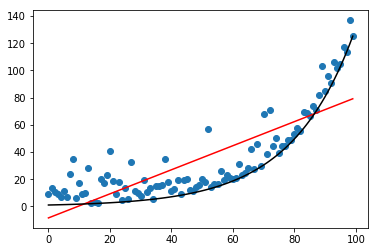

In [10]:
plt.scatter(X_p2, Y_p2)
plt.plot(X_p2, linear_regression(X_p2_model, w_p2_final), c='r')
plt.plot(X_p2, 1.05**X_p2, c='black')

Modifica en la següent cel·la les dades `x_p2_improved` de forma que incloguin una nova característica que permetin modelar millor la distribució.

Ara mateix les nostres dades tenen una única característica (sense comptar el *bias* que afegim després). Sigui aquesta característica $x$ (de fet, la coordenada $x$), afageix una nova característica $x^2$. Únicament pots modificar les dades en el lloc indicat, sense bucles i sense modifiquis cap altra funció ni cel·la.

In [14]:
X_p2_improved = X_p2[..., np.newaxis]

###############################################
# AFAGEIX LA CARACTERÍSTICA AQUÍ (sense bucles)
###############################################
x2 = X_p2**2
X_p2_improved=np.hstack((X_p2_improved, np.atleast_2d(x2).T))
print(X_p2_improved)
#X_p2_improved = np.insert(X_p2_improved, 1, x2, axis=1)
#X_p2_improved= np.c_[X_p2, x2 ]
X_p2_improved = add_bias(X_p2_improved)
w_p2_improved_model = np.random.random(size=[1, X_p2_improved.shape[1]])
w_p2_improved_final = gradient_descend(lambda w: model(w, X_p2_improved, Y_p2), w_p2_improved_model, 0.0001, max_iter=100000, print_iters=10000)

[[   0    0]
 [   1    1]
 [   2    4]
 [   3    9]
 [   4   16]
 [   5   25]
 [   6   36]
 [   7   49]
 [   8   64]
 [   9   81]
 [  10  100]
 [  11  121]
 [  12  144]
 [  13  169]
 [  14  196]
 [  15  225]
 [  16  256]
 [  17  289]
 [  18  324]
 [  19  361]
 [  20  400]
 [  21  441]
 [  22  484]
 [  23  529]
 [  24  576]
 [  25  625]
 [  26  676]
 [  27  729]
 [  28  784]
 [  29  841]
 [  30  900]
 [  31  961]
 [  32 1024]
 [  33 1089]
 [  34 1156]
 [  35 1225]
 [  36 1296]
 [  37 1369]
 [  38 1444]
 [  39 1521]
 [  40 1600]
 [  41 1681]
 [  42 1764]
 [  43 1849]
 [  44 1936]
 [  45 2025]
 [  46 2116]
 [  47 2209]
 [  48 2304]
 [  49 2401]
 [  50 2500]
 [  51 2601]
 [  52 2704]
 [  53 2809]
 [  54 2916]
 [  55 3025]
 [  56 3136]
 [  57 3249]
 [  58 3364]
 [  59 3481]
 [  60 3600]
 [  61 3721]
 [  62 3844]
 [  63 3969]
 [  64 4096]
 [  65 4225]
 [  66 4356]
 [  67 4489]
 [  68 4624]
 [  69 4761]
 [  70 4900]
 [  71 5041]
 [  72 5184]
 [  73 5329]
 [  74 5476]
 [  75 5625]
 [  76 5776]

781: 38305.303389
782: 38300.886815
783: 38296.470241
784: 38292.053667
785: 38287.637093
786: 38283.220519
787: 38278.803945
788: 38274.387371
789: 38269.970797
790: 38265.554223
791: 38261.137649
792: 38256.721075
793: 38252.304501
794: 38247.887927
795: 38243.471353
796: 38239.054779
797: 38234.638205
798: 38230.221631
799: 38225.805057
800: 38221.388483
801: 38216.971909
802: 38212.555335
803: 38208.138761
804: 38203.722187
805: 38199.305613
806: 38194.889040
807: 38190.472466
808: 38186.055892
809: 38181.639318
810: 38177.222744
811: 38172.806170
812: 38168.389596
813: 38163.973022
814: 38159.556449
815: 38155.139875
816: 38150.723301
817: 38146.306727
818: 38141.890153
819: 38137.473579
820: 38133.057006
821: 38128.640432
822: 38124.223858
823: 38119.807284
824: 38115.390711
825: 38110.974137
826: 38106.557563
827: 38102.140989
828: 38097.724416
829: 38093.307842
830: 38088.891268
831: 38084.474694
832: 38080.058121
833: 38075.641547
834: 38071.224973
835: 38066.808400
836: 38062

1631: 34551.218401
1632: 34546.801834
1633: 34542.385268
1634: 34537.968701
1635: 34533.552134
1636: 34529.135568
1637: 34524.719001
1638: 34520.302434
1639: 34515.885868
1640: 34511.469301
1641: 34507.052735
1642: 34502.636168
1643: 34498.219602
1644: 34493.803035
1645: 34489.386468
1646: 34484.969902
1647: 34480.553335
1648: 34476.136769
1649: 34471.720202
1650: 34467.303636
1651: 34462.887069
1652: 34458.470503
1653: 34454.053936
1654: 34449.637370
1655: 34445.220804
1656: 34440.804237
1657: 34436.387671
1658: 34431.971104
1659: 34427.554538
1660: 34423.137971
1661: 34418.721405
1662: 34414.304839
1663: 34409.888272
1664: 34405.471706
1665: 34401.055140
1666: 34396.638573
1667: 34392.222007
1668: 34387.805441
1669: 34383.388874
1670: 34378.972308
1671: 34374.555742
1672: 34370.139176
1673: 34365.722609
1674: 34361.306043
1675: 34356.889477
1676: 34352.472911
1677: 34348.056344
1678: 34343.639778
1679: 34339.223212
1680: 34334.806646
1681: 34330.390080
1682: 34325.973514
1683: 34321.

2480: 30801.557395
2481: 30797.140839
2482: 30792.724282
2483: 30788.307726
2484: 30783.891170
2485: 30779.474613
2486: 30775.058057
2487: 30770.641501
2488: 30766.224944
2489: 30761.808388
2490: 30757.391832
2491: 30752.975275
2492: 30748.558719
2493: 30744.142163
2494: 30739.725607
2495: 30735.309051
2496: 30730.892494
2497: 30726.475938
2498: 30722.059382
2499: 30717.642826
2500: 30713.226270
2501: 30708.809714
2502: 30704.393157
2503: 30699.976601
2504: 30695.560045
2505: 30691.143489
2506: 30686.726933
2507: 30682.310377
2508: 30677.893821
2509: 30673.477265
2510: 30669.060709
2511: 30664.644153
2512: 30660.227597
2513: 30655.811041
2514: 30651.394485
2515: 30646.977929
2516: 30642.561373
2517: 30638.144818
2518: 30633.728262
2519: 30629.311706
2520: 30624.895150
2521: 30620.478594
2522: 30616.062038
2523: 30611.645483
2524: 30607.228927
2525: 30602.812371
2526: 30598.395815
2527: 30593.979259
2528: 30589.562704
2529: 30585.146148
2530: 30580.729592
2531: 30576.313037
2532: 30571.

3338: 27012.158005
3339: 27007.741464
3340: 27003.324923
3341: 26998.908381
3342: 26994.491840
3343: 26990.075299
3344: 26985.658757
3345: 26981.242216
3346: 26976.825675
3347: 26972.409134
3348: 26967.992592
3349: 26963.576051
3350: 26959.159510
3351: 26954.742969
3352: 26950.326428
3353: 26945.909887
3354: 26941.493346
3355: 26937.076804
3356: 26932.660263
3357: 26928.243722
3358: 26923.827181
3359: 26919.410640
3360: 26914.994100
3361: 26910.577559
3362: 26906.161018
3363: 26901.744477
3364: 26897.327936
3365: 26892.911395
3366: 26888.494854
3367: 26884.078313
3368: 26879.661773
3369: 26875.245232
3370: 26870.828691
3371: 26866.412150
3372: 26861.995610
3373: 26857.579069
3374: 26853.162528
3375: 26848.745988
3376: 26844.329447
3377: 26839.912907
3378: 26835.496366
3379: 26831.079826
3380: 26826.663285
3381: 26822.246745
3382: 26817.830204
3383: 26813.413664
3384: 26808.997123
3385: 26804.580583
3386: 26800.164042
3387: 26795.747502
3388: 26791.330962
3389: 26786.914421
3390: 26782.

4188: 23258.106726
4189: 23253.690208
4190: 23249.273689
4191: 23244.857170
4192: 23240.440652
4193: 23236.024133
4194: 23231.607615
4195: 23227.191096
4196: 23222.774578
4197: 23218.358059
4198: 23213.941541
4199: 23209.525022
4200: 23205.108504
4201: 23200.691986
4202: 23196.275468
4203: 23191.858949
4204: 23187.442431
4205: 23183.025913
4206: 23178.609395
4207: 23174.192877
4208: 23169.776359
4209: 23165.359841
4210: 23160.943322
4211: 23156.526805
4212: 23152.110287
4213: 23147.693769
4214: 23143.277251
4215: 23138.860733
4216: 23134.444215
4217: 23130.027697
4218: 23125.611180
4219: 23121.194662
4220: 23116.778144
4221: 23112.361627
4222: 23107.945109
4223: 23103.528591
4224: 23099.112074
4225: 23094.695556
4226: 23090.279039
4227: 23085.862521
4228: 23081.446004
4229: 23077.029487
4230: 23072.612969
4231: 23068.196452
4232: 23063.779935
4233: 23059.363418
4234: 23054.946900
4235: 23050.530383
4236: 23046.113866
4237: 23041.697349
4238: 23037.280832
4239: 23032.864315
4240: 23028.

5034: 19521.746078
5035: 19517.329596
5036: 19512.913114
5037: 19508.496632
5038: 19504.080150
5039: 19499.663669
5040: 19495.247187
5041: 19490.830705
5042: 19486.414224
5043: 19481.997742
5044: 19477.581261
5045: 19473.164780
5046: 19468.748298
5047: 19464.331817
5048: 19459.915336
5049: 19455.498855
5050: 19451.082374
5051: 19446.665893
5052: 19442.249412
5053: 19437.832931
5054: 19433.416450
5055: 19428.999969
5056: 19424.583488
5057: 19420.167008
5058: 19415.750527
5059: 19411.334047
5060: 19406.917566
5061: 19402.501086
5062: 19398.084605
5063: 19393.668125
5064: 19389.251645
5065: 19384.835164
5066: 19380.418684
5067: 19376.002204
5068: 19371.585724
5069: 19367.169244
5070: 19362.752764
5071: 19358.336284
5072: 19353.919804
5073: 19349.503325
5074: 19345.086845
5075: 19340.670365
5076: 19336.253886
5077: 19331.837406
5078: 19327.420927
5079: 19323.004447
5080: 19318.587968
5081: 19314.171489
5082: 19309.755009
5083: 19305.338530
5084: 19300.922051
5085: 19296.505572
5086: 19292.

5907: 15666.184071
5908: 15661.767658
5909: 15657.351245
5910: 15652.934832
5911: 15648.518419
5912: 15644.102007
5913: 15639.685594
5914: 15635.269182
5915: 15630.852769
5916: 15626.436357
5917: 15622.019945
5918: 15617.603533
5919: 15613.187121
5920: 15608.770709
5921: 15604.354298
5922: 15599.937886
5923: 15595.521475
5924: 15591.105063
5925: 15586.688652
5926: 15582.272241
5927: 15577.855830
5928: 15573.439419
5929: 15569.023008
5930: 15564.606598
5931: 15560.190187
5932: 15555.773776
5933: 15551.357366
5934: 15546.940956
5935: 15542.524546
5936: 15538.108136
5937: 15533.691726
5938: 15529.275316
5939: 15524.858906
5940: 15520.442497
5941: 15516.026087
5942: 15511.609678
5943: 15507.193269
5944: 15502.776860
5945: 15498.360451
5946: 15493.944042
5947: 15489.527633
5948: 15485.111224
5949: 15480.694816
5950: 15476.278407
5951: 15471.861999
5952: 15467.445591
5953: 15463.029183
5954: 15458.612775
5955: 15454.196367
5956: 15449.779959
5957: 15445.363551
5958: 15440.947144
5959: 15436.

6761: 11894.619568
6762: 11890.203297
6763: 11885.787027
6764: 11881.370756
6765: 11876.954486
6766: 11872.538216
6767: 11868.121946
6768: 11863.705676
6769: 11859.289407
6770: 11854.873138
6771: 11850.456869
6772: 11846.040601
6773: 11841.624332
6774: 11837.208064
6775: 11832.791797
6776: 11828.375529
6777: 11823.959262
6778: 11819.542995
6779: 11815.126728
6780: 11810.710462
6781: 11806.294195
6782: 11801.877929
6783: 11797.461664
6784: 11793.045398
6785: 11788.629133
6786: 11784.212868
6787: 11779.796603
6788: 11775.380339
6789: 11770.964074
6790: 11766.547810
6791: 11762.131547
6792: 11757.715283
6793: 11753.299020
6794: 11748.882757
6795: 11744.466495
6796: 11740.050232
6797: 11735.633970
6798: 11731.217708
6799: 11726.801446
6800: 11722.385185
6801: 11717.968924
6802: 11713.552663
6803: 11709.136403
6804: 11704.720142
6805: 11700.303882
6806: 11695.887622
6807: 11691.471363
6808: 11687.055104
6809: 11682.638844
6810: 11678.222586
6811: 11673.806327
6812: 11669.390069
6813: 11664.

7601: 8185.079425
7602: 8180.663527
7603: 8176.247630
7604: 8171.831733
7605: 8167.415837
7606: 8162.999942
7607: 8158.584048
7608: 8154.168155
7609: 8149.752262
7610: 8145.336370
7611: 8140.920479
7612: 8136.504589
7613: 8132.088699
7614: 8127.672811
7615: 8123.256923
7616: 8118.841035
7617: 8114.425149
7618: 8110.009263
7619: 8105.593378
7620: 8101.177494
7621: 8096.761611
7622: 8092.345729
7623: 8087.929847
7624: 8083.513966
7625: 8079.098086
7626: 8074.682207
7627: 8070.266328
7628: 8065.850450
7629: 8061.434573
7630: 8057.018697
7631: 8052.602822
7632: 8048.186948
7633: 8043.771074
7634: 8039.355201
7635: 8034.939329
7636: 8030.523458
7637: 8026.107587
7638: 8021.691717
7639: 8017.275848
7640: 8012.859980
7641: 8008.444113
7642: 8004.028247
7643: 7999.612381
7644: 7995.196516
7645: 7990.780652
7646: 7986.364789
7647: 7981.948927
7648: 7977.533065
7649: 7973.117205
7650: 7968.701345
7651: 7964.285486
7652: 7959.869628
7653: 7955.453770
7654: 7951.037914
7655: 7946.622058
7656: 7942

8447: 4449.732316
8448: 4445.318109
8449: 4440.903905
8450: 4436.489707
8451: 4432.075513
8452: 4427.661324
8453: 4423.247140
8454: 4418.832961
8455: 4414.418787
8456: 4410.004618
8457: 4405.590453
8458: 4401.176293
8459: 4396.762139
8460: 4392.347989
8461: 4387.933844
8462: 4383.519704
8463: 4379.105569
8464: 4374.691439
8465: 4370.277314
8466: 4365.863194
8467: 4361.449080
8468: 4357.034970
8469: 4352.620865
8470: 4348.206765
8471: 4343.792671
8472: 4339.378581
8473: 4334.964497
8474: 4330.550418
8475: 4326.136344
8476: 4321.722275
8477: 4317.308211
8478: 4312.894153
8479: 4308.480099
8480: 4304.066051
8481: 4299.652009
8482: 4295.237971
8483: 4290.823939
8484: 4286.409912
8485: 4281.995890
8486: 4277.581874
8487: 4273.167863
8488: 4268.753858
8489: 4264.339858
8490: 4259.925863
8491: 4255.511874
8492: 4251.097890
8493: 4246.683911
8494: 4242.269938
8495: 4237.855971
8496: 4233.442009
8497: 4229.028053
8498: 4224.614102
8499: 4220.200156
8500: 4215.786217
8501: 4211.372282
8502: 4206

9269: 829.910028
9270: 825.563198
9271: 821.217112
9272: 816.871783
9273: 812.527222
9274: 808.183443
9275: 803.840457
9276: 799.498277
9277: 795.156918
9278: 790.816392
9279: 786.476713
9280: 782.137895
9281: 777.799953
9282: 773.462901
9283: 769.126755
9284: 764.791529
9285: 760.457240
9286: 756.123904
9287: 751.791537
9288: 747.460156
9289: 743.129778
9290: 738.800421
9291: 734.472103
9292: 730.144842
9293: 725.818658
9294: 721.493570
9295: 717.169597
9296: 712.846760
9297: 708.525079
9298: 704.204576
9299: 699.885273
9300: 695.567193
9301: 691.250357
9302: 686.934789
9303: 682.620514
9304: 678.307557
9305: 673.995941
9306: 669.685694
9307: 665.376842
9308: 661.069413
9309: 656.763433
9310: 652.458933
9311: 648.155941
9312: 643.854487
9313: 639.554604
9314: 635.256321
9315: 630.959673
9316: 626.664694
9317: 622.371416
9318: 618.079877
9319: 613.790111
9320: 609.502158
9321: 605.216055
9322: 600.931842
9323: 596.649560
9324: 592.369250
9325: 588.090956
9326: 583.814722
9327: 579.5405

10089: 146.284460
10090: 146.284023
10091: 146.283596
10092: 146.283159
10093: 146.282733
10094: 146.282296
10095: 146.281869
10096: 146.281433
10097: 146.281006
10098: 146.280570
10099: 146.280143
10100: 146.279707
10101: 146.279279
10102: 146.278843
10103: 146.278416
10104: 146.277981
10105: 146.277553
10106: 146.277118
10107: 146.276690
10108: 146.276255
10109: 146.275827
10110: 146.275392
10111: 146.274964
10112: 146.274529
10113: 146.274102
10114: 146.273667
10115: 146.273239
10116: 146.272804
10117: 146.272376
10118: 146.271941
10119: 146.271514
10120: 146.271079
10121: 146.270651
10122: 146.270217
10123: 146.269789
10124: 146.269354
10125: 146.268926
10126: 146.268492
10127: 146.268064
10128: 146.267630
10129: 146.267202
10130: 146.266768
10131: 146.266340
10132: 146.265906
10133: 146.265478
10134: 146.265044
10135: 146.264616
10136: 146.264182
10137: 146.263754
10138: 146.263320
10139: 146.262892
10140: 146.262458
10141: 146.262030
10142: 146.261596
10143: 146.261168
10144: 146

10931: 145.926848
10932: 145.926430
10933: 145.926012
10934: 145.925594
10935: 145.925177
10936: 145.924759
10937: 145.924341
10938: 145.923924
10939: 145.923506
10940: 145.923089
10941: 145.922671
10942: 145.922253
10943: 145.921836
10944: 145.921418
10945: 145.921001
10946: 145.920583
10947: 145.920166
10948: 145.919748
10949: 145.919331
10950: 145.918913
10951: 145.918496
10952: 145.918079
10953: 145.917661
10954: 145.917244
10955: 145.916826
10956: 145.916409
10957: 145.915992
10958: 145.915574
10959: 145.915157
10960: 145.914740
10961: 145.914323
10962: 145.913905
10963: 145.913488
10964: 145.913071
10965: 145.912654
10966: 145.912237
10967: 145.911819
10968: 145.911402
10969: 145.910985
10970: 145.910568
10971: 145.910151
10972: 145.909734
10973: 145.909317
10974: 145.908900
10975: 145.908483
10976: 145.908066
10977: 145.907649
10978: 145.907232
10979: 145.906815
10980: 145.906398
10981: 145.905981
10982: 145.905564
10983: 145.905147
10984: 145.904730
10985: 145.904313
10986: 145

11770: 145.582068
11771: 145.581664
11772: 145.581260
11773: 145.580855
11774: 145.580451
11775: 145.580047
11776: 145.579643
11777: 145.579239
11778: 145.578835
11779: 145.578431
11780: 145.578027
11781: 145.577623
11782: 145.577219
11783: 145.576815
11784: 145.576411
11785: 145.576007
11786: 145.575603
11787: 145.575199
11788: 145.574795
11789: 145.574391
11790: 145.573987
11791: 145.573583
11792: 145.573179
11793: 145.572775
11794: 145.572372
11795: 145.571968
11796: 145.571564
11797: 145.571160
11798: 145.570756
11799: 145.570353
11800: 145.569949
11801: 145.569545
11802: 145.569142
11803: 145.568738
11804: 145.568334
11805: 145.567930
11806: 145.567527
11807: 145.567123
11808: 145.566720
11809: 145.566316
11810: 145.565912
11811: 145.565509
11812: 145.565105
11813: 145.564702
11814: 145.564298
11815: 145.563895
11816: 145.563491
11817: 145.563088
11818: 145.562684
11819: 145.562281
11820: 145.561877
11821: 145.561474
11822: 145.561071
11823: 145.560667
11824: 145.560264
11825: 145

12602: 145.251211
12603: 145.250820
12604: 145.250429
12605: 145.250038
12606: 145.249647
12607: 145.249255
12608: 145.248864
12609: 145.248473
12610: 145.248082
12611: 145.247691
12612: 145.247300
12613: 145.246909
12614: 145.246518
12615: 145.246127
12616: 145.245736
12617: 145.245345
12618: 145.244954
12619: 145.244563
12620: 145.244172
12621: 145.243781
12622: 145.243391
12623: 145.243000
12624: 145.242609
12625: 145.242218
12626: 145.241827
12627: 145.241436
12628: 145.241046
12629: 145.240655
12630: 145.240264
12631: 145.239873
12632: 145.239482
12633: 145.239092
12634: 145.238701
12635: 145.238310
12636: 145.237920
12637: 145.237529
12638: 145.237138
12639: 145.236748
12640: 145.236357
12641: 145.235967
12642: 145.235576
12643: 145.235185
12644: 145.234795
12645: 145.234404
12646: 145.234014
12647: 145.233623
12648: 145.233233
12649: 145.232842
12650: 145.232452
12651: 145.232061
12652: 145.231671
12653: 145.231281
12654: 145.230890
12655: 145.230500
12656: 145.230109
12657: 145

13437: 144.929886
13438: 144.929507
13439: 144.929129
13440: 144.928750
13441: 144.928372
13442: 144.927993
13443: 144.927615
13444: 144.927236
13445: 144.926858
13446: 144.926479
13447: 144.926101
13448: 144.925723
13449: 144.925344
13450: 144.924966
13451: 144.924588
13452: 144.924209
13453: 144.923831
13454: 144.923453
13455: 144.923075
13456: 144.922696
13457: 144.922318
13458: 144.921940
13459: 144.921562
13460: 144.921184
13461: 144.920805
13462: 144.920427
13463: 144.920049
13464: 144.919671
13465: 144.919293
13466: 144.918915
13467: 144.918537
13468: 144.918159
13469: 144.917781
13470: 144.917403
13471: 144.917025
13472: 144.916647
13473: 144.916269
13474: 144.915891
13475: 144.915513
13476: 144.915135
13477: 144.914757
13478: 144.914379
13479: 144.914001
13480: 144.913623
13481: 144.913245
13482: 144.912867
13483: 144.912489
13484: 144.912112
13485: 144.911734
13486: 144.911356
13487: 144.910978
13488: 144.910600
13489: 144.910223
13490: 144.909845
13491: 144.909467
13492: 144

14266: 144.621174
14267: 144.620808
14268: 144.620442
14269: 144.620076
14270: 144.619709
14271: 144.619343
14272: 144.618977
14273: 144.618611
14274: 144.618244
14275: 144.617878
14276: 144.617512
14277: 144.617146
14278: 144.616780
14279: 144.616413
14280: 144.616047
14281: 144.615681
14282: 144.615315
14283: 144.614949
14284: 144.614583
14285: 144.614217
14286: 144.613851
14287: 144.613485
14288: 144.613119
14289: 144.612753
14290: 144.612387
14291: 144.612021
14292: 144.611655
14293: 144.611289
14294: 144.610923
14295: 144.610557
14296: 144.610191
14297: 144.609825
14298: 144.609460
14299: 144.609094
14300: 144.608728
14301: 144.608362
14302: 144.607996
14303: 144.607630
14304: 144.607265
14305: 144.606899
14306: 144.606533
14307: 144.606167
14308: 144.605802
14309: 144.605436
14310: 144.605070
14311: 144.604705
14312: 144.604339
14313: 144.603973
14314: 144.603608
14315: 144.603242
14316: 144.602876
14317: 144.602511
14318: 144.602145
14319: 144.601780
14320: 144.601414
14321: 144

15073: 144.330222
15074: 144.329867
15075: 144.329512
15076: 144.329157
15077: 144.328803
15078: 144.328448
15079: 144.328093
15080: 144.327739
15081: 144.327384
15082: 144.327029
15083: 144.326674
15084: 144.326320
15085: 144.325965
15086: 144.325611
15087: 144.325256
15088: 144.324901
15089: 144.324547
15090: 144.324192
15091: 144.323838
15092: 144.323483
15093: 144.323128
15094: 144.322774
15095: 144.322419
15096: 144.322065
15097: 144.321711
15098: 144.321356
15099: 144.321002
15100: 144.320647
15101: 144.320293
15102: 144.319938
15103: 144.319584
15104: 144.319230
15105: 144.318875
15106: 144.318521
15107: 144.318167
15108: 144.317812
15109: 144.317458
15110: 144.317104
15111: 144.316749
15112: 144.316395
15113: 144.316041
15114: 144.315687
15115: 144.315332
15116: 144.314978
15117: 144.314624
15118: 144.314270
15119: 144.313916
15120: 144.313561
15121: 144.313207
15122: 144.312853
15123: 144.312499
15124: 144.312145
15125: 144.311791
15126: 144.311437
15127: 144.311083
15128: 144

15898: 144.042241
15899: 144.041898
15900: 144.041554
15901: 144.041211
15902: 144.040867
15903: 144.040524
15904: 144.040181
15905: 144.039838
15906: 144.039494
15907: 144.039151
15908: 144.038808
15909: 144.038464
15910: 144.038121
15911: 144.037778
15912: 144.037435
15913: 144.037092
15914: 144.036748
15915: 144.036405
15916: 144.036062
15917: 144.035719
15918: 144.035376
15919: 144.035033
15920: 144.034690
15921: 144.034347
15922: 144.034004
15923: 144.033660
15924: 144.033317
15925: 144.032974
15926: 144.032631
15927: 144.032288
15928: 144.031945
15929: 144.031602
15930: 144.031259
15931: 144.030917
15932: 144.030574
15933: 144.030231
15934: 144.029888
15935: 144.029545
15936: 144.029202
15937: 144.028859
15938: 144.028516
15939: 144.028173
15940: 144.027831
15941: 144.027488
15942: 144.027145
15943: 144.026802
15944: 144.026459
15945: 144.026117
15946: 144.025774
15947: 144.025431
15948: 144.025089
15949: 144.024746
15950: 144.024403
15951: 144.024060
15952: 144.023718
15953: 144

16722: 143.763869
16723: 143.763537
16724: 143.763204
16725: 143.762872
16726: 143.762540
16727: 143.762208
16728: 143.761875
16729: 143.761543
16730: 143.761211
16731: 143.760879
16732: 143.760546
16733: 143.760214
16734: 143.759882
16735: 143.759550
16736: 143.759218
16737: 143.758886
16738: 143.758554
16739: 143.758221
16740: 143.757889
16741: 143.757557
16742: 143.757225
16743: 143.756893
16744: 143.756561
16745: 143.756229
16746: 143.755897
16747: 143.755565
16748: 143.755233
16749: 143.754901
16750: 143.754569
16751: 143.754237
16752: 143.753905
16753: 143.753573
16754: 143.753241
16755: 143.752909
16756: 143.752578
16757: 143.752246
16758: 143.751914
16759: 143.751582
16760: 143.751250
16761: 143.750918
16762: 143.750586
16763: 143.750255
16764: 143.749923
16765: 143.749591
16766: 143.749259
16767: 143.748928
16768: 143.748596
16769: 143.748264
16770: 143.747933
16771: 143.747601
16772: 143.747269
16773: 143.746937
16774: 143.746606
16775: 143.746274
16776: 143.745943
16777: 143

17559: 143.490290
17560: 143.489968
17561: 143.489647
17562: 143.489325
17563: 143.489004
17564: 143.488682
17565: 143.488361
17566: 143.488040
17567: 143.487718
17568: 143.487397
17569: 143.487076
17570: 143.486754
17571: 143.486433
17572: 143.486112
17573: 143.485791
17574: 143.485469
17575: 143.485148
17576: 143.484827
17577: 143.484506
17578: 143.484184
17579: 143.483863
17580: 143.483542
17581: 143.483221
17582: 143.482900
17583: 143.482579
17584: 143.482257
17585: 143.481936
17586: 143.481615
17587: 143.481294
17588: 143.480973
17589: 143.480652
17590: 143.480331
17591: 143.480010
17592: 143.479689
17593: 143.479368
17594: 143.479047
17595: 143.478726
17596: 143.478405
17597: 143.478084
17598: 143.477763
17599: 143.477442
17600: 143.477121
17601: 143.476800
17602: 143.476479
17603: 143.476158
17604: 143.475838
17605: 143.475517
17606: 143.475196
17607: 143.474875
17608: 143.474554
17609: 143.474233
17610: 143.473913
17611: 143.473592
17612: 143.473271
17613: 143.472950
17614: 143

18379: 143.230967
18380: 143.230656
18381: 143.230345
18382: 143.230033
18383: 143.229722
18384: 143.229411
18385: 143.229100
18386: 143.228789
18387: 143.228478
18388: 143.228167
18389: 143.227856
18390: 143.227545
18391: 143.227234
18392: 143.226923
18393: 143.226612
18394: 143.226302
18395: 143.225991
18396: 143.225680
18397: 143.225369
18398: 143.225058
18399: 143.224747
18400: 143.224436
18401: 143.224125
18402: 143.223815
18403: 143.223504
18404: 143.223193
18405: 143.222882
18406: 143.222571
18407: 143.222261
18408: 143.221950
18409: 143.221639
18410: 143.221328
18411: 143.221018
18412: 143.220707
18413: 143.220396
18414: 143.220086
18415: 143.219775
18416: 143.219464
18417: 143.219154
18418: 143.218843
18419: 143.218532
18420: 143.218222
18421: 143.217911
18422: 143.217601
18423: 143.217290
18424: 143.216980
18425: 143.216669
18426: 143.216358
18427: 143.216048
18428: 143.215737
18429: 143.215427
18430: 143.215116
18431: 143.214806
18432: 143.214496
18433: 143.214185
18434: 143

19223: 142.972767
19224: 142.972467
19225: 142.972166
19226: 142.971865
19227: 142.971564
19228: 142.971263
19229: 142.970963
19230: 142.970662
19231: 142.970361
19232: 142.970061
19233: 142.969760
19234: 142.969459
19235: 142.969159
19236: 142.968858
19237: 142.968557
19238: 142.968257
19239: 142.967956
19240: 142.967655
19241: 142.967355
19242: 142.967054
19243: 142.966754
19244: 142.966453
19245: 142.966153
19246: 142.965852
19247: 142.965552
19248: 142.965251
19249: 142.964951
19250: 142.964650
19251: 142.964350
19252: 142.964049
19253: 142.963749
19254: 142.963448
19255: 142.963148
19256: 142.962848
19257: 142.962547
19258: 142.962247
19259: 142.961946
19260: 142.961646
19261: 142.961346
19262: 142.961045
19263: 142.960745
19264: 142.960445
19265: 142.960144
19266: 142.959844
19267: 142.959544
19268: 142.959244
19269: 142.958943
19270: 142.958643
19271: 142.958343
19272: 142.958043
19273: 142.957742
19274: 142.957442
19275: 142.957142
19276: 142.956842
19277: 142.956542
19278: 142

20072: 142.721677
20073: 142.721386
20074: 142.721095
20075: 142.720804
20076: 142.720514
20077: 142.720223
20078: 142.719932
20079: 142.719642
20080: 142.719351
20081: 142.719060
20082: 142.718770
20083: 142.718479
20084: 142.718188
20085: 142.717898
20086: 142.717607
20087: 142.717317
20088: 142.717026
20089: 142.716736
20090: 142.716445
20091: 142.716154
20092: 142.715864
20093: 142.715573
20094: 142.715283
20095: 142.714992
20096: 142.714702
20097: 142.714411
20098: 142.714121
20099: 142.713831
20100: 142.713540
20101: 142.713250
20102: 142.712959
20103: 142.712669
20104: 142.712378
20105: 142.712088
20106: 142.711798
20107: 142.711507
20108: 142.711217
20109: 142.710927
20110: 142.710636
20111: 142.710346
20112: 142.710056
20113: 142.709765
20114: 142.709475
20115: 142.709185
20116: 142.708895
20117: 142.708604
20118: 142.708314
20119: 142.708024
20120: 142.707734
20121: 142.707444
20122: 142.707153
20123: 142.706863
20124: 142.706573
20125: 142.706283
20126: 142.705993
20127: 142

20926: 142.477570
20927: 142.477289
20928: 142.477008
20929: 142.476727
20930: 142.476446
20931: 142.476165
20932: 142.475884
20933: 142.475603
20934: 142.475322
20935: 142.475041
20936: 142.474760
20937: 142.474480
20938: 142.474199
20939: 142.473918
20940: 142.473637
20941: 142.473356
20942: 142.473075
20943: 142.472795
20944: 142.472514
20945: 142.472233
20946: 142.471952
20947: 142.471672
20948: 142.471391
20949: 142.471110
20950: 142.470829
20951: 142.470549
20952: 142.470268
20953: 142.469987
20954: 142.469707
20955: 142.469426
20956: 142.469145
20957: 142.468865
20958: 142.468584
20959: 142.468304
20960: 142.468023
20961: 142.467742
20962: 142.467462
20963: 142.467181
20964: 142.466901
20965: 142.466620
20966: 142.466340
20967: 142.466059
20968: 142.465779
20969: 142.465498
20970: 142.465218
20971: 142.464937
20972: 142.464657
20973: 142.464376
20974: 142.464096
20975: 142.463815
20976: 142.463535
20977: 142.463254
20978: 142.462974
20979: 142.462694
20980: 142.462413
20981: 142

21773: 142.243579
21774: 142.243307
21775: 142.243035
21776: 142.242764
21777: 142.242492
21778: 142.242221
21779: 142.241949
21780: 142.241678
21781: 142.241406
21782: 142.241135
21783: 142.240863
21784: 142.240592
21785: 142.240320
21786: 142.240049
21787: 142.239777
21788: 142.239506
21789: 142.239235
21790: 142.238963
21791: 142.238692
21792: 142.238420
21793: 142.238149
21794: 142.237878
21795: 142.237606
21796: 142.237335
21797: 142.237064
21798: 142.236792
21799: 142.236521
21800: 142.236250
21801: 142.235978
21802: 142.235707
21803: 142.235436
21804: 142.235165
21805: 142.234893
21806: 142.234622
21807: 142.234351
21808: 142.234080
21809: 142.233808
21810: 142.233537
21811: 142.233266
21812: 142.232995
21813: 142.232724
21814: 142.232453
21815: 142.232181
21816: 142.231910
21817: 142.231639
21818: 142.231368
21819: 142.231097
21820: 142.230826
21821: 142.230555
21822: 142.230284
21823: 142.230013
21824: 142.229742
21825: 142.229471
21826: 142.229200
21827: 142.228929
21828: 142

22603: 142.021874
22604: 142.021612
22605: 142.021349
22606: 142.021086
22607: 142.020824
22608: 142.020561
22609: 142.020298
22610: 142.020036
22611: 142.019773
22612: 142.019511
22613: 142.019248
22614: 142.018985
22615: 142.018723
22616: 142.018460
22617: 142.018198
22618: 142.017935
22619: 142.017673
22620: 142.017410
22621: 142.017148
22622: 142.016885
22623: 142.016623
22624: 142.016360
22625: 142.016098
22626: 142.015835
22627: 142.015573
22628: 142.015311
22629: 142.015048
22630: 142.014786
22631: 142.014523
22632: 142.014261
22633: 142.013999
22634: 142.013736
22635: 142.013474
22636: 142.013212
22637: 142.012949
22638: 142.012687
22639: 142.012425
22640: 142.012162
22641: 142.011900
22642: 142.011638
22643: 142.011375
22644: 142.011113
22645: 142.010851
22646: 142.010589
22647: 142.010326
22648: 142.010064
22649: 142.009802
22650: 142.009540
22651: 142.009278
22652: 142.009016
22653: 142.008753
22654: 142.008491
22655: 142.008229
22656: 142.007967
22657: 142.007705
22658: 142

23438: 141.806176
23439: 141.805922
23440: 141.805668
23441: 141.805414
23442: 141.805160
23443: 141.804906
23444: 141.804652
23445: 141.804398
23446: 141.804144
23447: 141.803890
23448: 141.803636
23449: 141.803382
23450: 141.803128
23451: 141.802874
23452: 141.802621
23453: 141.802367
23454: 141.802113
23455: 141.801859
23456: 141.801605
23457: 141.801351
23458: 141.801098
23459: 141.800844
23460: 141.800590
23461: 141.800336
23462: 141.800082
23463: 141.799829
23464: 141.799575
23465: 141.799321
23466: 141.799067
23467: 141.798814
23468: 141.798560
23469: 141.798306
23470: 141.798053
23471: 141.797799
23472: 141.797545
23473: 141.797292
23474: 141.797038
23475: 141.796784
23476: 141.796531
23477: 141.796277
23478: 141.796024
23479: 141.795770
23480: 141.795516
23481: 141.795263
23482: 141.795009
23483: 141.794756
23484: 141.794502
23485: 141.794249
23486: 141.793995
23487: 141.793742
23488: 141.793488
23489: 141.793235
23490: 141.792981
23491: 141.792728
23492: 141.792474
23493: 141

24277: 141.596625
24278: 141.596379
24279: 141.596134
24280: 141.595888
24281: 141.595643
24282: 141.595397
24283: 141.595152
24284: 141.594906
24285: 141.594661
24286: 141.594415
24287: 141.594170
24288: 141.593924
24289: 141.593679
24290: 141.593433
24291: 141.593188
24292: 141.592942
24293: 141.592697
24294: 141.592452
24295: 141.592206
24296: 141.591961
24297: 141.591715
24298: 141.591470
24299: 141.591225
24300: 141.590979
24301: 141.590734
24302: 141.590489
24303: 141.590243
24304: 141.589998
24305: 141.589753
24306: 141.589508
24307: 141.589262
24308: 141.589017
24309: 141.588772
24310: 141.588527
24311: 141.588281
24312: 141.588036
24313: 141.587791
24314: 141.587546
24315: 141.587300
24316: 141.587055
24317: 141.586810
24318: 141.586565
24319: 141.586320
24320: 141.586075
24321: 141.585830
24322: 141.585584
24323: 141.585339
24324: 141.585094
24325: 141.584849
24326: 141.584604
24327: 141.584359
24328: 141.584114
24329: 141.583869
24330: 141.583624
24331: 141.583379
24332: 141

25118: 141.393568
25119: 141.393331
25120: 141.393093
25121: 141.392856
25122: 141.392618
25123: 141.392381
25124: 141.392144
25125: 141.391906
25126: 141.391669
25127: 141.391432
25128: 141.391195
25129: 141.390957
25130: 141.390720
25131: 141.390483
25132: 141.390246
25133: 141.390008
25134: 141.389771
25135: 141.389534
25136: 141.389297
25137: 141.389060
25138: 141.388822
25139: 141.388585
25140: 141.388348
25141: 141.388111
25142: 141.387874
25143: 141.387637
25144: 141.387399
25145: 141.387162
25146: 141.386925
25147: 141.386688
25148: 141.386451
25149: 141.386214
25150: 141.385977
25151: 141.385740
25152: 141.385503
25153: 141.385266
25154: 141.385029
25155: 141.384792
25156: 141.384555
25157: 141.384318
25158: 141.384081
25159: 141.383844
25160: 141.383607
25161: 141.383370
25162: 141.383133
25163: 141.382896
25164: 141.382659
25165: 141.382422
25166: 141.382185
25167: 141.381948
25168: 141.381711
25169: 141.381474
25170: 141.381237
25171: 141.381001
25172: 141.380764
25173: 141

25966: 141.195682
25967: 141.195453
25968: 141.195224
25969: 141.194994
25970: 141.194765
25971: 141.194535
25972: 141.194306
25973: 141.194077
25974: 141.193847
25975: 141.193618
25976: 141.193389
25977: 141.193160
25978: 141.192930
25979: 141.192701
25980: 141.192472
25981: 141.192243
25982: 141.192013
25983: 141.191784
25984: 141.191555
25985: 141.191326
25986: 141.191096
25987: 141.190867
25988: 141.190638
25989: 141.190409
25990: 141.190180
25991: 141.189951
25992: 141.189721
25993: 141.189492
25994: 141.189263
25995: 141.189034
25996: 141.188805
25997: 141.188576
25998: 141.188347
25999: 141.188118
26000: 141.187889
26001: 141.187660
26002: 141.187431
26003: 141.187201
26004: 141.186972
26005: 141.186743
26006: 141.186514
26007: 141.186285
26008: 141.186056
26009: 141.185827
26010: 141.185598
26011: 141.185369
26012: 141.185141
26013: 141.184912
26014: 141.184683
26015: 141.184454
26016: 141.184225
26017: 141.183996
26018: 141.183767
26019: 141.183538
26020: 141.183309
26021: 141

26813: 141.004685
26814: 141.004463
26815: 141.004242
26816: 141.004020
26817: 141.003799
26818: 141.003577
26819: 141.003355
26820: 141.003134
26821: 141.002912
26822: 141.002691
26823: 141.002469
26824: 141.002247
26825: 141.002026
26826: 141.001804
26827: 141.001583
26828: 141.001361
26829: 141.001140
26830: 141.000918
26831: 141.000697
26832: 141.000475
26833: 141.000254
26834: 141.000032
26835: 140.999811
26836: 140.999589
26837: 140.999368
26838: 140.999146
26839: 140.998925
26840: 140.998704
26841: 140.998482
26842: 140.998261
26843: 140.998039
26844: 140.997818
26845: 140.997597
26846: 140.997375
26847: 140.997154
26848: 140.996933
26849: 140.996711
26850: 140.996490
26851: 140.996269
26852: 140.996047
26853: 140.995826
26854: 140.995605
26855: 140.995383
26856: 140.995162
26857: 140.994941
26858: 140.994720
26859: 140.994498
26860: 140.994277
26861: 140.994056
26862: 140.993835
26863: 140.993613
26864: 140.993392
26865: 140.993171
26866: 140.992950
26867: 140.992729
26868: 140

27678: 140.816269
27679: 140.816055
27680: 140.815841
27681: 140.815627
27682: 140.815413
27683: 140.815199
27684: 140.814985
27685: 140.814771
27686: 140.814557
27687: 140.814343
27688: 140.814129
27689: 140.813915
27690: 140.813701
27691: 140.813487
27692: 140.813274
27693: 140.813060
27694: 140.812846
27695: 140.812632
27696: 140.812418
27697: 140.812204
27698: 140.811990
27699: 140.811776
27700: 140.811563
27701: 140.811349
27702: 140.811135
27703: 140.810921
27704: 140.810707
27705: 140.810493
27706: 140.810280
27707: 140.810066
27708: 140.809852
27709: 140.809638
27710: 140.809425
27711: 140.809211
27712: 140.808997
27713: 140.808783
27714: 140.808570
27715: 140.808356
27716: 140.808142
27717: 140.807929
27718: 140.807715
27719: 140.807501
27720: 140.807287
27721: 140.807074
27722: 140.806860
27723: 140.806647
27724: 140.806433
27725: 140.806219
27726: 140.806006
27727: 140.805792
27728: 140.805578
27729: 140.805365
27730: 140.805151
27731: 140.804938
27732: 140.804724
27733: 140

28537: 140.635581
28538: 140.635375
28539: 140.635168
28540: 140.634961
28541: 140.634754
28542: 140.634548
28543: 140.634341
28544: 140.634135
28545: 140.633928
28546: 140.633721
28547: 140.633515
28548: 140.633308
28549: 140.633101
28550: 140.632895
28551: 140.632688
28552: 140.632482
28553: 140.632275
28554: 140.632068
28555: 140.631862
28556: 140.631655
28557: 140.631449
28558: 140.631242
28559: 140.631036
28560: 140.630829
28561: 140.630623
28562: 140.630416
28563: 140.630210
28564: 140.630003
28565: 140.629797
28566: 140.629590
28567: 140.629384
28568: 140.629177
28569: 140.628971
28570: 140.628765
28571: 140.628558
28572: 140.628352
28573: 140.628145
28574: 140.627939
28575: 140.627732
28576: 140.627526
28577: 140.627320
28578: 140.627113
28579: 140.626907
28580: 140.626701
28581: 140.626494
28582: 140.626288
28583: 140.626082
28584: 140.625875
28585: 140.625669
28586: 140.625463
28587: 140.625256
28588: 140.625050
28589: 140.624844
28590: 140.624638
28591: 140.624431
28592: 140

29388: 140.462677
29389: 140.462478
29390: 140.462278
29391: 140.462078
29392: 140.461879
29393: 140.461679
29394: 140.461479
29395: 140.461280
29396: 140.461080
29397: 140.460880
29398: 140.460681
29399: 140.460481
29400: 140.460282
29401: 140.460082
29402: 140.459882
29403: 140.459683
29404: 140.459483
29405: 140.459284
29406: 140.459084
29407: 140.458885
29408: 140.458685
29409: 140.458486
29410: 140.458286
29411: 140.458087
29412: 140.457887
29413: 140.457688
29414: 140.457488
29415: 140.457289
29416: 140.457089
29417: 140.456890
29418: 140.456690
29419: 140.456491
29420: 140.456291
29421: 140.456092
29422: 140.455892
29423: 140.455693
29424: 140.455494
29425: 140.455294
29426: 140.455095
29427: 140.454896
29428: 140.454696
29429: 140.454497
29430: 140.454297
29431: 140.454098
29432: 140.453899
29433: 140.453699
29434: 140.453500
29435: 140.453301
29436: 140.453101
29437: 140.452902
29438: 140.452703
29439: 140.452504
29440: 140.452304
29441: 140.452105
29442: 140.451906
29443: 140

30261: 140.291403
30262: 140.291211
30263: 140.291018
30264: 140.290825
30265: 140.290632
30266: 140.290440
30267: 140.290247
30268: 140.290054
30269: 140.289862
30270: 140.289669
30271: 140.289476
30272: 140.289284
30273: 140.289091
30274: 140.288898
30275: 140.288706
30276: 140.288513
30277: 140.288321
30278: 140.288128
30279: 140.287935
30280: 140.287743
30281: 140.287550
30282: 140.287358
30283: 140.287165
30284: 140.286973
30285: 140.286780
30286: 140.286588
30287: 140.286395
30288: 140.286202
30289: 140.286010
30290: 140.285817
30291: 140.285625
30292: 140.285432
30293: 140.285240
30294: 140.285047
30295: 140.284855
30296: 140.284663
30297: 140.284470
30298: 140.284278
30299: 140.284085
30300: 140.283893
30301: 140.283700
30302: 140.283508
30303: 140.283316
30304: 140.283123
30305: 140.282931
30306: 140.282738
30307: 140.282546
30308: 140.282354
30309: 140.282161
30310: 140.281969
30311: 140.281777
30312: 140.281584
30313: 140.281392
30314: 140.281200
30315: 140.281007
30316: 140

31120: 140.128705
31121: 140.128519
31122: 140.128333
31123: 140.128147
31124: 140.127961
31125: 140.127775
31126: 140.127589
31127: 140.127402
31128: 140.127216
31129: 140.127030
31130: 140.126844
31131: 140.126658
31132: 140.126472
31133: 140.126286
31134: 140.126100
31135: 140.125914
31136: 140.125728
31137: 140.125542
31138: 140.125356
31139: 140.125170
31140: 140.124984
31141: 140.124798
31142: 140.124612
31143: 140.124426
31144: 140.124241
31145: 140.124055
31146: 140.123869
31147: 140.123683
31148: 140.123497
31149: 140.123311
31150: 140.123125
31151: 140.122939
31152: 140.122753
31153: 140.122567
31154: 140.122382
31155: 140.122196
31156: 140.122010
31157: 140.121824
31158: 140.121638
31159: 140.121452
31160: 140.121267
31161: 140.121081
31162: 140.120895
31163: 140.120709
31164: 140.120523
31165: 140.120338
31166: 140.120152
31167: 140.119966
31168: 140.119780
31169: 140.119595
31170: 140.119409
31171: 140.119223
31172: 140.119037
31173: 140.118852
31174: 140.118666
31175: 140

31992: 139.969259
31993: 139.969079
31994: 139.968900
31995: 139.968720
31996: 139.968541
31997: 139.968361
31998: 139.968181
31999: 139.968002
32000: 139.967822
32001: 139.967643
32002: 139.967463
32003: 139.967284
32004: 139.967104
32005: 139.966925
32006: 139.966745
32007: 139.966566
32008: 139.966386
32009: 139.966207
32010: 139.966027
32011: 139.965848
32012: 139.965668
32013: 139.965489
32014: 139.965309
32015: 139.965130
32016: 139.964950
32017: 139.964771
32018: 139.964591
32019: 139.964412
32020: 139.964232
32021: 139.964053
32022: 139.963874
32023: 139.963694
32024: 139.963515
32025: 139.963335
32026: 139.963156
32027: 139.962977
32028: 139.962797
32029: 139.962618
32030: 139.962439
32031: 139.962259
32032: 139.962080
32033: 139.961901
32034: 139.961721
32035: 139.961542
32036: 139.961363
32037: 139.961183
32038: 139.961004
32039: 139.960825
32040: 139.960646
32041: 139.960466
32042: 139.960287
32043: 139.960108
32044: 139.959929
32045: 139.959749
32046: 139.959570
32047: 139

32846: 139.818498
32847: 139.818324
32848: 139.818151
32849: 139.817977
32850: 139.817804
32851: 139.817630
32852: 139.817457
32853: 139.817284
32854: 139.817110
32855: 139.816937
32856: 139.816763
32857: 139.816590
32858: 139.816416
32859: 139.816243
32860: 139.816070
32861: 139.815896
32862: 139.815723
32863: 139.815550
32864: 139.815376
32865: 139.815203
32866: 139.815030
32867: 139.814856
32868: 139.814683
32869: 139.814510
32870: 139.814336
32871: 139.814163
32872: 139.813990
32873: 139.813816
32874: 139.813643
32875: 139.813470
32876: 139.813296
32877: 139.813123
32878: 139.812950
32879: 139.812777
32880: 139.812603
32881: 139.812430
32882: 139.812257
32883: 139.812084
32884: 139.811911
32885: 139.811737
32886: 139.811564
32887: 139.811391
32888: 139.811218
32889: 139.811045
32890: 139.810871
32891: 139.810698
32892: 139.810525
32893: 139.810352
32894: 139.810179
32895: 139.810006
32896: 139.809833
32897: 139.809659
32898: 139.809486
32899: 139.809313
32900: 139.809140
32901: 139

33685: 139.675408
33686: 139.675241
33687: 139.675073
33688: 139.674906
33689: 139.674738
33690: 139.674570
33691: 139.674403
33692: 139.674235
33693: 139.674067
33694: 139.673900
33695: 139.673732
33696: 139.673565
33697: 139.673397
33698: 139.673230
33699: 139.673062
33700: 139.672895
33701: 139.672727
33702: 139.672559
33703: 139.672392
33704: 139.672224
33705: 139.672057
33706: 139.671889
33707: 139.671722
33708: 139.671554
33709: 139.671387
33710: 139.671219
33711: 139.671052
33712: 139.670884
33713: 139.670717
33714: 139.670550
33715: 139.670382
33716: 139.670215
33717: 139.670047
33718: 139.669880
33719: 139.669712
33720: 139.669545
33721: 139.669378
33722: 139.669210
33723: 139.669043
33724: 139.668875
33725: 139.668708
33726: 139.668541
33727: 139.668373
33728: 139.668206
33729: 139.668039
33730: 139.667871
33731: 139.667704
33732: 139.667537
33733: 139.667369
33734: 139.667202
33735: 139.667035
33736: 139.666867
33737: 139.666700
33738: 139.666533
33739: 139.666366
33740: 139

34558: 139.531630
34559: 139.531468
34560: 139.531307
34561: 139.531145
34562: 139.530983
34563: 139.530821
34564: 139.530660
34565: 139.530498
34566: 139.530336
34567: 139.530174
34568: 139.530013
34569: 139.529851
34570: 139.529689
34571: 139.529528
34572: 139.529366
34573: 139.529204
34574: 139.529043
34575: 139.528881
34576: 139.528719
34577: 139.528558
34578: 139.528396
34579: 139.528234
34580: 139.528073
34581: 139.527911
34582: 139.527749
34583: 139.527588
34584: 139.527426
34585: 139.527265
34586: 139.527103
34587: 139.526941
34588: 139.526780
34589: 139.526618
34590: 139.526457
34591: 139.526295
34592: 139.526134
34593: 139.525972
34594: 139.525810
34595: 139.525649
34596: 139.525487
34597: 139.525326
34598: 139.525164
34599: 139.525003
34600: 139.524841
34601: 139.524680
34602: 139.524518
34603: 139.524357
34604: 139.524195
34605: 139.524034
34606: 139.523872
34607: 139.523711
34608: 139.523550
34609: 139.523388
34610: 139.523227
34611: 139.523065
34612: 139.522904
34613: 139

35430: 139.393043
35431: 139.392887
35432: 139.392731
35433: 139.392575
35434: 139.392419
35435: 139.392263
35436: 139.392107
35437: 139.391951
35438: 139.391795
35439: 139.391638
35440: 139.391482
35441: 139.391326
35442: 139.391170
35443: 139.391014
35444: 139.390858
35445: 139.390702
35446: 139.390546
35447: 139.390390
35448: 139.390234
35449: 139.390078
35450: 139.389922
35451: 139.389766
35452: 139.389610
35453: 139.389454
35454: 139.389298
35455: 139.389142
35456: 139.388986
35457: 139.388830
35458: 139.388675
35459: 139.388519
35460: 139.388363
35461: 139.388207
35462: 139.388051
35463: 139.387895
35464: 139.387739
35465: 139.387583
35466: 139.387427
35467: 139.387271
35468: 139.387115
35469: 139.386960
35470: 139.386804
35471: 139.386648
35472: 139.386492
35473: 139.386336
35474: 139.386180
35475: 139.386025
35476: 139.385869
35477: 139.385713
35478: 139.385557
35479: 139.385401
35480: 139.385245
35481: 139.385090
35482: 139.384934
35483: 139.384778
35484: 139.384622
35485: 139

36266: 139.264736
36267: 139.264585
36268: 139.264434
36269: 139.264283
36270: 139.264132
36271: 139.263982
36272: 139.263831
36273: 139.263680
36274: 139.263529
36275: 139.263378
36276: 139.263227
36277: 139.263077
36278: 139.262926
36279: 139.262775
36280: 139.262624
36281: 139.262473
36282: 139.262323
36283: 139.262172
36284: 139.262021
36285: 139.261870
36286: 139.261720
36287: 139.261569
36288: 139.261418
36289: 139.261267
36290: 139.261117
36291: 139.260966
36292: 139.260815
36293: 139.260665
36294: 139.260514
36295: 139.260363
36296: 139.260212
36297: 139.260062
36298: 139.259911
36299: 139.259760
36300: 139.259610
36301: 139.259459
36302: 139.259308
36303: 139.259158
36304: 139.259007
36305: 139.258857
36306: 139.258706
36307: 139.258555
36308: 139.258405
36309: 139.258254
36310: 139.258103
36311: 139.257953
36312: 139.257802
36313: 139.257652
36314: 139.257501
36315: 139.257351
36316: 139.257200
36317: 139.257049
36318: 139.256899
36319: 139.256748
36320: 139.256598
36321: 139

37093: 139.142054
37094: 139.141908
37095: 139.141762
37096: 139.141616
37097: 139.141470
37098: 139.141325
37099: 139.141179
37100: 139.141033
37101: 139.140887
37102: 139.140741
37103: 139.140596
37104: 139.140450
37105: 139.140304
37106: 139.140158
37107: 139.140012
37108: 139.139867
37109: 139.139721
37110: 139.139575
37111: 139.139429
37112: 139.139284
37113: 139.139138
37114: 139.138992
37115: 139.138847
37116: 139.138701
37117: 139.138555
37118: 139.138409
37119: 139.138264
37120: 139.138118
37121: 139.137972
37122: 139.137827
37123: 139.137681
37124: 139.137535
37125: 139.137390
37126: 139.137244
37127: 139.137098
37128: 139.136953
37129: 139.136807
37130: 139.136661
37131: 139.136516
37132: 139.136370
37133: 139.136225
37134: 139.136079
37135: 139.135933
37136: 139.135788
37137: 139.135642
37138: 139.135497
37139: 139.135351
37140: 139.135205
37141: 139.135060
37142: 139.134914
37143: 139.134769
37144: 139.134623
37145: 139.134478
37146: 139.134332
37147: 139.134187
37148: 139

37928: 139.022327
37929: 139.022186
37930: 139.022045
37931: 139.021905
37932: 139.021764
37933: 139.021623
37934: 139.021482
37935: 139.021341
37936: 139.021200
37937: 139.021059
37938: 139.020918
37939: 139.020777
37940: 139.020636
37941: 139.020495
37942: 139.020355
37943: 139.020214
37944: 139.020073
37945: 139.019932
37946: 139.019791
37947: 139.019650
37948: 139.019510
37949: 139.019369
37950: 139.019228
37951: 139.019087
37952: 139.018946
37953: 139.018805
37954: 139.018665
37955: 139.018524
37956: 139.018383
37957: 139.018242
37958: 139.018101
37959: 139.017961
37960: 139.017820
37961: 139.017679
37962: 139.017538
37963: 139.017398
37964: 139.017257
37965: 139.017116
37966: 139.016975
37967: 139.016835
37968: 139.016694
37969: 139.016553
37970: 139.016413
37971: 139.016272
37972: 139.016131
37973: 139.015991
37974: 139.015850
37975: 139.015709
37976: 139.015568
37977: 139.015428
37978: 139.015287
37979: 139.015147
37980: 139.015006
37981: 139.014865
37982: 139.014725
37983: 139

38765: 138.906354
38766: 138.906218
38767: 138.906082
38768: 138.905945
38769: 138.905809
38770: 138.905673
38771: 138.905537
38772: 138.905401
38773: 138.905265
38774: 138.905128
38775: 138.904992
38776: 138.904856
38777: 138.904720
38778: 138.904584
38779: 138.904448
38780: 138.904312
38781: 138.904176
38782: 138.904039
38783: 138.903903
38784: 138.903767
38785: 138.903631
38786: 138.903495
38787: 138.903359
38788: 138.903223
38789: 138.903087
38790: 138.902951
38791: 138.902815
38792: 138.902679
38793: 138.902543
38794: 138.902407
38795: 138.902271
38796: 138.902135
38797: 138.901999
38798: 138.901863
38799: 138.901727
38800: 138.901591
38801: 138.901455
38802: 138.901319
38803: 138.901183
38804: 138.901047
38805: 138.900911
38806: 138.900775
38807: 138.900639
38808: 138.900503
38809: 138.900367
38810: 138.900231
38811: 138.900095
38812: 138.899959
38813: 138.899823
38814: 138.899687
38815: 138.899551
38816: 138.899415
38817: 138.899279
38818: 138.899143
38819: 138.899008
38820: 138

39601: 138.794423
39602: 138.794292
39603: 138.794160
39604: 138.794029
39605: 138.793897
39606: 138.793765
39607: 138.793634
39608: 138.793502
39609: 138.793371
39610: 138.793239
39611: 138.793108
39612: 138.792976
39613: 138.792845
39614: 138.792713
39615: 138.792581
39616: 138.792450
39617: 138.792318
39618: 138.792187
39619: 138.792055
39620: 138.791924
39621: 138.791792
39622: 138.791661
39623: 138.791529
39624: 138.791398
39625: 138.791266
39626: 138.791135
39627: 138.791003
39628: 138.790872
39629: 138.790741
39630: 138.790609
39631: 138.790478
39632: 138.790346
39633: 138.790215
39634: 138.790083
39635: 138.789952
39636: 138.789820
39637: 138.789689
39638: 138.789558
39639: 138.789426
39640: 138.789295
39641: 138.789163
39642: 138.789032
39643: 138.788901
39644: 138.788769
39645: 138.788638
39646: 138.788507
39647: 138.788375
39648: 138.788244
39649: 138.788113
39650: 138.787981
39651: 138.787850
39652: 138.787719
39653: 138.787587
39654: 138.787456
39655: 138.787325
39656: 138

40434: 138.686647
40435: 138.686520
40436: 138.686393
40437: 138.686266
40438: 138.686138
40439: 138.686011
40440: 138.685884
40441: 138.685757
40442: 138.685630
40443: 138.685503
40444: 138.685375
40445: 138.685248
40446: 138.685121
40447: 138.684994
40448: 138.684867
40449: 138.684740
40450: 138.684613
40451: 138.684486
40452: 138.684359
40453: 138.684232
40454: 138.684104
40455: 138.683977
40456: 138.683850
40457: 138.683723
40458: 138.683596
40459: 138.683469
40460: 138.683342
40461: 138.683215
40462: 138.683088
40463: 138.682961
40464: 138.682834
40465: 138.682707
40466: 138.682580
40467: 138.682453
40468: 138.682326
40469: 138.682199
40470: 138.682072
40471: 138.681945
40472: 138.681818
40473: 138.681691
40474: 138.681564
40475: 138.681437
40476: 138.681310
40477: 138.681183
40478: 138.681056
40479: 138.680929
40480: 138.680802
40481: 138.680675
40482: 138.680548
40483: 138.680421
40484: 138.680294
40485: 138.680167
40486: 138.680041
40487: 138.679914
40488: 138.679787
40489: 138

41277: 138.581264
41278: 138.581141
41279: 138.581018
41280: 138.580895
41281: 138.580773
41282: 138.580650
41283: 138.580527
41284: 138.580404
41285: 138.580281
41286: 138.580158
41287: 138.580036
41288: 138.579913
41289: 138.579790
41290: 138.579667
41291: 138.579544
41292: 138.579422
41293: 138.579299
41294: 138.579176
41295: 138.579053
41296: 138.578931
41297: 138.578808
41298: 138.578685
41299: 138.578562
41300: 138.578440
41301: 138.578317
41302: 138.578194
41303: 138.578071
41304: 138.577949
41305: 138.577826
41306: 138.577703
41307: 138.577580
41308: 138.577458
41309: 138.577335
41310: 138.577212
41311: 138.577090
41312: 138.576967
41313: 138.576844
41314: 138.576722
41315: 138.576599
41316: 138.576476
41317: 138.576354
41318: 138.576231
41319: 138.576108
41320: 138.575986
41321: 138.575863
41322: 138.575740
41323: 138.575618
41324: 138.575495
41325: 138.575373
41326: 138.575250
41327: 138.575127
41328: 138.575005
41329: 138.574882
41330: 138.574760
41331: 138.574637
41332: 138

42132: 138.478042
42133: 138.477924
42134: 138.477805
42135: 138.477687
42136: 138.477568
42137: 138.477449
42138: 138.477331
42139: 138.477212
42140: 138.477094
42141: 138.476975
42142: 138.476857
42143: 138.476738
42144: 138.476619
42145: 138.476501
42146: 138.476382
42147: 138.476264
42148: 138.476145
42149: 138.476027
42150: 138.475908
42151: 138.475790
42152: 138.475671
42153: 138.475553
42154: 138.475434
42155: 138.475316
42156: 138.475197
42157: 138.475079
42158: 138.474960
42159: 138.474842
42160: 138.474723
42161: 138.474605
42162: 138.474486
42163: 138.474368
42164: 138.474249
42165: 138.474131
42166: 138.474012
42167: 138.473894
42168: 138.473775
42169: 138.473657
42170: 138.473538
42171: 138.473420
42172: 138.473302
42173: 138.473183
42174: 138.473065
42175: 138.472946
42176: 138.472828
42177: 138.472710
42178: 138.472591
42179: 138.472473
42180: 138.472354
42181: 138.472236
42182: 138.472118
42183: 138.471999
42184: 138.471881
42185: 138.471762
42186: 138.471644
42187: 138

42992: 138.377811
42993: 138.377697
42994: 138.377582
42995: 138.377468
42996: 138.377353
42997: 138.377239
42998: 138.377125
42999: 138.377010
43000: 138.376896
43001: 138.376781
43002: 138.376667
43003: 138.376552
43004: 138.376438
43005: 138.376323
43006: 138.376209
43007: 138.376094
43008: 138.375980
43009: 138.375866
43010: 138.375751
43011: 138.375637
43012: 138.375522
43013: 138.375408
43014: 138.375294
43015: 138.375179
43016: 138.375065
43017: 138.374950
43018: 138.374836
43019: 138.374722
43020: 138.374607
43021: 138.374493
43022: 138.374379
43023: 138.374264
43024: 138.374150
43025: 138.374035
43026: 138.373921
43027: 138.373807
43028: 138.373692
43029: 138.373578
43030: 138.373464
43031: 138.373349
43032: 138.373235
43033: 138.373121
43034: 138.373007
43035: 138.372892
43036: 138.372778
43037: 138.372664
43038: 138.372549
43039: 138.372435
43040: 138.372321
43041: 138.372207
43042: 138.372092
43043: 138.371978
43044: 138.371864
43045: 138.371750
43046: 138.371635
43047: 138

43844: 138.281946
43845: 138.281836
43846: 138.281725
43847: 138.281615
43848: 138.281504
43849: 138.281393
43850: 138.281283
43851: 138.281172
43852: 138.281062
43853: 138.280951
43854: 138.280841
43855: 138.280730
43856: 138.280620
43857: 138.280509
43858: 138.280399
43859: 138.280288
43860: 138.280178
43861: 138.280067
43862: 138.279957
43863: 138.279846
43864: 138.279736
43865: 138.279625
43866: 138.279515
43867: 138.279405
43868: 138.279294
43869: 138.279184
43870: 138.279073
43871: 138.278963
43872: 138.278852
43873: 138.278742
43874: 138.278631
43875: 138.278521
43876: 138.278411
43877: 138.278300
43878: 138.278190
43879: 138.278079
43880: 138.277969
43881: 138.277859
43882: 138.277748
43883: 138.277638
43884: 138.277527
43885: 138.277417
43886: 138.277307
43887: 138.277196
43888: 138.277086
43889: 138.276976
43890: 138.276865
43891: 138.276755
43892: 138.276645
43893: 138.276534
43894: 138.276424
43895: 138.276314
43896: 138.276203
43897: 138.276093
43898: 138.275983
43899: 138

44698: 138.189168
44699: 138.189062
44700: 138.188955
44701: 138.188848
44702: 138.188741
44703: 138.188635
44704: 138.188528
44705: 138.188421
44706: 138.188315
44707: 138.188208
44708: 138.188101
44709: 138.187995
44710: 138.187888
44711: 138.187781
44712: 138.187674
44713: 138.187568
44714: 138.187461
44715: 138.187354
44716: 138.187248
44717: 138.187141
44718: 138.187034
44719: 138.186928
44720: 138.186821
44721: 138.186714
44722: 138.186608
44723: 138.186501
44724: 138.186395
44725: 138.186288
44726: 138.186181
44727: 138.186075
44728: 138.185968
44729: 138.185862
44730: 138.185755
44731: 138.185648
44732: 138.185542
44733: 138.185435
44734: 138.185329
44735: 138.185222
44736: 138.185115
44737: 138.185009
44738: 138.184902
44739: 138.184796
44740: 138.184689
44741: 138.184583
44742: 138.184476
44743: 138.184369
44744: 138.184263
44745: 138.184156
44746: 138.184050
44747: 138.183943
44748: 138.183837
44749: 138.183730
44750: 138.183624
44751: 138.183517
44752: 138.183411
44753: 138

45546: 138.100213
45547: 138.100109
45548: 138.100006
45549: 138.099903
45550: 138.099800
45551: 138.099697
45552: 138.099594
45553: 138.099491
45554: 138.099388
45555: 138.099285
45556: 138.099182
45557: 138.099079
45558: 138.098976
45559: 138.098873
45560: 138.098770
45561: 138.098667
45562: 138.098564
45563: 138.098461
45564: 138.098358
45565: 138.098255
45566: 138.098152
45567: 138.098049
45568: 138.097946
45569: 138.097843
45570: 138.097740
45571: 138.097637
45572: 138.097534
45573: 138.097431
45574: 138.097328
45575: 138.097225
45576: 138.097122
45577: 138.097019
45578: 138.096916
45579: 138.096813
45580: 138.096710
45581: 138.096607
45582: 138.096504
45583: 138.096401
45584: 138.096299
45585: 138.096196
45586: 138.096093
45587: 138.095990
45588: 138.095887
45589: 138.095784
45590: 138.095681
45591: 138.095578
45592: 138.095475
45593: 138.095372
45594: 138.095270
45595: 138.095167
45596: 138.095064
45597: 138.094961
45598: 138.094858
45599: 138.094755
45600: 138.094652
45601: 138

46396: 138.014109
46397: 138.014010
46398: 138.013910
46399: 138.013811
46400: 138.013711
46401: 138.013612
46402: 138.013512
46403: 138.013413
46404: 138.013313
46405: 138.013214
46406: 138.013114
46407: 138.013015
46408: 138.012915
46409: 138.012816
46410: 138.012716
46411: 138.012617
46412: 138.012517
46413: 138.012418
46414: 138.012318
46415: 138.012219
46416: 138.012119
46417: 138.012020
46418: 138.011921
46419: 138.011821
46420: 138.011722
46421: 138.011622
46422: 138.011523
46423: 138.011423
46424: 138.011324
46425: 138.011225
46426: 138.011125
46427: 138.011026
46428: 138.010926
46429: 138.010827
46430: 138.010728
46431: 138.010628
46432: 138.010529
46433: 138.010429
46434: 138.010330
46435: 138.010231
46436: 138.010131
46437: 138.010032
46438: 138.009932
46439: 138.009833
46440: 138.009734
46441: 138.009634
46442: 138.009535
46443: 138.009436
46444: 138.009336
46445: 138.009237
46446: 138.009138
46447: 138.009038
46448: 138.008939
46449: 138.008840
46450: 138.008740
46451: 138

47256: 137.930007
47257: 137.929911
47258: 137.929815
47259: 137.929719
47260: 137.929623
47261: 137.929527
47262: 137.929431
47263: 137.929335
47264: 137.929239
47265: 137.929143
47266: 137.929047
47267: 137.928951
47268: 137.928855
47269: 137.928758
47270: 137.928662
47271: 137.928566
47272: 137.928470
47273: 137.928374
47274: 137.928278
47275: 137.928182
47276: 137.928086
47277: 137.927990
47278: 137.927894
47279: 137.927798
47280: 137.927703
47281: 137.927607
47282: 137.927511
47283: 137.927415
47284: 137.927319
47285: 137.927223
47286: 137.927127
47287: 137.927031
47288: 137.926935
47289: 137.926839
47290: 137.926743
47291: 137.926647
47292: 137.926551
47293: 137.926455
47294: 137.926359
47295: 137.926263
47296: 137.926167
47297: 137.926071
47298: 137.925976
47299: 137.925880
47300: 137.925784
47301: 137.925688
47302: 137.925592
47303: 137.925496
47304: 137.925400
47305: 137.925304
47306: 137.925208
47307: 137.925113
47308: 137.925017
47309: 137.924921
47310: 137.924825
47311: 137

48121: 137.848369
48122: 137.848276
48123: 137.848183
48124: 137.848091
48125: 137.847998
48126: 137.847905
48127: 137.847813
48128: 137.847720
48129: 137.847627
48130: 137.847535
48131: 137.847442
48132: 137.847349
48133: 137.847257
48134: 137.847164
48135: 137.847071
48136: 137.846979
48137: 137.846886
48138: 137.846793
48139: 137.846701
48140: 137.846608
48141: 137.846515
48142: 137.846423
48143: 137.846330
48144: 137.846238
48145: 137.846145
48146: 137.846052
48147: 137.845960
48148: 137.845867
48149: 137.845775
48150: 137.845682
48151: 137.845589
48152: 137.845497
48153: 137.845404
48154: 137.845312
48155: 137.845219
48156: 137.845126
48157: 137.845034
48158: 137.844941
48159: 137.844849
48160: 137.844756
48161: 137.844664
48162: 137.844571
48163: 137.844478
48164: 137.844386
48165: 137.844293
48166: 137.844201
48167: 137.844108
48168: 137.844016
48169: 137.843923
48170: 137.843831
48171: 137.843738
48172: 137.843646
48173: 137.843553
48174: 137.843461
48175: 137.843368
48176: 137

48942: 137.773529
48943: 137.773440
48944: 137.773350
48945: 137.773261
48946: 137.773171
48947: 137.773081
48948: 137.772992
48949: 137.772902
48950: 137.772813
48951: 137.772723
48952: 137.772633
48953: 137.772544
48954: 137.772454
48955: 137.772365
48956: 137.772275
48957: 137.772186
48958: 137.772096
48959: 137.772006
48960: 137.771917
48961: 137.771827
48962: 137.771738
48963: 137.771648
48964: 137.771559
48965: 137.771469
48966: 137.771380
48967: 137.771290
48968: 137.771201
48969: 137.771111
48970: 137.771021
48971: 137.770932
48972: 137.770842
48973: 137.770753
48974: 137.770663
48975: 137.770574
48976: 137.770484
48977: 137.770395
48978: 137.770305
48979: 137.770216
48980: 137.770126
48981: 137.770037
48982: 137.769948
48983: 137.769858
48984: 137.769769
48985: 137.769679
48986: 137.769590
48987: 137.769500
48988: 137.769411
48989: 137.769321
48990: 137.769232
48991: 137.769142
48992: 137.769053
48993: 137.768964
48994: 137.768874
48995: 137.768785
48996: 137.768695
48997: 137

49801: 137.697891
49802: 137.697805
49803: 137.697718
49804: 137.697632
49805: 137.697545
49806: 137.697459
49807: 137.697372
49808: 137.697286
49809: 137.697199
49810: 137.697113
49811: 137.697026
49812: 137.696940
49813: 137.696853
49814: 137.696767
49815: 137.696680
49816: 137.696594
49817: 137.696507
49818: 137.696421
49819: 137.696335
49820: 137.696248
49821: 137.696162
49822: 137.696075
49823: 137.695989
49824: 137.695902
49825: 137.695816
49826: 137.695730
49827: 137.695643
49828: 137.695557
49829: 137.695470
49830: 137.695384
49831: 137.695298
49832: 137.695211
49833: 137.695125
49834: 137.695038
49835: 137.694952
49836: 137.694866
49837: 137.694779
49838: 137.694693
49839: 137.694606
49840: 137.694520
49841: 137.694434
49842: 137.694347
49843: 137.694261
49844: 137.694175
49845: 137.694088
49846: 137.694002
49847: 137.693916
49848: 137.693829
49849: 137.693743
49850: 137.693657
49851: 137.693570
49852: 137.693484
49853: 137.693398
49854: 137.693311
49855: 137.693225
49856: 137

50670: 137.624050
50671: 137.623967
50672: 137.623883
50673: 137.623800
50674: 137.623717
50675: 137.623633
50676: 137.623550
50677: 137.623466
50678: 137.623383
50679: 137.623299
50680: 137.623216
50681: 137.623133
50682: 137.623049
50683: 137.622966
50684: 137.622882
50685: 137.622799
50686: 137.622715
50687: 137.622632
50688: 137.622549
50689: 137.622465
50690: 137.622382
50691: 137.622299
50692: 137.622215
50693: 137.622132
50694: 137.622048
50695: 137.621965
50696: 137.621882
50697: 137.621798
50698: 137.621715
50699: 137.621632
50700: 137.621548
50701: 137.621465
50702: 137.621381
50703: 137.621298
50704: 137.621215
50705: 137.621131
50706: 137.621048
50707: 137.620965
50708: 137.620881
50709: 137.620798
50710: 137.620715
50711: 137.620631
50712: 137.620548
50713: 137.620465
50714: 137.620382
50715: 137.620298
50716: 137.620215
50717: 137.620132
50718: 137.620048
50719: 137.619965
50720: 137.619882
50721: 137.619798
50722: 137.619715
50723: 137.619632
50724: 137.619549
50725: 137

51525: 137.553937
51526: 137.553857
51527: 137.553776
51528: 137.553696
51529: 137.553615
51530: 137.553535
51531: 137.553454
51532: 137.553373
51533: 137.553293
51534: 137.553212
51535: 137.553132
51536: 137.553051
51537: 137.552971
51538: 137.552890
51539: 137.552810
51540: 137.552729
51541: 137.552649
51542: 137.552568
51543: 137.552488
51544: 137.552407
51545: 137.552327
51546: 137.552246
51547: 137.552166
51548: 137.552085
51549: 137.552005
51550: 137.551924
51551: 137.551844
51552: 137.551763
51553: 137.551683
51554: 137.551602
51555: 137.551522
51556: 137.551441
51557: 137.551361
51558: 137.551281
51559: 137.551200
51560: 137.551120
51561: 137.551039
51562: 137.550959
51563: 137.550878
51564: 137.550798
51565: 137.550717
51566: 137.550637
51567: 137.550557
51568: 137.550476
51569: 137.550396
51570: 137.550315
51571: 137.550235
51572: 137.550154
51573: 137.550074
51574: 137.549994
51575: 137.549913
51576: 137.549833
51577: 137.549752
51578: 137.549672
51579: 137.549592
51580: 137

52388: 137.485633
52389: 137.485555
52390: 137.485477
52391: 137.485399
52392: 137.485322
52393: 137.485244
52394: 137.485166
52395: 137.485088
52396: 137.485011
52397: 137.484933
52398: 137.484855
52399: 137.484778
52400: 137.484700
52401: 137.484622
52402: 137.484544
52403: 137.484467
52404: 137.484389
52405: 137.484311
52406: 137.484234
52407: 137.484156
52408: 137.484078
52409: 137.484001
52410: 137.483923
52411: 137.483845
52412: 137.483768
52413: 137.483690
52414: 137.483612
52415: 137.483535
52416: 137.483457
52417: 137.483379
52418: 137.483302
52419: 137.483224
52420: 137.483146
52421: 137.483069
52422: 137.482991
52423: 137.482913
52424: 137.482836
52425: 137.482758
52426: 137.482681
52427: 137.482603
52428: 137.482525
52429: 137.482448
52430: 137.482370
52431: 137.482292
52432: 137.482215
52433: 137.482137
52434: 137.482060
52435: 137.481982
52436: 137.481904
52437: 137.481827
52438: 137.481749
52439: 137.481672
52440: 137.481594
52441: 137.481517
52442: 137.481439
52443: 137

53257: 137.419268
53258: 137.419193
53259: 137.419118
53260: 137.419043
53261: 137.418968
53262: 137.418893
53263: 137.418818
53264: 137.418743
53265: 137.418668
53266: 137.418593
53267: 137.418518
53268: 137.418443
53269: 137.418368
53270: 137.418293
53271: 137.418218
53272: 137.418143
53273: 137.418068
53274: 137.417993
53275: 137.417918
53276: 137.417843
53277: 137.417768
53278: 137.417693
53279: 137.417618
53280: 137.417543
53281: 137.417468
53282: 137.417393
53283: 137.417319
53284: 137.417244
53285: 137.417169
53286: 137.417094
53287: 137.417019
53288: 137.416944
53289: 137.416869
53290: 137.416794
53291: 137.416719
53292: 137.416644
53293: 137.416569
53294: 137.416495
53295: 137.416420
53296: 137.416345
53297: 137.416270
53298: 137.416195
53299: 137.416120
53300: 137.416045
53301: 137.415970
53302: 137.415895
53303: 137.415821
53304: 137.415746
53305: 137.415671
53306: 137.415596
53307: 137.415521
53308: 137.415446
53309: 137.415371
53310: 137.415297
53311: 137.415222
53312: 137

54132: 137.354807
54133: 137.354735
54134: 137.354662
54135: 137.354590
54136: 137.354518
54137: 137.354445
54138: 137.354373
54139: 137.354301
54140: 137.354228
54141: 137.354156
54142: 137.354084
54143: 137.354011
54144: 137.353939
54145: 137.353867
54146: 137.353795
54147: 137.353722
54148: 137.353650
54149: 137.353578
54150: 137.353505
54151: 137.353433
54152: 137.353361
54153: 137.353288
54154: 137.353216
54155: 137.353144
54156: 137.353072
54157: 137.352999
54158: 137.352927
54159: 137.352855
54160: 137.352783
54161: 137.352710
54162: 137.352638
54163: 137.352566
54164: 137.352494
54165: 137.352421
54166: 137.352349
54167: 137.352277
54168: 137.352205
54169: 137.352132
54170: 137.352060
54171: 137.351988
54172: 137.351916
54173: 137.351843
54174: 137.351771
54175: 137.351699
54176: 137.351627
54177: 137.351554
54178: 137.351482
54179: 137.351410
54180: 137.351338
54181: 137.351266
54182: 137.351193
54183: 137.351121
54184: 137.351049
54185: 137.350977
54186: 137.350905
54187: 137

54978: 137.294658
54979: 137.294589
54980: 137.294519
54981: 137.294449
54982: 137.294379
54983: 137.294309
54984: 137.294239
54985: 137.294169
54986: 137.294100
54987: 137.294030
54988: 137.293960
54989: 137.293890
54990: 137.293820
54991: 137.293750
54992: 137.293681
54993: 137.293611
54994: 137.293541
54995: 137.293471
54996: 137.293401
54997: 137.293331
54998: 137.293262
54999: 137.293192
55000: 137.293122
55001: 137.293052
55002: 137.292982
55003: 137.292913
55004: 137.292843
55005: 137.292773
55006: 137.292703
55007: 137.292634
55008: 137.292564
55009: 137.292494
55010: 137.292424
55011: 137.292354
55012: 137.292285
55013: 137.292215
55014: 137.292145
55015: 137.292075
55016: 137.292006
55017: 137.291936
55018: 137.291866
55019: 137.291796
55020: 137.291727
55021: 137.291657
55022: 137.291587
55023: 137.291517
55024: 137.291448
55025: 137.291378
55026: 137.291308
55027: 137.291239
55028: 137.291169
55029: 137.291099
55030: 137.291029
55031: 137.290960
55032: 137.290890
55033: 137

55836: 137.235765
55837: 137.235698
55838: 137.235630
55839: 137.235563
55840: 137.235496
55841: 137.235428
55842: 137.235361
55843: 137.235293
55844: 137.235226
55845: 137.235158
55846: 137.235091
55847: 137.235024
55848: 137.234956
55849: 137.234889
55850: 137.234821
55851: 137.234754
55852: 137.234687
55853: 137.234619
55854: 137.234552
55855: 137.234485
55856: 137.234417
55857: 137.234350
55858: 137.234282
55859: 137.234215
55860: 137.234148
55861: 137.234080
55862: 137.234013
55863: 137.233946
55864: 137.233878
55865: 137.233811
55866: 137.233744
55867: 137.233676
55868: 137.233609
55869: 137.233542
55870: 137.233474
55871: 137.233407
55872: 137.233340
55873: 137.233272
55874: 137.233205
55875: 137.233138
55876: 137.233070
55877: 137.233003
55878: 137.232936
55879: 137.232868
55880: 137.232801
55881: 137.232734
55882: 137.232666
55883: 137.232599
55884: 137.232532
55885: 137.232464
55886: 137.232397
55887: 137.232330
55888: 137.232263
55889: 137.232195
55890: 137.232128
55891: 137

56708: 137.178011
56709: 137.177946
56710: 137.177881
56711: 137.177816
56712: 137.177751
56713: 137.177686
56714: 137.177621
56715: 137.177556
56716: 137.177491
56717: 137.177426
56718: 137.177361
56719: 137.177296
56720: 137.177231
56721: 137.177166
56722: 137.177101
56723: 137.177036
56724: 137.176971
56725: 137.176906
56726: 137.176841
56727: 137.176776
56728: 137.176711
56729: 137.176646
56730: 137.176581
56731: 137.176516
56732: 137.176451
56733: 137.176386
56734: 137.176321
56735: 137.176256
56736: 137.176191
56737: 137.176126
56738: 137.176061
56739: 137.175996
56740: 137.175931
56741: 137.175866
56742: 137.175801
56743: 137.175736
56744: 137.175671
56745: 137.175607
56746: 137.175542
56747: 137.175477
56748: 137.175412
56749: 137.175347
56750: 137.175282
56751: 137.175217
56752: 137.175152
56753: 137.175087
56754: 137.175022
56755: 137.174957
56756: 137.174892
56757: 137.174827
56758: 137.174762
56759: 137.174698
56760: 137.174633
56761: 137.174568
56762: 137.174503
56763: 137

57530: 137.125441
57531: 137.125378
57532: 137.125315
57533: 137.125252
57534: 137.125190
57535: 137.125127
57536: 137.125064
57537: 137.125001
57538: 137.124938
57539: 137.124875
57540: 137.124812
57541: 137.124750
57542: 137.124687
57543: 137.124624
57544: 137.124561
57545: 137.124498
57546: 137.124435
57547: 137.124373
57548: 137.124310
57549: 137.124247
57550: 137.124184
57551: 137.124121
57552: 137.124058
57553: 137.123996
57554: 137.123933
57555: 137.123870
57556: 137.123807
57557: 137.123744
57558: 137.123682
57559: 137.123619
57560: 137.123556
57561: 137.123493
57562: 137.123430
57563: 137.123368
57564: 137.123305
57565: 137.123242
57566: 137.123179
57567: 137.123117
57568: 137.123054
57569: 137.122991
57570: 137.122928
57571: 137.122865
57572: 137.122803
57573: 137.122740
57574: 137.122677
57575: 137.122614
57576: 137.122552
57577: 137.122489
57578: 137.122426
57579: 137.122363
57580: 137.122301
57581: 137.122238
57582: 137.122175
57583: 137.122112
57584: 137.122050
57585: 137

58370: 137.073532
58371: 137.073471
58372: 137.073411
58373: 137.073350
58374: 137.073289
58375: 137.073229
58376: 137.073168
58377: 137.073107
58378: 137.073046
58379: 137.072986
58380: 137.072925
58381: 137.072864
58382: 137.072804
58383: 137.072743
58384: 137.072682
58385: 137.072621
58386: 137.072561
58387: 137.072500
58388: 137.072439
58389: 137.072379
58390: 137.072318
58391: 137.072257
58392: 137.072197
58393: 137.072136
58394: 137.072075
58395: 137.072015
58396: 137.071954
58397: 137.071893
58398: 137.071833
58399: 137.071772
58400: 137.071711
58401: 137.071651
58402: 137.071590
58403: 137.071529
58404: 137.071469
58405: 137.071408
58406: 137.071347
58407: 137.071287
58408: 137.071226
58409: 137.071166
58410: 137.071105
58411: 137.071044
58412: 137.070984
58413: 137.070923
58414: 137.070862
58415: 137.070802
58416: 137.070741
58417: 137.070681
58418: 137.070620
58419: 137.070559
58420: 137.070499
58421: 137.070438
58422: 137.070378
58423: 137.070317
58424: 137.070256
58425: 137

59216: 137.023042
59217: 137.022983
59218: 137.022924
59219: 137.022866
59220: 137.022807
59221: 137.022748
59222: 137.022690
59223: 137.022631
59224: 137.022572
59225: 137.022514
59226: 137.022455
59227: 137.022397
59228: 137.022338
59229: 137.022279
59230: 137.022221
59231: 137.022162
59232: 137.022104
59233: 137.022045
59234: 137.021986
59235: 137.021928
59236: 137.021869
59237: 137.021811
59238: 137.021752
59239: 137.021693
59240: 137.021635
59241: 137.021576
59242: 137.021518
59243: 137.021459
59244: 137.021400
59245: 137.021342
59246: 137.021283
59247: 137.021225
59248: 137.021166
59249: 137.021108
59250: 137.021049
59251: 137.020990
59252: 137.020932
59253: 137.020873
59254: 137.020815
59255: 137.020756
59256: 137.020698
59257: 137.020639
59258: 137.020581
59259: 137.020522
59260: 137.020464
59261: 137.020405
59262: 137.020346
59263: 137.020288
59264: 137.020229
59265: 137.020171
59266: 137.020112
59267: 137.020054
59268: 137.019995
59269: 137.019937
59270: 137.019878
59271: 137

60043: 136.975361
60044: 136.975305
60045: 136.975248
60046: 136.975191
60047: 136.975135
60048: 136.975078
60049: 136.975021
60050: 136.974965
60051: 136.974908
60052: 136.974851
60053: 136.974795
60054: 136.974738
60055: 136.974681
60056: 136.974625
60057: 136.974568
60058: 136.974511
60059: 136.974455
60060: 136.974398
60061: 136.974342
60062: 136.974285
60063: 136.974228
60064: 136.974172
60065: 136.974115
60066: 136.974058
60067: 136.974002
60068: 136.973945
60069: 136.973889
60070: 136.973832
60071: 136.973775
60072: 136.973719
60073: 136.973662
60074: 136.973606
60075: 136.973549
60076: 136.973492
60077: 136.973436
60078: 136.973379
60079: 136.973323
60080: 136.973266
60081: 136.973209
60082: 136.973153
60083: 136.973096
60084: 136.973040
60085: 136.972983
60086: 136.972926
60087: 136.972870
60088: 136.972813
60089: 136.972757
60090: 136.972700
60091: 136.972644
60092: 136.972587
60093: 136.972531
60094: 136.972474
60095: 136.972417
60096: 136.972361
60097: 136.972304
60098: 136

60878: 136.928844
60879: 136.928790
60880: 136.928735
60881: 136.928680
60882: 136.928625
60883: 136.928571
60884: 136.928516
60885: 136.928461
60886: 136.928406
60887: 136.928352
60888: 136.928297
60889: 136.928242
60890: 136.928187
60891: 136.928133
60892: 136.928078
60893: 136.928023
60894: 136.927969
60895: 136.927914
60896: 136.927859
60897: 136.927804
60898: 136.927750
60899: 136.927695
60900: 136.927640
60901: 136.927586
60902: 136.927531
60903: 136.927476
60904: 136.927422
60905: 136.927367
60906: 136.927312
60907: 136.927257
60908: 136.927203
60909: 136.927148
60910: 136.927093
60911: 136.927039
60912: 136.926984
60913: 136.926929
60914: 136.926875
60915: 136.926820
60916: 136.926765
60917: 136.926711
60918: 136.926656
60919: 136.926601
60920: 136.926547
60921: 136.926492
60922: 136.926437
60923: 136.926383
60924: 136.926328
60925: 136.926273
60926: 136.926219
60927: 136.926164
60928: 136.926110
60929: 136.926055
60930: 136.926000
60931: 136.925946
60932: 136.925891
60933: 136

61722: 136.883428
61723: 136.883376
61724: 136.883323
61725: 136.883270
61726: 136.883217
61727: 136.883164
61728: 136.883111
61729: 136.883058
61730: 136.883006
61731: 136.882953
61732: 136.882900
61733: 136.882847
61734: 136.882794
61735: 136.882741
61736: 136.882688
61737: 136.882636
61738: 136.882583
61739: 136.882530
61740: 136.882477
61741: 136.882424
61742: 136.882371
61743: 136.882319
61744: 136.882266
61745: 136.882213
61746: 136.882160
61747: 136.882107
61748: 136.882054
61749: 136.882002
61750: 136.881949
61751: 136.881896
61752: 136.881843
61753: 136.881790
61754: 136.881738
61755: 136.881685
61756: 136.881632
61757: 136.881579
61758: 136.881526
61759: 136.881474
61760: 136.881421
61761: 136.881368
61762: 136.881315
61763: 136.881262
61764: 136.881210
61765: 136.881157
61766: 136.881104
61767: 136.881051
61768: 136.880998
61769: 136.880946
61770: 136.880893
61771: 136.880840
61772: 136.880787
61773: 136.880735
61774: 136.880682
61775: 136.880629
61776: 136.880576
61777: 136

62554: 136.840182
62555: 136.840130
62556: 136.840079
62557: 136.840028
62558: 136.839977
62559: 136.839926
62560: 136.839875
62561: 136.839824
62562: 136.839773
62563: 136.839722
62564: 136.839671
62565: 136.839620
62566: 136.839569
62567: 136.839518
62568: 136.839466
62569: 136.839415
62570: 136.839364
62571: 136.839313
62572: 136.839262
62573: 136.839211
62574: 136.839160
62575: 136.839109
62576: 136.839058
62577: 136.839007
62578: 136.838956
62579: 136.838905
62580: 136.838854
62581: 136.838803
62582: 136.838752
62583: 136.838701
62584: 136.838650
62585: 136.838599
62586: 136.838548
62587: 136.838497
62588: 136.838446
62589: 136.838395
62590: 136.838344
62591: 136.838293
62592: 136.838242
62593: 136.838191
62594: 136.838140
62595: 136.838089
62596: 136.838038
62597: 136.837987
62598: 136.837936
62599: 136.837885
62600: 136.837834
62601: 136.837783
62602: 136.837732
62603: 136.837681
62604: 136.837630
62605: 136.837579
62606: 136.837528
62607: 136.837477
62608: 136.837426
62609: 136

63368: 136.799284
63369: 136.799235
63370: 136.799186
63371: 136.799136
63372: 136.799087
63373: 136.799037
63374: 136.798988
63375: 136.798939
63376: 136.798889
63377: 136.798840
63378: 136.798791
63379: 136.798741
63380: 136.798692
63381: 136.798642
63382: 136.798593
63383: 136.798544
63384: 136.798494
63385: 136.798445
63386: 136.798396
63387: 136.798346
63388: 136.798297
63389: 136.798247
63390: 136.798198
63391: 136.798149
63392: 136.798099
63393: 136.798050
63394: 136.798001
63395: 136.797951
63396: 136.797902
63397: 136.797853
63398: 136.797803
63399: 136.797754
63400: 136.797705
63401: 136.797655
63402: 136.797606
63403: 136.797557
63404: 136.797507
63405: 136.797458
63406: 136.797409
63407: 136.797359
63408: 136.797310
63409: 136.797261
63410: 136.797211
63411: 136.797162
63412: 136.797113
63413: 136.797063
63414: 136.797014
63415: 136.796965
63416: 136.796915
63417: 136.796866
63418: 136.796817
63419: 136.796768
63420: 136.796718
63421: 136.796669
63422: 136.796620
63423: 136

64200: 136.758880
64201: 136.758832
64202: 136.758784
64203: 136.758737
64204: 136.758689
64205: 136.758641
64206: 136.758593
64207: 136.758546
64208: 136.758498
64209: 136.758450
64210: 136.758403
64211: 136.758355
64212: 136.758307
64213: 136.758259
64214: 136.758212
64215: 136.758164
64216: 136.758116
64217: 136.758069
64218: 136.758021
64219: 136.757973
64220: 136.757925
64221: 136.757878
64222: 136.757830
64223: 136.757782
64224: 136.757735
64225: 136.757687
64226: 136.757639
64227: 136.757592
64228: 136.757544
64229: 136.757496
64230: 136.757449
64231: 136.757401
64232: 136.757353
64233: 136.757306
64234: 136.757258
64235: 136.757210
64236: 136.757163
64237: 136.757115
64238: 136.757067
64239: 136.757020
64240: 136.756972
64241: 136.756924
64242: 136.756877
64243: 136.756829
64244: 136.756781
64245: 136.756734
64246: 136.756686
64247: 136.756638
64248: 136.756591
64249: 136.756543
64250: 136.756496
64251: 136.756448
64252: 136.756400
64253: 136.756353
64254: 136.756305
64255: 136

65039: 136.719517
65040: 136.719471
65041: 136.719425
65042: 136.719379
65043: 136.719332
65044: 136.719286
65045: 136.719240
65046: 136.719194
65047: 136.719148
65048: 136.719102
65049: 136.719056
65050: 136.719010
65051: 136.718964
65052: 136.718918
65053: 136.718872
65054: 136.718825
65055: 136.718779
65056: 136.718733
65057: 136.718687
65058: 136.718641
65059: 136.718595
65060: 136.718549
65061: 136.718503
65062: 136.718457
65063: 136.718411
65064: 136.718365
65065: 136.718319
65066: 136.718273
65067: 136.718227
65068: 136.718181
65069: 136.718134
65070: 136.718088
65071: 136.718042
65072: 136.717996
65073: 136.717950
65074: 136.717904
65075: 136.717858
65076: 136.717812
65077: 136.717766
65078: 136.717720
65079: 136.717674
65080: 136.717628
65081: 136.717582
65082: 136.717536
65083: 136.717490
65084: 136.717444
65085: 136.717398
65086: 136.717352
65087: 136.717306
65088: 136.717260
65089: 136.717214
65090: 136.717168
65091: 136.717122
65092: 136.717076
65093: 136.717030
65094: 136

65858: 136.682385
65859: 136.682341
65860: 136.682296
65861: 136.682252
65862: 136.682207
65863: 136.682162
65864: 136.682118
65865: 136.682073
65866: 136.682029
65867: 136.681984
65868: 136.681940
65869: 136.681895
65870: 136.681851
65871: 136.681806
65872: 136.681761
65873: 136.681717
65874: 136.681672
65875: 136.681628
65876: 136.681583
65877: 136.681539
65878: 136.681494
65879: 136.681450
65880: 136.681405
65881: 136.681361
65882: 136.681316
65883: 136.681272
65884: 136.681227
65885: 136.681182
65886: 136.681138
65887: 136.681093
65888: 136.681049
65889: 136.681004
65890: 136.680960
65891: 136.680915
65892: 136.680871
65893: 136.680826
65894: 136.680782
65895: 136.680737
65896: 136.680693
65897: 136.680648
65898: 136.680604
65899: 136.680559
65900: 136.680515
65901: 136.680470
65902: 136.680426
65903: 136.680381
65904: 136.680337
65905: 136.680292
65906: 136.680248
65907: 136.680203
65908: 136.680159
65909: 136.680114
65910: 136.680070
65911: 136.680025
65912: 136.679981
65913: 136

66668: 136.646876
66669: 136.646833
66670: 136.646790
66671: 136.646747
66672: 136.646704
66673: 136.646661
66674: 136.646618
66675: 136.646574
66676: 136.646531
66677: 136.646488
66678: 136.646445
66679: 136.646402
66680: 136.646359
66681: 136.646316
66682: 136.646273
66683: 136.646230
66684: 136.646187
66685: 136.646144
66686: 136.646100
66687: 136.646057
66688: 136.646014
66689: 136.645971
66690: 136.645928
66691: 136.645885
66692: 136.645842
66693: 136.645799
66694: 136.645756
66695: 136.645713
66696: 136.645670
66697: 136.645627
66698: 136.645584
66699: 136.645541
66700: 136.645498
66701: 136.645455
66702: 136.645411
66703: 136.645368
66704: 136.645325
66705: 136.645282
66706: 136.645239
66707: 136.645196
66708: 136.645153
66709: 136.645110
66710: 136.645067
66711: 136.645024
66712: 136.644981
66713: 136.644938
66714: 136.644895
66715: 136.644852
66716: 136.644809
66717: 136.644766
66718: 136.644723
66719: 136.644680
66720: 136.644637
66721: 136.644594
66722: 136.644551
66723: 136

67488: 136.612118
67489: 136.612076
67490: 136.612034
67491: 136.611993
67492: 136.611951
67493: 136.611909
67494: 136.611868
67495: 136.611826
67496: 136.611784
67497: 136.611743
67498: 136.611701
67499: 136.611659
67500: 136.611618
67501: 136.611576
67502: 136.611534
67503: 136.611493
67504: 136.611451
67505: 136.611409
67506: 136.611368
67507: 136.611326
67508: 136.611284
67509: 136.611243
67510: 136.611201
67511: 136.611160
67512: 136.611118
67513: 136.611076
67514: 136.611035
67515: 136.610993
67516: 136.610951
67517: 136.610910
67518: 136.610868
67519: 136.610827
67520: 136.610785
67521: 136.610743
67522: 136.610702
67523: 136.610660
67524: 136.610618
67525: 136.610577
67526: 136.610535
67527: 136.610494
67528: 136.610452
67529: 136.610410
67530: 136.610369
67531: 136.610327
67532: 136.610286
67533: 136.610244
67534: 136.610202
67535: 136.610161
67536: 136.610119
67537: 136.610078
67538: 136.610036
67539: 136.609994
67540: 136.609953
67541: 136.609911
67542: 136.609870
67543: 136

68355: 136.576624
68356: 136.576584
68357: 136.576543
68358: 136.576503
68359: 136.576463
68360: 136.576423
68361: 136.576383
68362: 136.576342
68363: 136.576302
68364: 136.576262
68365: 136.576222
68366: 136.576182
68367: 136.576141
68368: 136.576101
68369: 136.576061
68370: 136.576021
68371: 136.575981
68372: 136.575941
68373: 136.575900
68374: 136.575860
68375: 136.575820
68376: 136.575780
68377: 136.575740
68378: 136.575699
68379: 136.575659
68380: 136.575619
68381: 136.575579
68382: 136.575539
68383: 136.575499
68384: 136.575458
68385: 136.575418
68386: 136.575378
68387: 136.575338
68388: 136.575298
68389: 136.575258
68390: 136.575218
68391: 136.575177
68392: 136.575137
68393: 136.575097
68394: 136.575057
68395: 136.575017
68396: 136.574977
68397: 136.574936
68398: 136.574896
68399: 136.574856
68400: 136.574816
68401: 136.574776
68402: 136.574736
68403: 136.574696
68404: 136.574656
68405: 136.574615
68406: 136.574575
68407: 136.574535
68408: 136.574495
68409: 136.574455
68410: 136

69205: 136.543037
69206: 136.542998
69207: 136.542959
69208: 136.542921
69209: 136.542882
69210: 136.542843
69211: 136.542804
69212: 136.542765
69213: 136.542726
69214: 136.542688
69215: 136.542649
69216: 136.542610
69217: 136.542571
69218: 136.542532
69219: 136.542494
69220: 136.542455
69221: 136.542416
69222: 136.542377
69223: 136.542338
69224: 136.542300
69225: 136.542261
69226: 136.542222
69227: 136.542183
69228: 136.542144
69229: 136.542106
69230: 136.542067
69231: 136.542028
69232: 136.541989
69233: 136.541951
69234: 136.541912
69235: 136.541873
69236: 136.541834
69237: 136.541795
69238: 136.541757
69239: 136.541718
69240: 136.541679
69241: 136.541640
69242: 136.541602
69243: 136.541563
69244: 136.541524
69245: 136.541485
69246: 136.541447
69247: 136.541408
69248: 136.541369
69249: 136.541330
69250: 136.541291
69251: 136.541253
69252: 136.541214
69253: 136.541175
69254: 136.541136
69255: 136.541098
69256: 136.541059
69257: 136.541020
69258: 136.540981
69259: 136.540943
69260: 136

70056: 136.510570
70057: 136.510532
70058: 136.510495
70059: 136.510457
70060: 136.510420
70061: 136.510382
70062: 136.510345
70063: 136.510307
70064: 136.510270
70065: 136.510232
70066: 136.510195
70067: 136.510157
70068: 136.510120
70069: 136.510083
70070: 136.510045
70071: 136.510008
70072: 136.509970
70073: 136.509933
70074: 136.509895
70075: 136.509858
70076: 136.509820
70077: 136.509783
70078: 136.509745
70079: 136.509708
70080: 136.509670
70081: 136.509633
70082: 136.509596
70083: 136.509558
70084: 136.509521
70085: 136.509483
70086: 136.509446
70087: 136.509408
70088: 136.509371
70089: 136.509333
70090: 136.509296
70091: 136.509259
70092: 136.509221
70093: 136.509184
70094: 136.509146
70095: 136.509109
70096: 136.509071
70097: 136.509034
70098: 136.508997
70099: 136.508959
70100: 136.508922
70101: 136.508884
70102: 136.508847
70103: 136.508810
70104: 136.508772
70105: 136.508735
70106: 136.508697
70107: 136.508660
70108: 136.508623
70109: 136.508585
70110: 136.508548
70111: 136

70925: 136.478571
70926: 136.478534
70927: 136.478498
70928: 136.478462
70929: 136.478426
70930: 136.478390
70931: 136.478354
70932: 136.478318
70933: 136.478281
70934: 136.478245
70935: 136.478209
70936: 136.478173
70937: 136.478137
70938: 136.478101
70939: 136.478064
70940: 136.478028
70941: 136.477992
70942: 136.477956
70943: 136.477920
70944: 136.477884
70945: 136.477848
70946: 136.477811
70947: 136.477775
70948: 136.477739
70949: 136.477703
70950: 136.477667
70951: 136.477631
70952: 136.477595
70953: 136.477559
70954: 136.477522
70955: 136.477486
70956: 136.477450
70957: 136.477414
70958: 136.477378
70959: 136.477342
70960: 136.477306
70961: 136.477270
70962: 136.477233
70963: 136.477197
70964: 136.477161
70965: 136.477125
70966: 136.477089
70967: 136.477053
70968: 136.477017
70969: 136.476981
70970: 136.476945
70971: 136.476909
70972: 136.476872
70973: 136.476836
70974: 136.476800
70975: 136.476764
70976: 136.476728
70977: 136.476692
70978: 136.476656
70979: 136.476620
70980: 136

71776: 136.448326
71777: 136.448291
71778: 136.448256
71779: 136.448221
71780: 136.448186
71781: 136.448151
71782: 136.448116
71783: 136.448081
71784: 136.448046
71785: 136.448012
71786: 136.447977
71787: 136.447942
71788: 136.447907
71789: 136.447872
71790: 136.447837
71791: 136.447802
71792: 136.447767
71793: 136.447732
71794: 136.447697
71795: 136.447663
71796: 136.447628
71797: 136.447593
71798: 136.447558
71799: 136.447523
71800: 136.447488
71801: 136.447453
71802: 136.447418
71803: 136.447383
71804: 136.447349
71805: 136.447314
71806: 136.447279
71807: 136.447244
71808: 136.447209
71809: 136.447174
71810: 136.447139
71811: 136.447104
71812: 136.447070
71813: 136.447035
71814: 136.447000
71815: 136.446965
71816: 136.446930
71817: 136.446895
71818: 136.446860
71819: 136.446826
71820: 136.446791
71821: 136.446756
71822: 136.446721
71823: 136.446686
71824: 136.446651
71825: 136.446616
71826: 136.446582
71827: 136.446547
71828: 136.446512
71829: 136.446477
71830: 136.446442
71831: 136

72630: 136.419022
72631: 136.418988
72632: 136.418955
72633: 136.418921
72634: 136.418887
72635: 136.418853
72636: 136.418820
72637: 136.418786
72638: 136.418752
72639: 136.418719
72640: 136.418685
72641: 136.418651
72642: 136.418617
72643: 136.418584
72644: 136.418550
72645: 136.418516
72646: 136.418483
72647: 136.418449
72648: 136.418415
72649: 136.418382
72650: 136.418348
72651: 136.418314
72652: 136.418281
72653: 136.418247
72654: 136.418213
72655: 136.418180
72656: 136.418146
72657: 136.418112
72658: 136.418079
72659: 136.418045
72660: 136.418011
72661: 136.417977
72662: 136.417944
72663: 136.417910
72664: 136.417876
72665: 136.417843
72666: 136.417809
72667: 136.417775
72668: 136.417742
72669: 136.417708
72670: 136.417675
72671: 136.417641
72672: 136.417607
72673: 136.417574
72674: 136.417540
72675: 136.417506
72676: 136.417473
72677: 136.417439
72678: 136.417405
72679: 136.417372
72680: 136.417338
72681: 136.417304
72682: 136.417271
72683: 136.417237
72684: 136.417203
72685: 136

73486: 136.390666
73487: 136.390633
73488: 136.390601
73489: 136.390568
73490: 136.390536
73491: 136.390503
73492: 136.390471
73493: 136.390438
73494: 136.390406
73495: 136.390373
73496: 136.390340
73497: 136.390308
73498: 136.390275
73499: 136.390243
73500: 136.390210
73501: 136.390178
73502: 136.390145
73503: 136.390113
73504: 136.390080
73505: 136.390048
73506: 136.390015
73507: 136.389983
73508: 136.389950
73509: 136.389918
73510: 136.389885
73511: 136.389853
73512: 136.389820
73513: 136.389788
73514: 136.389755
73515: 136.389723
73516: 136.389690
73517: 136.389658
73518: 136.389625
73519: 136.389593
73520: 136.389560
73521: 136.389528
73522: 136.389495
73523: 136.389463
73524: 136.389430
73525: 136.389398
73526: 136.389365
73527: 136.389333
73528: 136.389300
73529: 136.389268
73530: 136.389235
73531: 136.389203
73532: 136.389170
73533: 136.389138
73534: 136.389105
73535: 136.389073
73536: 136.389040
73537: 136.389008
73538: 136.388975
73539: 136.388943
73540: 136.388910
73541: 136

74355: 136.362883
74356: 136.362852
74357: 136.362821
74358: 136.362789
74359: 136.362758
74360: 136.362726
74361: 136.362695
74362: 136.362664
74363: 136.362632
74364: 136.362601
74365: 136.362569
74366: 136.362538
74367: 136.362507
74368: 136.362475
74369: 136.362444
74370: 136.362412
74371: 136.362381
74372: 136.362350
74373: 136.362318
74374: 136.362287
74375: 136.362256
74376: 136.362224
74377: 136.362193
74378: 136.362161
74379: 136.362130
74380: 136.362099
74381: 136.362067
74382: 136.362036
74383: 136.362005
74384: 136.361973
74385: 136.361942
74386: 136.361910
74387: 136.361879
74388: 136.361848
74389: 136.361816
74390: 136.361785
74391: 136.361754
74392: 136.361722
74393: 136.361691
74394: 136.361660
74395: 136.361628
74396: 136.361597
74397: 136.361566
74398: 136.361534
74399: 136.361503
74400: 136.361472
74401: 136.361440
74402: 136.361409
74403: 136.361378
74404: 136.361346
74405: 136.361315
74406: 136.361283
74407: 136.361252
74408: 136.361221
74409: 136.361189
74410: 136

75205: 136.336653
75206: 136.336622
75207: 136.336592
75208: 136.336562
75209: 136.336531
75210: 136.336501
75211: 136.336471
75212: 136.336441
75213: 136.336410
75214: 136.336380
75215: 136.336350
75216: 136.336319
75217: 136.336289
75218: 136.336259
75219: 136.336228
75220: 136.336198
75221: 136.336168
75222: 136.336137
75223: 136.336107
75224: 136.336077
75225: 136.336047
75226: 136.336016
75227: 136.335986
75228: 136.335956
75229: 136.335925
75230: 136.335895
75231: 136.335865
75232: 136.335834
75233: 136.335804
75234: 136.335774
75235: 136.335744
75236: 136.335713
75237: 136.335683
75238: 136.335653
75239: 136.335622
75240: 136.335592
75241: 136.335562
75242: 136.335532
75243: 136.335501
75244: 136.335471
75245: 136.335441
75246: 136.335411
75247: 136.335380
75248: 136.335350
75249: 136.335320
75250: 136.335289
75251: 136.335259
75252: 136.335229
75253: 136.335199
75254: 136.335168
75255: 136.335138
75256: 136.335108
75257: 136.335078
75258: 136.335047
75259: 136.335017
75260: 136

76048: 136.311528
76049: 136.311499
76050: 136.311470
76051: 136.311441
76052: 136.311411
76053: 136.311382
76054: 136.311353
76055: 136.311323
76056: 136.311294
76057: 136.311265
76058: 136.311236
76059: 136.311206
76060: 136.311177
76061: 136.311148
76062: 136.311118
76063: 136.311089
76064: 136.311060
76065: 136.311031
76066: 136.311001
76067: 136.310972
76068: 136.310943
76069: 136.310914
76070: 136.310884
76071: 136.310855
76072: 136.310826
76073: 136.310797
76074: 136.310767
76075: 136.310738
76076: 136.310709
76077: 136.310680
76078: 136.310650
76079: 136.310621
76080: 136.310592
76081: 136.310563
76082: 136.310533
76083: 136.310504
76084: 136.310475
76085: 136.310446
76086: 136.310416
76087: 136.310387
76088: 136.310358
76089: 136.310329
76090: 136.310299
76091: 136.310270
76092: 136.310241
76093: 136.310212
76094: 136.310182
76095: 136.310153
76096: 136.310124
76097: 136.310095
76098: 136.310065
76099: 136.310036
76100: 136.310007
76101: 136.309978
76102: 136.309949
76103: 136

76882: 136.287515
76883: 136.287486
76884: 136.287458
76885: 136.287430
76886: 136.287401
76887: 136.287373
76888: 136.287345
76889: 136.287317
76890: 136.287288
76891: 136.287260
76892: 136.287232
76893: 136.287203
76894: 136.287175
76895: 136.287147
76896: 136.287119
76897: 136.287090
76898: 136.287062
76899: 136.287034
76900: 136.287005
76901: 136.286977
76902: 136.286949
76903: 136.286921
76904: 136.286892
76905: 136.286864
76906: 136.286836
76907: 136.286807
76908: 136.286779
76909: 136.286751
76910: 136.286723
76911: 136.286694
76912: 136.286666
76913: 136.286638
76914: 136.286610
76915: 136.286581
76916: 136.286553
76917: 136.286525
76918: 136.286496
76919: 136.286468
76920: 136.286440
76921: 136.286412
76922: 136.286383
76923: 136.286355
76924: 136.286327
76925: 136.286299
76926: 136.286270
76927: 136.286242
76928: 136.286214
76929: 136.286186
76930: 136.286157
76931: 136.286129
76932: 136.286101
76933: 136.286073
76934: 136.286044
76935: 136.286016
76936: 136.285988
76937: 136

77712: 136.264419
77713: 136.264392
77714: 136.264365
77715: 136.264337
77716: 136.264310
77717: 136.264283
77718: 136.264255
77719: 136.264228
77720: 136.264201
77721: 136.264173
77722: 136.264146
77723: 136.264118
77724: 136.264091
77725: 136.264064
77726: 136.264036
77727: 136.264009
77728: 136.263982
77729: 136.263954
77730: 136.263927
77731: 136.263900
77732: 136.263872
77733: 136.263845
77734: 136.263818
77735: 136.263790
77736: 136.263763
77737: 136.263736
77738: 136.263708
77739: 136.263681
77740: 136.263654
77741: 136.263627
77742: 136.263599
77743: 136.263572
77744: 136.263545
77745: 136.263517
77746: 136.263490
77747: 136.263463
77748: 136.263435
77749: 136.263408
77750: 136.263381
77751: 136.263353
77752: 136.263326
77753: 136.263299
77754: 136.263271
77755: 136.263244
77756: 136.263217
77757: 136.263190
77758: 136.263162
77759: 136.263135
77760: 136.263108
77761: 136.263080
77762: 136.263053
77763: 136.263026
77764: 136.262998
77765: 136.262971
77766: 136.262944
77767: 136

78539: 136.242177
78540: 136.242151
78541: 136.242124
78542: 136.242098
78543: 136.242072
78544: 136.242045
78545: 136.242019
78546: 136.241992
78547: 136.241966
78548: 136.241939
78549: 136.241913
78550: 136.241887
78551: 136.241860
78552: 136.241834
78553: 136.241807
78554: 136.241781
78555: 136.241754
78556: 136.241728
78557: 136.241702
78558: 136.241675
78559: 136.241649
78560: 136.241622
78561: 136.241596
78562: 136.241569
78563: 136.241543
78564: 136.241517
78565: 136.241490
78566: 136.241464
78567: 136.241437
78568: 136.241411
78569: 136.241385
78570: 136.241358
78571: 136.241332
78572: 136.241305
78573: 136.241279
78574: 136.241253
78575: 136.241226
78576: 136.241200
78577: 136.241173
78578: 136.241147
78579: 136.241121
78580: 136.241094
78581: 136.241068
78582: 136.241041
78583: 136.241015
78584: 136.240989
78585: 136.240962
78586: 136.240936
78587: 136.240909
78588: 136.240883
78589: 136.240857
78590: 136.240830
78591: 136.240804
78592: 136.240777
78593: 136.240751
78594: 136

79374: 136.220473
79375: 136.220448
79376: 136.220422
79377: 136.220397
79378: 136.220371
79379: 136.220345
79380: 136.220320
79381: 136.220294
79382: 136.220269
79383: 136.220243
79384: 136.220218
79385: 136.220192
79386: 136.220167
79387: 136.220141
79388: 136.220116
79389: 136.220090
79390: 136.220065
79391: 136.220039
79392: 136.220013
79393: 136.219988
79394: 136.219962
79395: 136.219937
79396: 136.219911
79397: 136.219886
79398: 136.219860
79399: 136.219835
79400: 136.219809
79401: 136.219784
79402: 136.219758
79403: 136.219733
79404: 136.219707
79405: 136.219682
79406: 136.219656
79407: 136.219631
79408: 136.219605
79409: 136.219580
79410: 136.219554
79411: 136.219529
79412: 136.219503
79413: 136.219478
79414: 136.219452
79415: 136.219427
79416: 136.219401
79417: 136.219376
79418: 136.219350
79419: 136.219325
79420: 136.219299
79421: 136.219274
79422: 136.219248
79423: 136.219223
79424: 136.219197
79425: 136.219172
79426: 136.219146
79427: 136.219121
79428: 136.219095
79429: 136

80212: 136.199426
80213: 136.199401
80214: 136.199377
80215: 136.199352
80216: 136.199327
80217: 136.199302
80218: 136.199278
80219: 136.199253
80220: 136.199228
80221: 136.199204
80222: 136.199179
80223: 136.199154
80224: 136.199130
80225: 136.199105
80226: 136.199080
80227: 136.199056
80228: 136.199031
80229: 136.199006
80230: 136.198982
80231: 136.198957
80232: 136.198932
80233: 136.198908
80234: 136.198883
80235: 136.198858
80236: 136.198834
80237: 136.198809
80238: 136.198784
80239: 136.198760
80240: 136.198735
80241: 136.198710
80242: 136.198686
80243: 136.198661
80244: 136.198636
80245: 136.198612
80246: 136.198587
80247: 136.198562
80248: 136.198538
80249: 136.198513
80250: 136.198489
80251: 136.198464
80252: 136.198439
80253: 136.198415
80254: 136.198390
80255: 136.198365
80256: 136.198341
80257: 136.198316
80258: 136.198291
80259: 136.198267
80260: 136.198242
80261: 136.198217
80262: 136.198193
80263: 136.198168
80264: 136.198144
80265: 136.198119
80266: 136.198094
80267: 136

81034: 136.179471
81035: 136.179447
81036: 136.179423
81037: 136.179400
81038: 136.179376
81039: 136.179352
81040: 136.179328
81041: 136.179304
81042: 136.179280
81043: 136.179256
81044: 136.179233
81045: 136.179209
81046: 136.179185
81047: 136.179161
81048: 136.179137
81049: 136.179113
81050: 136.179089
81051: 136.179066
81052: 136.179042
81053: 136.179018
81054: 136.178994
81055: 136.178970
81056: 136.178946
81057: 136.178922
81058: 136.178899
81059: 136.178875
81060: 136.178851
81061: 136.178827
81062: 136.178803
81063: 136.178779
81064: 136.178756
81065: 136.178732
81066: 136.178708
81067: 136.178684
81068: 136.178660
81069: 136.178636
81070: 136.178613
81071: 136.178589
81072: 136.178565
81073: 136.178541
81074: 136.178517
81075: 136.178493
81076: 136.178470
81077: 136.178446
81078: 136.178422
81079: 136.178398
81080: 136.178374
81081: 136.178350
81082: 136.178327
81083: 136.178303
81084: 136.178279
81085: 136.178255
81086: 136.178231
81087: 136.178207
81088: 136.178184
81089: 136

81867: 136.159923
81868: 136.159900
81869: 136.159877
81870: 136.159854
81871: 136.159831
81872: 136.159808
81873: 136.159785
81874: 136.159762
81875: 136.159739
81876: 136.159716
81877: 136.159693
81878: 136.159670
81879: 136.159647
81880: 136.159624
81881: 136.159601
81882: 136.159577
81883: 136.159554
81884: 136.159531
81885: 136.159508
81886: 136.159485
81887: 136.159462
81888: 136.159439
81889: 136.159416
81890: 136.159393
81891: 136.159370
81892: 136.159347
81893: 136.159324
81894: 136.159301
81895: 136.159278
81896: 136.159255
81897: 136.159232
81898: 136.159209
81899: 136.159186
81900: 136.159163
81901: 136.159140
81902: 136.159117
81903: 136.159094
81904: 136.159071
81905: 136.159047
81906: 136.159024
81907: 136.159001
81908: 136.158978
81909: 136.158955
81910: 136.158932
81911: 136.158909
81912: 136.158886
81913: 136.158863
81914: 136.158840
81915: 136.158817
81916: 136.158794
81917: 136.158771
81918: 136.158748
81919: 136.158725
81920: 136.158702
81921: 136.158679
81922: 136

82697: 136.141098
82698: 136.141076
82699: 136.141053
82700: 136.141031
82701: 136.141009
82702: 136.140986
82703: 136.140964
82704: 136.140942
82705: 136.140920
82706: 136.140897
82707: 136.140875
82708: 136.140853
82709: 136.140830
82710: 136.140808
82711: 136.140786
82712: 136.140764
82713: 136.140741
82714: 136.140719
82715: 136.140697
82716: 136.140674
82717: 136.140652
82718: 136.140630
82719: 136.140608
82720: 136.140585
82721: 136.140563
82722: 136.140541
82723: 136.140519
82724: 136.140496
82725: 136.140474
82726: 136.140452
82727: 136.140429
82728: 136.140407
82729: 136.140385
82730: 136.140363
82731: 136.140340
82732: 136.140318
82733: 136.140296
82734: 136.140274
82735: 136.140251
82736: 136.140229
82737: 136.140207
82738: 136.140184
82739: 136.140162
82740: 136.140140
82741: 136.140118
82742: 136.140095
82743: 136.140073
82744: 136.140051
82745: 136.140029
82746: 136.140006
82747: 136.139984
82748: 136.139962
82749: 136.139940
82750: 136.139917
82751: 136.139895
82752: 136

83529: 136.122858
83530: 136.122836
83531: 136.122815
83532: 136.122793
83533: 136.122772
83534: 136.122750
83535: 136.122729
83536: 136.122707
83537: 136.122685
83538: 136.122664
83539: 136.122642
83540: 136.122621
83541: 136.122599
83542: 136.122578
83543: 136.122556
83544: 136.122535
83545: 136.122513
83546: 136.122492
83547: 136.122470
83548: 136.122449
83549: 136.122427
83550: 136.122405
83551: 136.122384
83552: 136.122362
83553: 136.122341
83554: 136.122319
83555: 136.122298
83556: 136.122276
83557: 136.122255
83558: 136.122233
83559: 136.122212
83560: 136.122190
83561: 136.122169
83562: 136.122147
83563: 136.122126
83564: 136.122104
83565: 136.122083
83566: 136.122061
83567: 136.122040
83568: 136.122018
83569: 136.121996
83570: 136.121975
83571: 136.121953
83572: 136.121932
83573: 136.121910
83574: 136.121889
83575: 136.121867
83576: 136.121846
83577: 136.121824
83578: 136.121803
83579: 136.121781
83580: 136.121760
83581: 136.121738
83582: 136.121717
83583: 136.121695
83584: 136

84372: 136.104999
84373: 136.104978
84374: 136.104957
84375: 136.104936
84376: 136.104915
84377: 136.104895
84378: 136.104874
84379: 136.104853
84380: 136.104832
84381: 136.104811
84382: 136.104790
84383: 136.104770
84384: 136.104749
84385: 136.104728
84386: 136.104707
84387: 136.104686
84388: 136.104666
84389: 136.104645
84390: 136.104624
84391: 136.104603
84392: 136.104582
84393: 136.104562
84394: 136.104541
84395: 136.104520
84396: 136.104499
84397: 136.104478
84398: 136.104458
84399: 136.104437
84400: 136.104416
84401: 136.104395
84402: 136.104374
84403: 136.104354
84404: 136.104333
84405: 136.104312
84406: 136.104291
84407: 136.104270
84408: 136.104250
84409: 136.104229
84410: 136.104208
84411: 136.104187
84412: 136.104166
84413: 136.104146
84414: 136.104125
84415: 136.104104
84416: 136.104083
84417: 136.104062
84418: 136.104042
84419: 136.104021
84420: 136.104000
84421: 136.103979
84422: 136.103959
84423: 136.103938
84424: 136.103917
84425: 136.103896
84426: 136.103875
84427: 136

85189: 136.088267
85190: 136.088247
85191: 136.088227
85192: 136.088207
85193: 136.088187
85194: 136.088166
85195: 136.088146
85196: 136.088126
85197: 136.088106
85198: 136.088086
85199: 136.088066
85200: 136.088046
85201: 136.088026
85202: 136.088005
85203: 136.087985
85204: 136.087965
85205: 136.087945
85206: 136.087925
85207: 136.087905
85208: 136.087885
85209: 136.087865
85210: 136.087844
85211: 136.087824
85212: 136.087804
85213: 136.087784
85214: 136.087764
85215: 136.087744
85216: 136.087724
85217: 136.087704
85218: 136.087683
85219: 136.087663
85220: 136.087643
85221: 136.087623
85222: 136.087603
85223: 136.087583
85224: 136.087563
85225: 136.087543
85226: 136.087523
85227: 136.087502
85228: 136.087482
85229: 136.087462
85230: 136.087442
85231: 136.087422
85232: 136.087402
85233: 136.087382
85234: 136.087362
85235: 136.087342
85236: 136.087322
85237: 136.087301
85238: 136.087281
85239: 136.087261
85240: 136.087241
85241: 136.087221
85242: 136.087201
85243: 136.087181
85244: 136

86036: 136.071500
86037: 136.071481
86038: 136.071461
86039: 136.071442
86040: 136.071423
86041: 136.071403
86042: 136.071384
86043: 136.071364
86044: 136.071345
86045: 136.071325
86046: 136.071306
86047: 136.071286
86048: 136.071267
86049: 136.071248
86050: 136.071228
86051: 136.071209
86052: 136.071189
86053: 136.071170
86054: 136.071150
86055: 136.071131
86056: 136.071111
86057: 136.071092
86058: 136.071073
86059: 136.071053
86060: 136.071034
86061: 136.071014
86062: 136.070995
86063: 136.070975
86064: 136.070956
86065: 136.070936
86066: 136.070917
86067: 136.070898
86068: 136.070878
86069: 136.070859
86070: 136.070839
86071: 136.070820
86072: 136.070800
86073: 136.070781
86074: 136.070762
86075: 136.070742
86076: 136.070723
86077: 136.070703
86078: 136.070684
86079: 136.070665
86080: 136.070645
86081: 136.070626
86082: 136.070606
86083: 136.070587
86084: 136.070567
86085: 136.070548
86086: 136.070529
86087: 136.070509
86088: 136.070490
86089: 136.070470
86090: 136.070451
86091: 136

86874: 136.055472
86875: 136.055453
86876: 136.055434
86877: 136.055416
86878: 136.055397
86879: 136.055378
86880: 136.055359
86881: 136.055340
86882: 136.055322
86883: 136.055303
86884: 136.055284
86885: 136.055265
86886: 136.055246
86887: 136.055228
86888: 136.055209
86889: 136.055190
86890: 136.055171
86891: 136.055152
86892: 136.055134
86893: 136.055115
86894: 136.055096
86895: 136.055077
86896: 136.055058
86897: 136.055040
86898: 136.055021
86899: 136.055002
86900: 136.054983
86901: 136.054965
86902: 136.054946
86903: 136.054927
86904: 136.054908
86905: 136.054889
86906: 136.054871
86907: 136.054852
86908: 136.054833
86909: 136.054814
86910: 136.054796
86911: 136.054777
86912: 136.054758
86913: 136.054739
86914: 136.054720
86915: 136.054702
86916: 136.054683
86917: 136.054664
86918: 136.054645
86919: 136.054627
86920: 136.054608
86921: 136.054589
86922: 136.054570
86923: 136.054552
86924: 136.054533
86925: 136.054514
86926: 136.054495
86927: 136.054476
86928: 136.054458
86929: 136

87727: 136.039709
87728: 136.039691
87729: 136.039673
87730: 136.039654
87731: 136.039636
87732: 136.039618
87733: 136.039600
87734: 136.039582
87735: 136.039564
87736: 136.039546
87737: 136.039527
87738: 136.039509
87739: 136.039491
87740: 136.039473
87741: 136.039455
87742: 136.039437
87743: 136.039418
87744: 136.039400
87745: 136.039382
87746: 136.039364
87747: 136.039346
87748: 136.039328
87749: 136.039310
87750: 136.039291
87751: 136.039273
87752: 136.039255
87753: 136.039237
87754: 136.039219
87755: 136.039201
87756: 136.039183
87757: 136.039164
87758: 136.039146
87759: 136.039128
87760: 136.039110
87761: 136.039092
87762: 136.039074
87763: 136.039056
87764: 136.039037
87765: 136.039019
87766: 136.039001
87767: 136.038983
87768: 136.038965
87769: 136.038947
87770: 136.038929
87771: 136.038911
87772: 136.038892
87773: 136.038874
87774: 136.038856
87775: 136.038838
87776: 136.038820
87777: 136.038802
87778: 136.038784
87779: 136.038766
87780: 136.038747
87781: 136.038729
87782: 136

88565: 136.024747
88566: 136.024729
88567: 136.024712
88568: 136.024694
88569: 136.024677
88570: 136.024659
88571: 136.024642
88572: 136.024624
88573: 136.024607
88574: 136.024589
88575: 136.024571
88576: 136.024554
88577: 136.024536
88578: 136.024519
88579: 136.024501
88580: 136.024484
88581: 136.024466
88582: 136.024449
88583: 136.024431
88584: 136.024414
88585: 136.024396
88586: 136.024378
88587: 136.024361
88588: 136.024343
88589: 136.024326
88590: 136.024308
88591: 136.024291
88592: 136.024273
88593: 136.024256
88594: 136.024238
88595: 136.024221
88596: 136.024203
88597: 136.024186
88598: 136.024168
88599: 136.024151
88600: 136.024133
88601: 136.024116
88602: 136.024098
88603: 136.024080
88604: 136.024063
88605: 136.024045
88606: 136.024028
88607: 136.024010
88608: 136.023993
88609: 136.023975
88610: 136.023958
88611: 136.023940
88612: 136.023923
88613: 136.023905
88614: 136.023888
88615: 136.023870
88616: 136.023853
88617: 136.023835
88618: 136.023818
88619: 136.023800
88620: 136

89431: 136.009811
89432: 136.009794
89433: 136.009777
89434: 136.009761
89435: 136.009744
89436: 136.009727
89437: 136.009710
89438: 136.009693
89439: 136.009676
89440: 136.009659
89441: 136.009642
89442: 136.009625
89443: 136.009608
89444: 136.009591
89445: 136.009574
89446: 136.009557
89447: 136.009540
89448: 136.009523
89449: 136.009506
89450: 136.009490
89451: 136.009473
89452: 136.009456
89453: 136.009439
89454: 136.009422
89455: 136.009405
89456: 136.009388
89457: 136.009371
89458: 136.009354
89459: 136.009337
89460: 136.009320
89461: 136.009303
89462: 136.009286
89463: 136.009269
89464: 136.009253
89465: 136.009236
89466: 136.009219
89467: 136.009202
89468: 136.009185
89469: 136.009168
89470: 136.009151
89471: 136.009134
89472: 136.009117
89473: 136.009100
89474: 136.009083
89475: 136.009066
89476: 136.009050
89477: 136.009033
89478: 136.009016
89479: 136.008999
89480: 136.008982
89481: 136.008965
89482: 136.008948
89483: 136.008931
89484: 136.008914
89485: 136.008897
89486: 136

90282: 135.995637
90283: 135.995621
90284: 135.995605
90285: 135.995588
90286: 135.995572
90287: 135.995556
90288: 135.995539
90289: 135.995523
90290: 135.995506
90291: 135.995490
90292: 135.995474
90293: 135.995457
90294: 135.995441
90295: 135.995425
90296: 135.995408
90297: 135.995392
90298: 135.995376
90299: 135.995359
90300: 135.995343
90301: 135.995326
90302: 135.995310
90303: 135.995294
90304: 135.995277
90305: 135.995261
90306: 135.995245
90307: 135.995228
90308: 135.995212
90309: 135.995196
90310: 135.995179
90311: 135.995163
90312: 135.995147
90313: 135.995130
90314: 135.995114
90315: 135.995098
90316: 135.995081
90317: 135.995065
90318: 135.995049
90319: 135.995032
90320: 135.995016
90321: 135.994999
90322: 135.994983
90323: 135.994967
90324: 135.994950
90325: 135.994934
90326: 135.994918
90327: 135.994901
90328: 135.994885
90329: 135.994869
90330: 135.994852
90331: 135.994836
90332: 135.994820
90333: 135.994803
90334: 135.994787
90335: 135.994771
90336: 135.994754
90337: 135

91129: 135.982008
91130: 135.981992
91131: 135.981976
91132: 135.981960
91133: 135.981944
91134: 135.981929
91135: 135.981913
91136: 135.981897
91137: 135.981881
91138: 135.981865
91139: 135.981850
91140: 135.981834
91141: 135.981818
91142: 135.981802
91143: 135.981786
91144: 135.981770
91145: 135.981755
91146: 135.981739
91147: 135.981723
91148: 135.981707
91149: 135.981691
91150: 135.981676
91151: 135.981660
91152: 135.981644
91153: 135.981628
91154: 135.981612
91155: 135.981597
91156: 135.981581
91157: 135.981565
91158: 135.981549
91159: 135.981533
91160: 135.981518
91161: 135.981502
91162: 135.981486
91163: 135.981470
91164: 135.981454
91165: 135.981439
91166: 135.981423
91167: 135.981407
91168: 135.981391
91169: 135.981375
91170: 135.981360
91171: 135.981344
91172: 135.981328
91173: 135.981312
91174: 135.981297
91175: 135.981281
91176: 135.981265
91177: 135.981249
91178: 135.981233
91179: 135.981218
91180: 135.981202
91181: 135.981186
91182: 135.981170
91183: 135.981154
91184: 135

91990: 135.968624
91991: 135.968609
91992: 135.968593
91993: 135.968578
91994: 135.968563
91995: 135.968547
91996: 135.968532
91997: 135.968517
91998: 135.968502
91999: 135.968486
92000: 135.968471
92001: 135.968456
92002: 135.968441
92003: 135.968425
92004: 135.968410
92005: 135.968395
92006: 135.968380
92007: 135.968364
92008: 135.968349
92009: 135.968334
92010: 135.968318
92011: 135.968303
92012: 135.968288
92013: 135.968273
92014: 135.968257
92015: 135.968242
92016: 135.968227
92017: 135.968212
92018: 135.968196
92019: 135.968181
92020: 135.968166
92021: 135.968151
92022: 135.968135
92023: 135.968120
92024: 135.968105
92025: 135.968090
92026: 135.968074
92027: 135.968059
92028: 135.968044
92029: 135.968029
92030: 135.968013
92031: 135.967998
92032: 135.967983
92033: 135.967968
92034: 135.967952
92035: 135.967937
92036: 135.967922
92037: 135.967907
92038: 135.967891
92039: 135.967876
92040: 135.967861
92041: 135.967846
92042: 135.967830
92043: 135.967815
92044: 135.967800
92045: 135

92839: 135.955875
92840: 135.955861
92841: 135.955846
92842: 135.955831
92843: 135.955816
92844: 135.955802
92845: 135.955787
92846: 135.955772
92847: 135.955757
92848: 135.955743
92849: 135.955728
92850: 135.955713
92851: 135.955698
92852: 135.955684
92853: 135.955669
92854: 135.955654
92855: 135.955639
92856: 135.955625
92857: 135.955610
92858: 135.955595
92859: 135.955580
92860: 135.955566
92861: 135.955551
92862: 135.955536
92863: 135.955521
92864: 135.955507
92865: 135.955492
92866: 135.955477
92867: 135.955462
92868: 135.955448
92869: 135.955433
92870: 135.955418
92871: 135.955403
92872: 135.955389
92873: 135.955374
92874: 135.955359
92875: 135.955344
92876: 135.955330
92877: 135.955315
92878: 135.955300
92879: 135.955286
92880: 135.955271
92881: 135.955256
92882: 135.955241
92883: 135.955227
92884: 135.955212
92885: 135.955197
92886: 135.955182
92887: 135.955168
92888: 135.955153
92889: 135.955138
92890: 135.955123
92891: 135.955109
92892: 135.955094
92893: 135.955079
92894: 135

93685: 135.943600
93686: 135.943586
93687: 135.943571
93688: 135.943557
93689: 135.943543
93690: 135.943529
93691: 135.943514
93692: 135.943500
93693: 135.943486
93694: 135.943471
93695: 135.943457
93696: 135.943443
93697: 135.943429
93698: 135.943414
93699: 135.943400
93700: 135.943386
93701: 135.943372
93702: 135.943357
93703: 135.943343
93704: 135.943329
93705: 135.943315
93706: 135.943300
93707: 135.943286
93708: 135.943272
93709: 135.943258
93710: 135.943243
93711: 135.943229
93712: 135.943215
93713: 135.943201
93714: 135.943186
93715: 135.943172
93716: 135.943158
93717: 135.943144
93718: 135.943129
93719: 135.943115
93720: 135.943101
93721: 135.943087
93722: 135.943072
93723: 135.943058
93724: 135.943044
93725: 135.943030
93726: 135.943015
93727: 135.943001
93728: 135.942987
93729: 135.942973
93730: 135.942959
93731: 135.942944
93732: 135.942930
93733: 135.942916
93734: 135.942902
93735: 135.942887
93736: 135.942873
93737: 135.942859
93738: 135.942845
93739: 135.942830
93740: 135

94523: 135.931847
94524: 135.931833
94525: 135.931819
94526: 135.931805
94527: 135.931792
94528: 135.931778
94529: 135.931764
94530: 135.931750
94531: 135.931736
94532: 135.931723
94533: 135.931709
94534: 135.931695
94535: 135.931681
94536: 135.931667
94537: 135.931654
94538: 135.931640
94539: 135.931626
94540: 135.931612
94541: 135.931599
94542: 135.931585
94543: 135.931571
94544: 135.931557
94545: 135.931543
94546: 135.931530
94547: 135.931516
94548: 135.931502
94549: 135.931488
94550: 135.931475
94551: 135.931461
94552: 135.931447
94553: 135.931433
94554: 135.931419
94555: 135.931406
94556: 135.931392
94557: 135.931378
94558: 135.931364
94559: 135.931351
94560: 135.931337
94561: 135.931323
94562: 135.931309
94563: 135.931296
94564: 135.931282
94565: 135.931268
94566: 135.931254
94567: 135.931240
94568: 135.931227
94569: 135.931213
94570: 135.931199
94571: 135.931185
94572: 135.931172
94573: 135.931158
94574: 135.931144
94575: 135.931130
94576: 135.931117
94577: 135.931103
94578: 135

95366: 135.920417
95367: 135.920404
95368: 135.920391
95369: 135.920377
95370: 135.920364
95371: 135.920351
95372: 135.920337
95373: 135.920324
95374: 135.920311
95375: 135.920297
95376: 135.920284
95377: 135.920271
95378: 135.920257
95379: 135.920244
95380: 135.920231
95381: 135.920217
95382: 135.920204
95383: 135.920191
95384: 135.920177
95385: 135.920164
95386: 135.920151
95387: 135.920137
95388: 135.920124
95389: 135.920111
95390: 135.920098
95391: 135.920084
95392: 135.920071
95393: 135.920058
95394: 135.920044
95395: 135.920031
95396: 135.920018
95397: 135.920004
95398: 135.919991
95399: 135.919978
95400: 135.919964
95401: 135.919951
95402: 135.919938
95403: 135.919924
95404: 135.919911
95405: 135.919898
95406: 135.919885
95407: 135.919871
95408: 135.919858
95409: 135.919845
95410: 135.919831
95411: 135.919818
95412: 135.919805
95413: 135.919791
95414: 135.919778
95415: 135.919765
95416: 135.919751
95417: 135.919738
95418: 135.919725
95419: 135.919712
95420: 135.919698
95421: 135

96221: 135.909215
96222: 135.909202
96223: 135.909189
96224: 135.909176
96225: 135.909163
96226: 135.909150
96227: 135.909137
96228: 135.909124
96229: 135.909112
96230: 135.909099
96231: 135.909086
96232: 135.909073
96233: 135.909060
96234: 135.909047
96235: 135.909034
96236: 135.909022
96237: 135.909009
96238: 135.908996
96239: 135.908983
96240: 135.908970
96241: 135.908957
96242: 135.908944
96243: 135.908931
96244: 135.908919
96245: 135.908906
96246: 135.908893
96247: 135.908880
96248: 135.908867
96249: 135.908854
96250: 135.908841
96251: 135.908829
96252: 135.908816
96253: 135.908803
96254: 135.908790
96255: 135.908777
96256: 135.908764
96257: 135.908751
96258: 135.908738
96259: 135.908726
96260: 135.908713
96261: 135.908700
96262: 135.908687
96263: 135.908674
96264: 135.908661
96265: 135.908648
96266: 135.908636
96267: 135.908623
96268: 135.908610
96269: 135.908597
96270: 135.908584
96271: 135.908571
96272: 135.908558
96273: 135.908546
96274: 135.908533
96275: 135.908520
96276: 135

97058: 135.898615
97059: 135.898602
97060: 135.898590
97061: 135.898577
97062: 135.898565
97063: 135.898552
97064: 135.898540
97065: 135.898527
97066: 135.898515
97067: 135.898502
97068: 135.898490
97069: 135.898478
97070: 135.898465
97071: 135.898453
97072: 135.898440
97073: 135.898428
97074: 135.898415
97075: 135.898403
97076: 135.898390
97077: 135.898378
97078: 135.898366
97079: 135.898353
97080: 135.898341
97081: 135.898328
97082: 135.898316
97083: 135.898303
97084: 135.898291
97085: 135.898279
97086: 135.898266
97087: 135.898254
97088: 135.898241
97089: 135.898229
97090: 135.898216
97091: 135.898204
97092: 135.898191
97093: 135.898179
97094: 135.898167
97095: 135.898154
97096: 135.898142
97097: 135.898129
97098: 135.898117
97099: 135.898104
97100: 135.898092
97101: 135.898080
97102: 135.898067
97103: 135.898055
97104: 135.898042
97105: 135.898030
97106: 135.898017
97107: 135.898005
97108: 135.897993
97109: 135.897980
97110: 135.897968
97111: 135.897955
97112: 135.897943
97113: 135

97919: 135.888076
97920: 135.888064
97921: 135.888052
97922: 135.888040
97923: 135.888028
97924: 135.888016
97925: 135.888004
97926: 135.887992
97927: 135.887980
97928: 135.887968
97929: 135.887956
97930: 135.887943
97931: 135.887931
97932: 135.887919
97933: 135.887907
97934: 135.887895
97935: 135.887883
97936: 135.887871
97937: 135.887859
97938: 135.887847
97939: 135.887835
97940: 135.887823
97941: 135.887811
97942: 135.887799
97943: 135.887787
97944: 135.887775
97945: 135.887763
97946: 135.887751
97947: 135.887739
97948: 135.887727
97949: 135.887715
97950: 135.887703
97951: 135.887691
97952: 135.887679
97953: 135.887667
97954: 135.887655
97955: 135.887643
97956: 135.887631
97957: 135.887619
97958: 135.887607
97959: 135.887595
97960: 135.887583
97961: 135.887571
97962: 135.887559
97963: 135.887547
97964: 135.887535
97965: 135.887523
97966: 135.887511
97967: 135.887499
97968: 135.887487
97969: 135.887475
97970: 135.887463
97971: 135.887451
97972: 135.887439
97973: 135.887427
97974: 135

98779: 135.877906
98780: 135.877894
98781: 135.877883
98782: 135.877871
98783: 135.877860
98784: 135.877848
98785: 135.877836
98786: 135.877825
98787: 135.877813
98788: 135.877801
98789: 135.877790
98790: 135.877778
98791: 135.877767
98792: 135.877755
98793: 135.877743
98794: 135.877732
98795: 135.877720
98796: 135.877709
98797: 135.877697
98798: 135.877685
98799: 135.877674
98800: 135.877662
98801: 135.877650
98802: 135.877639
98803: 135.877627
98804: 135.877616
98805: 135.877604
98806: 135.877592
98807: 135.877581
98808: 135.877569
98809: 135.877558
98810: 135.877546
98811: 135.877534
98812: 135.877523
98813: 135.877511
98814: 135.877500
98815: 135.877488
98816: 135.877476
98817: 135.877465
98818: 135.877453
98819: 135.877442
98820: 135.877430
98821: 135.877418
98822: 135.877407
98823: 135.877395
98824: 135.877384
98825: 135.877372
98826: 135.877360
98827: 135.877349
98828: 135.877337
98829: 135.877326
98830: 135.877314
98831: 135.877302
98832: 135.877291
98833: 135.877279
98834: 135

99644: 135.868024
99645: 135.868013
99646: 135.868002
99647: 135.867990
99648: 135.867979
99649: 135.867968
99650: 135.867957
99651: 135.867946
99652: 135.867934
99653: 135.867923
99654: 135.867912
99655: 135.867901
99656: 135.867889
99657: 135.867878
99658: 135.867867
99659: 135.867856
99660: 135.867845
99661: 135.867833
99662: 135.867822
99663: 135.867811
99664: 135.867800
99665: 135.867788
99666: 135.867777
99667: 135.867766
99668: 135.867755
99669: 135.867744
99670: 135.867732
99671: 135.867721
99672: 135.867710
99673: 135.867699
99674: 135.867688
99675: 135.867676
99676: 135.867665
99677: 135.867654
99678: 135.867643
99679: 135.867631
99680: 135.867620
99681: 135.867609
99682: 135.867598
99683: 135.867587
99684: 135.867575
99685: 135.867564
99686: 135.867553
99687: 135.867542
99688: 135.867531
99689: 135.867519
99690: 135.867508
99691: 135.867497
99692: 135.867486
99693: 135.867475
99694: 135.867463
99695: 135.867452
99696: 135.867441
99697: 135.867430
99698: 135.867418
99699: 135

Si està ben implementat, hauries de veure que el nou model (en verd) s'adapta millor a les dades. No és necessari que s'adapti perfectament a les dades, en concret el que hauries de veure és que el model en verd no crea una línia recta, a diferència del vermell.

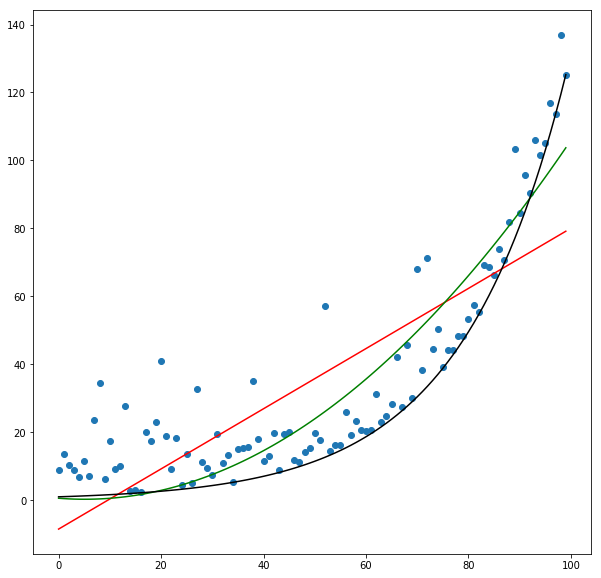

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(X_p2, Y_p2)
plt.plot(X_p2, linear_regression(X_p2_model, w_p2_final), c='r')
plt.plot(X_p2, linear_regression(X_p2_improved, w_p2_improved_final), c='g')
plt.plot(X_p2, 1.05**X_p2, c='black')